<a href="https://colab.research.google.com/github/SiefShama/Healthcare-Predictive-Analytics-Project/blob/Sief_Shama/Healthcare_Predictive_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project Workflow
# Healthcare Predictive Analytics Project

## Project Overview
The Healthcare Predictive Analytics project focuses on developing a predictive model to improve healthcare
outcomes by providing data-driven insights. The model will be designed to help healthcare professionals
with tasks such as patient risk prediction, trend identification in health metrics, and making informed
decisions based on predictive analytics. The project will utilize machine learning models to forecast
healthcare-related outcomes, focusing on improving patient care and resource management

- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

# Team Information

## Team Members
- **Name**: Sief Mohamed Shama  
  **Email**: siefshama@gmail.com  
  **Role**: Data Scientist

- **Name**: Samara Elshafey Waged  
  **Email**: eng.samara.elshafey@gmail.com  
  **Role**: Data Scientist

- **Name**: Mahmoud Hammam Mohammad Samaha  
  **Email**: mhmood.hmmam@gmail.com  
  **Role**: Data Scientist

- **Name**: Shrouk Mamdouh Elsied Ahmed  
  **Email**: shroukhendawy79@gmail.com  
  **Role**: Data Scientist

- **Name**: Mohamed Zawam Senosy  
  **Email**: zawamfci2012@gmail.com  
  **Role**: Data Scientist

## Additional Information
- **Organization**: DEPI   
- **Project Timeline**: From 6 Dec 2024 to 10 April 2025  
- **Tools Used**: Python (Google Colab - VS code)
- **Contact for Inquiries**: [Insert Email or Point of Contact]

---

## Github instructions

Clone Github repo

In [2]:
!git clone https://github.com/MhmoodHmmam/DEPI2_GP_Health_Care

fatal: destination path 'DEPI2_GP_Health_Care' already exists and is not an empty directory.


Checking folders and files

In [3]:
!ls

DEPI2_GP_Health_Care  drive  sample_data


Open project file

In [4]:
%cd DEPI2_GP_Health_Care

/content/DEPI2_GP_Health_Care


Checking file inside it

In [5]:
!ls

 data	     Healthcare_Predictive_Analytics_Project.ipynb	     healthcare_project.ipynb
 file2.csv  'Healthcare Predictive Analytics Project Proposal.pdf'   README.md


# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

### 2 Diabetes DB from UCI Repository
  - This source depends on data id in line 6 each id gives different database with different information
  - These are diabites datasets and in this part we show each one of them and their information
  - These data are the suitable data the can be used for data analysis and ML module training


#### General import library for

In [6]:
pip install ucimlrepo


#### CDC Diabetes Health Indicators   Number of rows = 253680
https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

he Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.

For what purpose was the dataset created?

To better understand the relationship between  lifestyle and diabetes in the US

Who funded the creation of the dataset?

The CDC

What do the instances in this dataset represent?

Each row represents a person participating in this study.

Are there recommended data splits?

Cross validation or a fixed train-test split could be used.

Does the dataset contain data that might be considered sensitive in any way?

- Gender
- Income
- Education level

Was there any data preprocessing performed?

Bucketing of age

Additional Information

Dataset link: https://www.cdc.gov/brfss/annual_data/annual_2014.html

Has Missing Values?

No

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

print('\n\nNumber of rows =',len(X))


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [8]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [9]:
X.head()

HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0             0       0        1  ...              1            0        5   
1             1       0        0  ...              0            1        3   
2             0       1        0  ...              1            1        5   
3             1       1        1  ...              1            0        2   
4             1       1        1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 21 columns]

In [10]:
y.head()

Diabetes_binary
0                0
1                0
2                0
3                0
4                0

#### Diabetes 130-US Hospitals for Years 1999-2008  Number of rows = 101766


https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

What do the instances in this dataset represent?

The instances represent hospitalized patient records diagnosed with diabetes.

Are there recommended data splits?

No recommendation. The standard train-test split could be used. Can use three-way holdout split (i.e., train-validation-test) when doing model selection.

Does the dataset contain data that might be considered sensitive in any way?

Yes. The dataset contains information about the age, gender, and race of the patients.

Additional Information

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

Has Missing Values?

Yes

In [11]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


print('\n\nNumber of rows =',len(X))

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 296, 'name': 'Diabetes 130-US Hospitals for Years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

In [12]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

In [13]:
X.head()

race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  ...  examide  citoglipton  insulin  \
0  Pediatrics-Endocrinology  ...       No           No       No   
1                       NaN  ...       No           No       Up   
2                       NaN  ...       No           No       No   
3                       NaN  ...       No           No       Up   
4                       NaN  ...       No           No   Steady   

   glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  \
0                   No                   No                        No   
1                   No                   No                        No   
2                   No                   No                        No   
3                   No                   No                        No   
4                   No                   No                        No   

  metformin-rosiglitazone metformin-pioglitazone change  diabetesMed  
0                      No                     No     No           No  
1                      No                     No     Ch          Yes  
2                      No                     No     No          Yes  
3                      No                     No     Ch          Yes  
4                      No                     No     Ch          Yes  

[5 rows x 47 columns]

In [14]:
y.head()

readmitted
0         NO
1        >30
2         NO
3         NO
4         NO

### General diabetes DB
This dataset consists of the following columns:

1.   **Diabetes_State** – Indicates whether the individual has diabetes (Yes/No).
1.   **HB** (High Blood pressure) – Measures the High Blood pressure level in the blood, which is important for diagnosing conditions.
1.   **Cholesterol** – Total cholesterol level in the blood, a key factor in heart disease risk.
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Heart_Disease** – Indicates whether the individual has a history of heart disease or heart attack.
1.   **PhysActivity** (Physical Activity) – Represents whether the person engages in physical exercise regularly.
1.   **PhysHlth** (Physical Health Days) – Number of days in the past month the individual reported poor physical health.
1.   **Gender** – The individual's gender (Male/Female).
1.   **Age** – Age group classification of the individual.
1.   **Stroke** – Indicates whether the individual has had a stroke.
1.   **GenHlth** (General Health Status) – Self-reported general health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **CholCheck** (Cholesterol Check Status) – Whether the individual had their cholesterol checked in the past five years.
1.   **Smoker** – Whether the individual is a smoker or not.
1.   **Fruits** – Whether the individual consumes fruits regularly.
1.   **Veggies** – Whether the individual consumes vegetables regularly.
1.   **HvyAlcoholConsump** (Heavy Alcohol Consumption) – Whether the individual is a heavy drinker (defined as more than 14 drinks per week for men, more than 7 for women).
1.   **MentHlth** (Mental Health Days) – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalk** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.


We have 2 datasets for diabites
In this part we mix these datasets and get a usable big dataset good enuogh to be used in data analysis and train ML module

This part we start to mix two diabetes datasets in these steps


1.   Load each dataset and show its columns and rows
2.   Create 2 new tables smaller with usable columns from the datasets
3.   Create a new data sets with columns name and all columns that we will need
4.   Modify each of two tables to be suitable to merge and put them in the new data set
5.   Fill the new data set with both tables after modifying



In [15]:
# Install the required package
!pip install ucimlrepo

# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Task 1: Fetch datasets
# Fetch CDC Diabetes Health Indicators dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
cdc_data = cdc_diabetes_health_indicators.data.original

# Fetch Diabetes 130-US Hospitals dataset
diabetes_130_us_hospitals = fetch_ucirepo(id=296)
hospitals_data = diabetes_130_us_hospitals.data.original

# Print metadata and number of rows for both datasets
print("CDC Diabetes Health Indicators Metadata:")
print(cdc_diabetes_health_indicators.metadata)

print("\nNumber of rows in CDC dataset =", len(cdc_data))

print("\nDiabetes 130-US Hospitals Metadata:")
print(diabetes_130_us_hospitals.metadata)

print("\nNumber of rows in Hospitals dataset =", len(hospitals_data))

# Task 2: Display columns and examples, check for missing values
print("\nCDC Diabetes Health Indicators Columns:")
print(cdc_data.columns)
print("\nExample rows:")
print(cdc_data.head())
print("\nMissing values in CDC dataset:")
print(cdc_data.isnull().sum())

print("\nDiabetes 130-US Hospitals Columns:")
print(hospitals_data.columns)
print("\nExample rows:")
print(hospitals_data.head())
print("\nMissing values in Hospitals dataset:")
print(hospitals_data.isnull().sum())

# Task 3: Create new tables
# Define structure for CDC_DB
cdc_columns = ["Diabetes_binary", "HighBP", "HighChol", "BMI", "HeartDiseaseorAttack",
               "PhysActivity", "PhysHlth", "Sex", "Age", "Stroke", "ID" ,"GenHlth","CholCheck","Smoker","Fruits","Veggies","HvyAlcoholConsump","MentHlth","DiffWalk"]
CDC_DB = pd.DataFrame(columns=cdc_columns)

# Define structure for H_DB
h_columns = ["Race", "Gender", "Age", "Weight", "diabetesMed", "time_in_hospital", "patient_nbr"]
H_DB = pd.DataFrame(columns=h_columns)

# Define structure for Data_Table
data_table_columns = ["Age", "Gender", "BMI", "Diabetes_State", "HB", "Heart_Disease",
                      "Cholesterol", "PhysHlth", "PhysActivity", "Stroke", "ID", "Race","GenHlth","CholCheck","Smoker","Fruits","Veggies","HvyAlcoholConsump","MentHlth","DiffWalk"]
Data_Table = pd.DataFrame(columns=data_table_columns)

# Task 4: Fill CDC_DB and H_DB
CDC_DB = cdc_data[["Diabetes_binary", "HighBP", "HighChol", "BMI", "HeartDiseaseorAttack",
                   "PhysActivity", "PhysHlth", "Sex", "Age", "Stroke","GenHlth","CholCheck","Smoker","Fruits","Veggies","HvyAlcoholConsump","MentHlth","DiffWalk"]].copy()
CDC_DB["ID"] = range(1, len(CDC_DB) + 1)

H_DB = hospitals_data[["race", "gender", "age", "weight", "diabetesMed", "time_in_hospital", "patient_nbr"]].copy()
H_DB.columns = h_columns  # Rename columns to match our table structure

# Task 5: Fill Data_Table
# Convert HB.Age from categorical to integer
age_map = {
    "[0-10)": 5, "[10-20)": 15, "[20-30)": 25, "[30-40)": 35, "[40-50)": 45,
    "[50-60)": 55, "[60-70)": 65, "[70-80)": 75, "[80-90)": 85, "[90-100)": 95
}
H_DB["Age"] = H_DB["Age"].map(age_map)

# Convert HB.Gender to binary
gender_map = {"Female": 0, "Male": 1}
H_DB["Gender"] = H_DB["Gender"].map(gender_map)

# Convert HB.diabetesMed to binary
diabetes_med_map = {"Yes": 1, "No": 0}
H_DB["diabetesMed"] = H_DB["diabetesMed"].map(diabetes_med_map)

# Populate Data_Table with CDC_DB first
Data_Table = CDC_DB.rename(columns={
    "Sex": "Gender", "Diabetes_binary": "Diabetes_State", "HighBP": "HB",
    "HeartDiseaseorAttack": "Heart_Disease", "HighChol": "Cholesterol"
})

# Add H_DB rows to Data_Table
H_DB_renamed = H_DB.rename(columns={
    "patient_nbr": "ID", "diabetesMed": "Diabetes_State", "time_in_hospital": "PhysHlth"
})
Data_Table = pd.concat([Data_Table, H_DB_renamed], ignore_index=True)

# Task 6: Show Data_Table length and components
print("\nData_Table Length:", len(Data_Table))
print("\nData_Table Columns:", Data_Table.columns)
print("\nExample Rows from Data_Table:")
print(Data_Table.head())


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


CDC Diabetes Health Indicators Metadata:
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'n

Showing The new dataset Informations to check number of rows of each columns and with looking check the suitable columns (with a little amount of empty cell) and drop the rest


In [16]:
Data_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  int64  
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

Showing the Sample of the data in the dataset

In [17]:
Data_Table.head()

Diabetes_State   HB  Cholesterol   BMI  Heart_Disease  PhysActivity  \
0               0  1.0          1.0  40.0            0.0           0.0   
1               0  0.0          0.0  25.0            0.0           1.0   
2               0  1.0          1.0  28.0            0.0           0.0   
3               0  1.0          0.0  27.0            0.0           1.0   
4               0  1.0          1.0  24.0            0.0           1.0   

   PhysHlth  Gender  Age  Stroke  ...  CholCheck  Smoker  Fruits  Veggies  \
0        15     0.0    9     0.0  ...        1.0     1.0     0.0      1.0   
1         0     0.0    7     0.0  ...        0.0     1.0     0.0      0.0   
2        30     0.0    9     0.0  ...        1.0     0.0     1.0      0.0   
3         0     0.0   11     0.0  ...        1.0     0.0     1.0      1.0   
4         0     0.0   11     0.0  ...        1.0     0.0     1.0      1.0   

   HvyAlcoholConsump  MentHlth  DiffWalk  ID  Race Weight  
0                0.0      18.0       1.0   1   NaN    NaN  
1                0.0       0.0       0.0   2   NaN    NaN  
2                0.0      30.0       1.0   3   NaN    NaN  
3                0.0       0.0       0.0   4   NaN    NaN  
4                0.0       3.0       0.0   5   NaN    NaN  

[5 rows x 21 columns]

Showing the dataset description (all data changed to numbers)


In [18]:
Data_Table.describe()

Diabetes_State             HB    Cholesterol            BMI  \
count   355446.000000  253680.000000  253680.000000  253680.000000   
mean         0.319905       0.429001       0.424121      28.382364   
std          0.466440       0.494934       0.494210       6.608694   
min          0.000000       0.000000       0.000000      12.000000   
25%          0.000000       0.000000       0.000000      24.000000   
50%          0.000000       0.000000       0.000000      27.000000   
75%          1.000000       1.000000       1.000000      31.000000   
max          1.000000       1.000000       1.000000      98.000000   

       Heart_Disease   PhysActivity       PhysHlth         Gender  \
count  253680.000000  253680.000000  355446.000000  355443.000000   
mean        0.094186       0.756544       4.286145       0.446657   
std         0.292087       0.429169       7.536492       0.497147   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       1.000000       0.000000   
75%         0.000000       1.000000       5.000000       1.000000   
max         1.000000       1.000000      30.000000       1.000000   

                 Age         Stroke        GenHlth      CholCheck  \
count  355446.000000  253680.000000  253680.000000  253680.000000   
mean       24.619177       0.040571       2.511392       0.962670   
std        27.663173       0.197294       1.068477       0.189571   
min         1.000000       0.000000       1.000000       0.000000   
25%         7.000000       0.000000       2.000000       1.000000   
50%        10.000000       0.000000       2.000000       1.000000   
75%        45.000000       0.000000       3.000000       1.000000   
max        95.000000       1.000000       5.000000       1.000000   

              Smoker         Fruits        Veggies  HvyAlcoholConsump  \
count  253680.000000  253680.000000  253680.000000      253680.000000   
mean        0.443169       0.634256       0.811420           0.056197   
std         0.496761       0.481639       0.391175           0.230302   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         0.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

            MentHlth       DiffWalk            ID  
count  253680.000000  253680.000000  3.554460e+05  
mean        3.184772       0.168224  1.564560e+07  
std         7.412847       0.374066  3.207894e+07  
min         0.000000       0.000000  1.000000e+00  
25%         0.000000       0.000000  8.845125e+04  
50%         0.000000       0.000000  1.769595e+05  
75%         2.000000       0.000000  5.709508e+06  
max        30.000000       1.000000  1.895026e+08

Calculating the amount of mising data for each column

In [19]:
null_percentage = Data_Table.isnull().sum() / len(Data_Table) * 100
null_percentage

Diabetes_State        0.000000
HB                   28.630509
Cholesterol          28.630509
BMI                  28.630509
Heart_Disease        28.630509
PhysActivity         28.630509
PhysHlth              0.000000
Gender                0.000844
Age                   0.000000
Stroke               28.630509
GenHlth              28.630509
CholCheck            28.630509
Smoker               28.630509
Fruits               28.630509
Veggies              28.630509
HvyAlcoholConsump    28.630509
MentHlth             28.630509
DiffWalk             28.630509
ID                    0.000000
Race                 72.008969
Weight               99.100567
dtype: float64

From above results we found out that the amount of missing values did excceed 30% so it can consider be usable till we find out that it cause problems in training

### Heart attack cleaned dataset

This dataset consists of the following columns:

1.   **HeartDisease** – Indicates whether the individual has been diagnosed with heart disease (Yes/No).
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Smoking** – Whether the individual is a smoker or not.
1.   **AlcoholDrinking** – Indicates if the individual is a heavy drinker (excessive alcohol consumption).
1.   **Stroke** – Whether the individual has ever had a stroke.
1.   **PhysicalHealth** – Number of days in the past month the individual reported poor physical health.
1.   **MentalHealth** – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalking** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.
1.   **Sex** – The gender of the individual (Male/Female).
1.   **AgeCategory** – Categorized age groups of individuals.
1.   **Race** – The race/ethnicity of the individual.
1.   **Diabetic** – Indicates whether the individual has diabetes Stage from 0 (Healthy) to 3 (high level).
1.   **PhysicalActivity** – Whether the individual engages in regular physical activity.
1.   **GenHealth** (General Health Status) – Self-reported overall health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **SleepTime** – The average number of hours of sleep the individual gets per night.
1.   **Asthma** – Whether the individual has been diagnosed with asthma.
1.   **KidneyDisease** – Whether the individual has been diagnosed with kidney disease.
1.   **SkinCancer** – Whether the individual has been diagnosed with skin cancer.




This Dataset for heart attack and the files is saved on google drive so we used its link and library to import it in the code to be used


This Part for preparing to import from google drive link

#### Import from google drive

In [20]:
import gdown
import pandas as pd

# Function to extract file ID from the Google Drive link
def extract_file_id(drive_link):
    # Split the URL to extract the file ID
    file_id = drive_link.split('/')[-2]
    return file_id

#### import Heart attack cleaned dataset first version

Number of rows = 319795

In this Part
1. we import the file with help of previews code
2. open the file and store the dataset in varable df2
3. shows the dataset length  

In [21]:

# Google Drive shareable links (replace these with your links)
link2 = 'https://drive.google.com/file/d/1JFqKFUwBAkXe6wfeO3Gr-aBySnzNr3FA/view?usp=sharing'


# Extract file IDs
file_id2 = extract_file_id(link2)

# Create download URLs
url2 = f'https://drive.google.com/uc?id={file_id2}'

# Download the second file
output2 = 'file2.csv'
gdown.download(url2, output2, quiet=False)

# Read the downloaded CSV files into pandas DataFrames
df2 = pd.read_csv(output2)

# Print number of rows
print(len(df2))

Downloading...
From: https://drive.google.com/uc?id=1JFqKFUwBAkXe6wfeO3Gr-aBySnzNr3FA
To: /content/DEPI2_GP_Health_Care/file2.csv
100%|██████████| 23.3M/23.3M [00:00<00:00, 45.4MB/s]


319795


From Github source

In [22]:
df2 = pd.read_csv('data/heart_attack_cleaned.csv')
df2.head()


HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1              Yes  Very good          7     No            No         No  
2              Yes       Fair          8    Yes            No         No  
3               No       Good          6     No            No        Yes  
4              Yes  Very good          8     No            No         No

Showing a sample from the dataset

In [23]:
df2.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No               3   
1           No  20.34      No              No    Yes               0   
2           No  26.58     Yes              No     No              20   
3           No  24.21      No              No     No               0   
4           No  23.71      No              No     No              28   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0            30          No  Female        55-59  White      Yes   
1             0          No  Female  80 or older  White       No   
2            30          No    Male        65-69  White      Yes   
3             0          No  Female        75-79  White       No   
4             0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good          5    Yes            No        Yes  
1              Yes  Very good          7     No            No         No  
2              Yes       Fair          8    Yes            No         No  
3               No       Good          6     No            No        Yes  
4              Yes  Very good          8     No            No         No

Showing the dataset infromation

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

From the information we get that

  - Most of columns are stored as object
  - There is no midding values


The next code We count each column elements for checking all values for the table elements

In [25]:
import pandas as pd

# Count values in each column
for col in df2.columns:
  print(f"Column '{col}':")
  print(df2[col].value_counts())
  print("-" * 20)

# Show data type of each column
print("\nData types of each column:")
df2.dtypes


Column 'HeartDisease':
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
--------------------
Column 'BMI':
BMI
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
46.05       1
60.19       1
47.17       1
56.91       1
15.57       1
Name: count, Length: 3604, dtype: int64
--------------------
Column 'Smoking':
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
--------------------
Column 'AlcoholDrinking':
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
--------------------
Column 'Stroke':
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
--------------------
Column 'PhysicalHealth':
PhysicalHealth
0     226589
30     19509
2      14880
1      10489
3       8617
5       7606
10      5453
15      5012
7       4629
4       4468
20      3216
14      2893
6       1270
25      1164
8        924
21       626
12       605
28       446
29       204
9        180
18       167
16       135
27       124


HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

After Checking the last results we made this code which will do the next steps
  - It will change all text into numbers
  - It turn age range into one value
  - remap the all values and put them into the datasets

In [26]:
import pandas as pd

# Define mappings for categorical columns
binary_mapping = {"No": 0, "Yes": 1}
sex_mapping = {"Female": 0, "Male": 1}
age_mapping = {
    "18-24": 20, "25-29": 25, "30-34": 30, "35-39": 35, "40-44": 40, "45-49": 45,
    "50-54": 50, "55-59": 55, "60-64": 60, "65-69": 65, "70-74": 70, "75-79": 75, "80 or older": 80
}
race_mapping = {
    "White": 0, "Hispanic": 1, "Black": 2, "Other": 3, "Asian": 4, "American Indian/Alaskan Native": 5
}
diabetic_mapping = {
    "No": 0, "Yes": 1, "No, borderline diabetes": 2, "Yes (during pregnancy)": 3
}
genhealth_mapping = {
    "Excellent": 5, "Very good": 4, "Good": 3, "Fair": 2, "Poor": 1
}

# Convert categorical columns
df2["HeartDisease"] = df2["HeartDisease"].map(binary_mapping)
df2["Smoking"] = df2["Smoking"].map(binary_mapping)
df2["AlcoholDrinking"] = df2["AlcoholDrinking"].map(binary_mapping)
df2["Stroke"] = df2["Stroke"].map(binary_mapping)
df2["DiffWalking"] = df2["DiffWalking"].map(binary_mapping)
df2["Sex"] = df2["Sex"].map(sex_mapping)
df2["AgeCategory"] = df2["AgeCategory"].map(age_mapping)
df2["Race"] = df2["Race"].map(race_mapping)
df2["Diabetic"] = df2["Diabetic"].map(diabetic_mapping)
df2["PhysicalActivity"] = df2["PhysicalActivity"].map(binary_mapping)
df2["GenHealth"] = df2["GenHealth"].map(genhealth_mapping)
df2["Asthma"] = df2["Asthma"].map(binary_mapping)
df2["KidneyDisease"] = df2["KidneyDisease"].map(binary_mapping)
df2["SkinCancer"] = df2["SkinCancer"].map(binary_mapping)


# Check the final types
print(df2.dtypes)


HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime             int64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object


## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

### Heart Disease DB
This dataset consists of the following columns:

1.   **HeartDisease** – Indicates whether the individual has been diagnosed with heart disease (Yes/No).
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Smoking** – Whether the individual is a smoker or not.
1.   **AlcoholDrinking** – Indicates if the individual is a heavy drinker (excessive alcohol consumption).
1.   **Stroke** – Whether the individual has ever had a stroke.
1.   **PhysicalHealth** – Number of days in the past month the individual reported poor physical health.
1.   **MentalHealth** – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalking** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.
1.   **Sex** – The gender of the individual (Male/Female).
1.   **AgeCategory** – Categorized age groups of individuals.
1.   **Race** – The race/ethnicity of the individual.
1.   **Diabetic** – Indicates whether the individual has diabetes  Stage from 0 (Healthy) to 3 (high level).
1.   **PhysicalActivity** – Whether the individual engages in regular physical activity.
1.   **GenHealth** (General Health Status) – Self-reported overall health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **SleepTime** – The average number of hours of sleep the individual gets per night.
1.   **Asthma** – Whether the individual has been diagnosed with asthma.
1.   **KidneyDisease** – Whether the individual has been diagnosed with kidney disease.
1.   **SkinCancer** – Whether the individual has been diagnosed with skin cancer.

In this part we renames the heart disease dataset to clear name and usable to prevent future mistakes in using


---

#### Showing the dataset for last time as a check before analysis




In [27]:
HeartDisease_DB = df2.copy()
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

#### Showing a description for the dataset table

In [28]:
HeartDisease_DB.describe()

HeartDisease            BMI        Smoking  AlcoholDrinking  \
count  319795.000000  319795.000000  319795.000000    319795.000000   
mean        0.085595      28.325399       0.412477         0.068097   
std         0.279766       6.356100       0.492281         0.251912   
min         0.000000      12.020000       0.000000         0.000000   
25%         0.000000      24.030000       0.000000         0.000000   
50%         0.000000      27.340000       0.000000         0.000000   
75%         0.000000      31.420000       1.000000         0.000000   
max         1.000000      94.850000       1.000000         1.000000   

              Stroke  PhysicalHealth   MentalHealth    DiffWalking  \
count  319795.000000    319795.00000  319795.000000  319795.000000   
mean        0.037740         3.37171       3.898366       0.138870   
std         0.190567         7.95085       7.955235       0.345812   
min         0.000000         0.00000       0.000000       0.000000   
25%         0.000000         0.00000       0.000000       0.000000   
50%         0.000000         0.00000       0.000000       0.000000   
75%         0.000000         2.00000       3.000000       0.000000   
max         1.000000        30.00000      30.000000       1.000000   

                 Sex    AgeCategory           Race       Diabetic  \
count  319795.000000  319795.000000  319795.000000  319795.000000   
mean        0.475273      52.572679       0.514048       0.194002   
std         0.499389      17.823797       1.107419       0.496776   
min         0.000000      20.000000       0.000000       0.000000   
25%         0.000000      40.000000       0.000000       0.000000   
50%         0.000000      55.000000       0.000000       0.000000   
75%         1.000000      65.000000       0.000000       0.000000   
max         1.000000      80.000000       5.000000       3.000000   

       PhysicalActivity      GenHealth      SleepTime         Asthma  \
count     319795.000000  319795.000000  319795.000000  319795.000000   
mean           0.775362       3.595028       7.097075       0.134061   
std            0.417344       1.042918       1.436007       0.340718   
min            0.000000       1.000000       1.000000       0.000000   
25%            1.000000       3.000000       6.000000       0.000000   
50%            1.000000       4.000000       7.000000       0.000000   
75%            1.000000       4.000000       8.000000       0.000000   
max            1.000000       5.000000      24.000000       1.000000   

       KidneyDisease     SkinCancer  
count  319795.000000  319795.000000  
mean        0.036833       0.093244  
std         0.188352       0.290775  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

#### Showing the count repeation for each value in each column and finish with showing the datatype of all columns

In [29]:
# Count values in each column
for col in HeartDisease_DB.columns:
  print(f"Column '{col}':")
  print(HeartDisease_DB[col].value_counts())
  print("-" * 20)

# Show data type of each column
print("\nData types of each column:")
HeartDisease_DB.dtypes

Column 'HeartDisease':
HeartDisease
0    292422
1     27373
Name: count, dtype: int64
--------------------
Column 'BMI':
BMI
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
46.05       1
60.19       1
47.17       1
56.91       1
15.57       1
Name: count, Length: 3604, dtype: int64
--------------------
Column 'Smoking':
Smoking
0    187887
1    131908
Name: count, dtype: int64
--------------------
Column 'AlcoholDrinking':
AlcoholDrinking
0    298018
1     21777
Name: count, dtype: int64
--------------------
Column 'Stroke':
Stroke
0    307726
1     12069
Name: count, dtype: int64
--------------------
Column 'PhysicalHealth':
PhysicalHealth
0     226589
30     19509
2      14880
1      10489
3       8617
5       7606
10      5453
15      5012
7       4629
4       4468
20      3216
14      2893
6       1270
25      1164
8        924
21       626
12       605
28       446
29       204
9        180
18       167
16       135
27       124
17       110
13 

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime             int64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

### Diabetic DB
This dataset consists of the following columns:

1.   **Diabetes_State** – Indicates whether the individual has diabetes (Yes/No).
1.   **HB** (High Blood pressure) – Measures the High Blood pressure level in the blood, which is important for diagnosing conditions.
1.   **Cholesterol** – Total cholesterol level in the blood, a key factor in heart disease risk.
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Heart_Disease** – Indicates whether the individual has a history of heart disease or heart attack.
1.   **PhysActivity** (Physical Activity) – Represents whether the person engages in physical exercise regularly.
1.   **PhysHlth** (Physical Health Days) – Number of days in the past month the individual reported poor physical health.
1.   **Gender** – The individual's gender (Male/Female).
1.   **Age** – Age group classification of the individual.
1.   **Stroke** – Indicates whether the individual has had a stroke.
1.   **GenHlth** (General Health Status) – Self-reported general health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **CholCheck** (Cholesterol Check Status) – Whether the individual had their cholesterol checked in the past five years.
1.   **Smoker** – Whether the individual is a smoker or not.
1.   **Fruits** – Whether the individual consumes fruits regularly.
1.   **Veggies** – Whether the individual consumes vegetables regularly.
1.   **HvyAlcoholConsump** (Heavy Alcohol Consumption) – Whether the individual is a heavy drinker (defined as more than 14 drinks per week for men, more than 7 for women).
1.   **MentHlth** (Mental Health Days) – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalk** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.


In this part we renames the Diabetic dataset to clear name and usable to prevent future mistakes in using


---

#### Showing the dataset for last time as a check before analysis



In [30]:
Diabetic_DB = Data_Table.copy()
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  int64  
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

#### Showing a description for the dataset table

In [31]:
Diabetic_DB.describe()

Diabetes_State             HB    Cholesterol            BMI  \
count   355446.000000  253680.000000  253680.000000  253680.000000   
mean         0.319905       0.429001       0.424121      28.382364   
std          0.466440       0.494934       0.494210       6.608694   
min          0.000000       0.000000       0.000000      12.000000   
25%          0.000000       0.000000       0.000000      24.000000   
50%          0.000000       0.000000       0.000000      27.000000   
75%          1.000000       1.000000       1.000000      31.000000   
max          1.000000       1.000000       1.000000      98.000000   

       Heart_Disease   PhysActivity       PhysHlth         Gender  \
count  253680.000000  253680.000000  355446.000000  355443.000000   
mean        0.094186       0.756544       4.286145       0.446657   
std         0.292087       0.429169       7.536492       0.497147   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       1.000000       0.000000   
75%         0.000000       1.000000       5.000000       1.000000   
max         1.000000       1.000000      30.000000       1.000000   

                 Age         Stroke        GenHlth      CholCheck  \
count  355446.000000  253680.000000  253680.000000  253680.000000   
mean       24.619177       0.040571       2.511392       0.962670   
std        27.663173       0.197294       1.068477       0.189571   
min         1.000000       0.000000       1.000000       0.000000   
25%         7.000000       0.000000       2.000000       1.000000   
50%        10.000000       0.000000       2.000000       1.000000   
75%        45.000000       0.000000       3.000000       1.000000   
max        95.000000       1.000000       5.000000       1.000000   

              Smoker         Fruits        Veggies  HvyAlcoholConsump  \
count  253680.000000  253680.000000  253680.000000      253680.000000   
mean        0.443169       0.634256       0.811420           0.056197   
std         0.496761       0.481639       0.391175           0.230302   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         0.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

            MentHlth       DiffWalk            ID  
count  253680.000000  253680.000000  3.554460e+05  
mean        3.184772       0.168224  1.564560e+07  
std         7.412847       0.374066  3.207894e+07  
min         0.000000       0.000000  1.000000e+00  
25%         0.000000       0.000000  8.845125e+04  
50%         0.000000       0.000000  1.769595e+05  
75%         2.000000       0.000000  5.709508e+06  
max        30.000000       1.000000  1.895026e+08

#### Showing the count repeation for each value in each column and finish with showing the datatype of all columns

In [32]:
# Count values in each column
for col in Diabetic_DB.columns:
  print(f"Column '{col}':")
  print(Diabetic_DB[col].value_counts())
  print("-" * 20)

# Show data type of each column
print("\nData types of each column:")
Diabetic_DB.dtypes

Column 'Diabetes_State':
Diabetes_State
0    241737
1    113709
Name: count, dtype: int64
--------------------
Column 'HB':
HB
0.0    144851
1.0    108829
Name: count, dtype: int64
--------------------
Column 'Cholesterol':
Cholesterol
0.0    146089
1.0    107591
Name: count, dtype: int64
--------------------
Column 'BMI':
BMI
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
86.0        1
91.0        1
90.0        1
78.0        1
Name: count, Length: 84, dtype: int64
--------------------
Column 'Heart_Disease':
Heart_Disease
0.0    229787
1.0     23893
Name: count, dtype: int64
--------------------
Column 'PhysActivity':
PhysActivity
1.0    191920
0.0     61760
Name: count, dtype: int64
--------------------
Column 'PhysHlth':
PhysHlth
0     160052
2      31988
3      26251
1      25596
30     19400
4      18466
5      17588
7      10397
6       8869
10      7937
8       5200
15      4916
14      3629
20      3273
9       3181
12      202

Diabetes_State         int64
HB                   float64
Cholesterol          float64
BMI                  float64
Heart_Disease        float64
PhysActivity         float64
PhysHlth               int64
Gender               float64
Age                    int64
Stroke               float64
GenHlth              float64
CholCheck            float64
Smoker               float64
Fruits               float64
Veggies              float64
HvyAlcoholConsump    float64
MentHlth             float64
DiffWalk             float64
ID                     int64
Race                  object
Weight                object
dtype: object

#### Dropping columns (useless or large amount of missing values)

Dropping ID column

In [33]:
Diabetic_DB = Diabetic_DB.drop(columns=['ID'])

Dropping columns (Race and weight) as the amount data each one is little will lead to problems while training the module or during data analysis

In [34]:
# Drop columns 'Race' and 'Weight' from Diabetic_DB
Diabetic_DB = Diabetic_DB.drop(columns=['Race', 'Weight'], errors='ignore')


Checking dataset after dropping columns

In [35]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  int64  
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

### Backup data (store and load)

Saving Files and loading files from google drive


#### Diabetes

This code for saving the Diabetic database last version as csv file on google drive as protection


In [36]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming Diabetic_DB is your DataFrame
Diabetic_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Start.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
Diabetic_DB.to_csv('data/Diabetic_DB_Start.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [38]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Diabetic_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Start.csv')
Diabetic_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Diabetes_State   HB  Cholesterol   BMI  Heart_Disease  PhysActivity  \
0               0  1.0          1.0  40.0            0.0           0.0   
1               0  0.0          0.0  25.0            0.0           1.0   
2               0  1.0          1.0  28.0            0.0           0.0   
3               0  1.0          0.0  27.0            0.0           1.0   
4               0  1.0          1.0  24.0            0.0           1.0   

   PhysHlth  Gender  Age  Stroke  GenHlth  CholCheck  Smoker  Fruits  Veggies  \
0        15     0.0    9     0.0      5.0        1.0     1.0     0.0      1.0   
1         0     0.0    7     0.0      3.0        0.0     1.0     0.0      0.0   
2        30     0.0    9     0.0      5.0        1.0     0.0     1.0      0.0   
3         0     0.0   11     0.0      2.0        1.0     0.0     1.0      1.0   
4         0     0.0   11     0.0      2.0        1.0     0.0     1.0      1.0   

   HvyAlcoholConsump  MentHlth  DiffWalk  
0                0.0      18.0       1.0  
1                0.0       0.0       0.0  
2                0.0      30.0       1.0  
3                0.0       0.0       0.0  
4                0.0       3.0       0.0

In [39]:
Diabetic_DB = pd.read_csv('data/Diabetic_DB_Start.csv')

In [40]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  int64  
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

#### Heart Disease

This code for saving the Heart disease database last version as csv file on google drive as protection




In [41]:

from google.colab import drive
drive.mount('/content/drive')

# Assuming HeartDisease_DB is your DataFrame
HeartDisease_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB_Start.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
HeartDisease_DB.to_csv('data/HeartDisease_DB_Start.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [43]:

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

HeartDisease_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB.csv')
HeartDisease_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0               3   
1             0  20.34        0                0       1               0   
2             0  26.58        1                0       0               5   
3             0  24.21        0                0       0               0   
4             0  23.71        0                0       0               5   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0           7.5            0    0           55     0         1   
1           0.0            0    0           80     0         0   
2           7.5            0    1           65     0         1   
3           0.0            0    0           75     0         0   
4           0.0            1    0           40     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          2          8       1              0           0  
3                 0          3          6       0              0           1  
4                 1          4          8       0              0           0

In [44]:
HeartDisease_DB = pd.read_csv('data/HeartDisease_DB_Start.csv')

In [45]:
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

## Data Exploration
- Summary statistics (mean, median, variance).
- Data distribution visualizations: histograms, box plots, scatter plots, Pie plots.

### Heart Disease DB
This dataset consists of the following columns:

1.   **HeartDisease** – Indicates whether the individual has been diagnosed with heart disease (Yes/No).
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Smoking** – Whether the individual is a smoker or not.
1.   **AlcoholDrinking** – Indicates if the individual is a heavy drinker (excessive alcohol consumption).
1.   **Stroke** – Whether the individual has ever had a stroke.
1.   **PhysicalHealth** – Number of days in the past month the individual reported poor physical health.
1.   **MentalHealth** – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalking** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.
1.   **Sex** – The gender of the individual (Male/Female).
1.   **AgeCategory** – Categorized age groups of individuals.
1.   **Race** – The race/ethnicity of the individual.
1.   **Diabetic** – Indicates whether the individual has diabetes  Stage from 0 (Healthy) to 3 (high level).
1.   **PhysicalActivity** – Whether the individual engages in regular physical activity.
1.   **GenHealth** (General Health Status) – Self-reported overall health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **SleepTime** – The average number of hours of sleep the individual gets per night.
1.   **Asthma** – Whether the individual has been diagnosed with asthma.
1.   **KidneyDisease** – Whether the individual has been diagnosed with kidney disease.
1.   **SkinCancer** – Whether the individual has been diagnosed with skin cancer.


In [46]:
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [47]:
HeartDisease_DB.describe()

HeartDisease            BMI        Smoking  AlcoholDrinking  \
count  319795.000000  319795.000000  319795.000000    319795.000000   
mean        0.085595      28.325399       0.412477         0.068097   
std         0.279766       6.356100       0.492281         0.251912   
min         0.000000      12.020000       0.000000         0.000000   
25%         0.000000      24.030000       0.000000         0.000000   
50%         0.000000      27.340000       0.000000         0.000000   
75%         0.000000      31.420000       1.000000         0.000000   
max         1.000000      94.850000       1.000000         1.000000   

              Stroke  PhysicalHealth   MentalHealth    DiffWalking  \
count  319795.000000    319795.00000  319795.000000  319795.000000   
mean        0.037740         3.37171       3.898366       0.138870   
std         0.190567         7.95085       7.955235       0.345812   
min         0.000000         0.00000       0.000000       0.000000   
25%         0.000000         0.00000       0.000000       0.000000   
50%         0.000000         0.00000       0.000000       0.000000   
75%         0.000000         2.00000       3.000000       0.000000   
max         1.000000        30.00000      30.000000       1.000000   

                 Sex    AgeCategory           Race       Diabetic  \
count  319795.000000  319795.000000  319795.000000  319795.000000   
mean        0.475273      52.572679       0.514048       0.194002   
std         0.499389      17.823797       1.107419       0.496776   
min         0.000000      20.000000       0.000000       0.000000   
25%         0.000000      40.000000       0.000000       0.000000   
50%         0.000000      55.000000       0.000000       0.000000   
75%         1.000000      65.000000       0.000000       0.000000   
max         1.000000      80.000000       5.000000       3.000000   

       PhysicalActivity      GenHealth      SleepTime         Asthma  \
count     319795.000000  319795.000000  319795.000000  319795.000000   
mean           0.775362       3.595028       7.097075       0.134061   
std            0.417344       1.042918       1.436007       0.340718   
min            0.000000       1.000000       1.000000       0.000000   
25%            1.000000       3.000000       6.000000       0.000000   
50%            1.000000       4.000000       7.000000       0.000000   
75%            1.000000       4.000000       8.000000       0.000000   
max            1.000000       5.000000      24.000000       1.000000   

       KidneyDisease     SkinCancer  
count  319795.000000  319795.000000  
mean        0.036833       0.093244  
std         0.188352       0.290775  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [48]:
HeartDisease_DB.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### import libraries

In [49]:
# %% Importing required libraries
import pandas as pd  # For handling structured data
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers

import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
from IPython.display import Image  # For displaying images

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output


# Define a list of colors for visualizations
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

#### General plots


<Figure size 1500x1000 with 0 Axes>

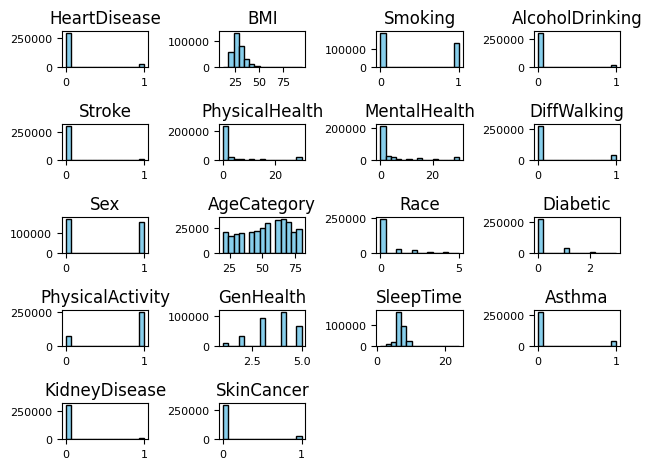

In [50]:
# Plot histograms for all variables in the dataset
plt.figure(figsize=(15, 10))
HeartDisease_DB.hist(bins=15, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()


#### separate plots


##### **GET SAMPLE VARIANCE OF BMI FOR HEART DISEASES DATASET**

---










In [51]:
import numpy as np
import pandas as pd
# get variance od BMI

# Set seed for reproducibility
np.random.seed(1)

# Take a random sample of 10,000 rows from the dataset
sample_df = HeartDisease_DB.sample(n=10000, random_state=1)

# Calculate variance for a specific column (BMI)
variance_value = sample_df["BMI"].var()  # Pandas `.var()` computes sample variance

print("Sample Variance of BMI: %.3f" % variance_value)

Sample Variance of BMI: 42.150


##### **Aggregate BMI trend related to sex**

---



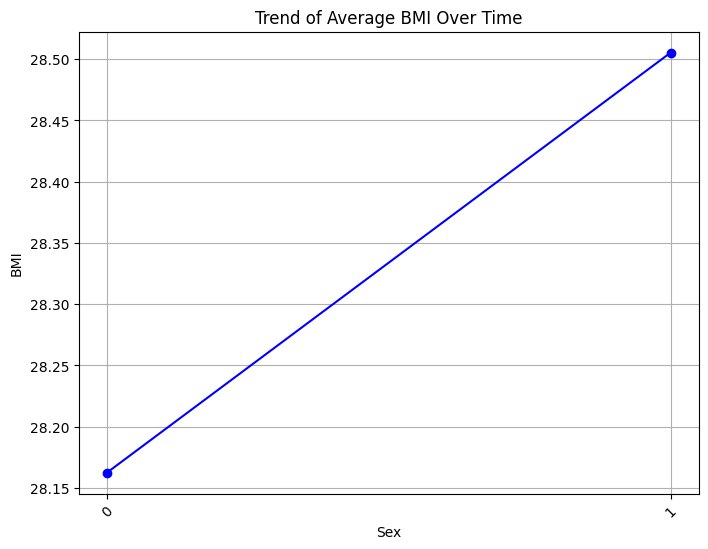

In [52]:
# Aggregate BMI trend related to sex
df_line = HeartDisease_DB.groupby("Sex")["BMI"].mean()

# Plot line chart
plt.figure(figsize=(8, 6))
plt.plot(df_line.index.astype(str), df_line, marker="o", linestyle="-", color="b")

plt.xlabel("Sex")
plt.ylabel("BMI")
plt.title("Trend of Average BMI Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### **Aggregate BMI trend related to Sex and AgeCategory**

---




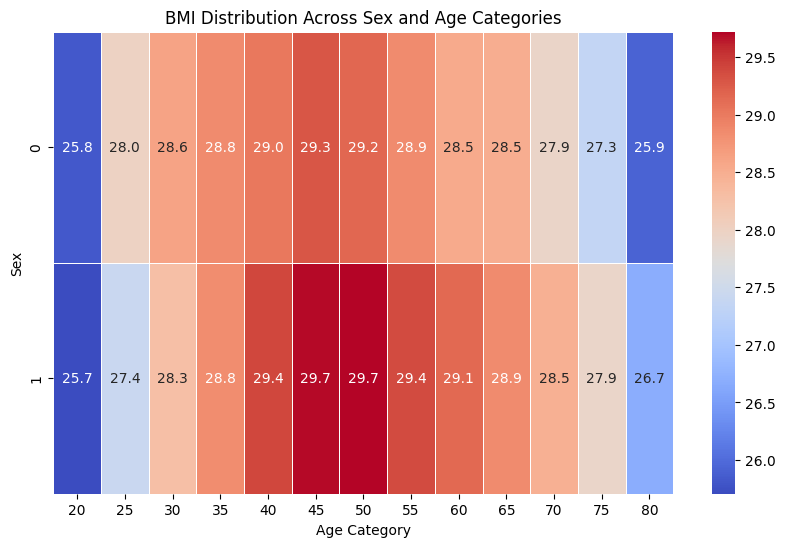

In [53]:
# Aggregate BMI trend related to Sex and AgeCategory
df_heatmap = HeartDisease_DB.pivot_table(values="BMI", index="Sex", columns="AgeCategory", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

plt.xlabel("Age Category")
plt.ylabel("Sex")
plt.title("BMI Distribution Across Sex and Age Categories")
plt.show()

##### **Exploratory Data Analysis**

---




In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##### **Sex distribution (column chart)**

---



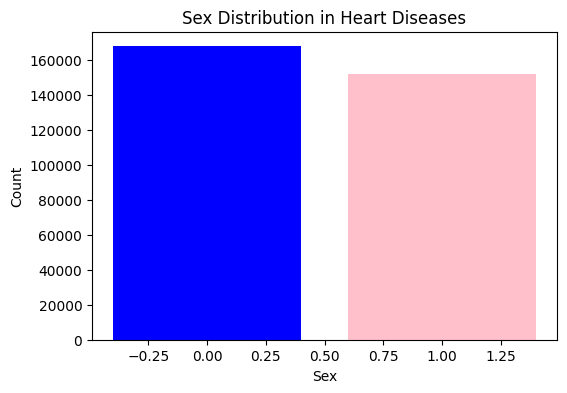

In [55]:
# Count unique values in Sex column
Sex_counts = HeartDisease_DB['Sex'].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(Sex_counts.index, Sex_counts.values, color=['blue', 'pink'])

# Labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex Distribution in Heart Diseases")

# Show plot
plt.show()

##### **Sex distribution (pie chart)**

---



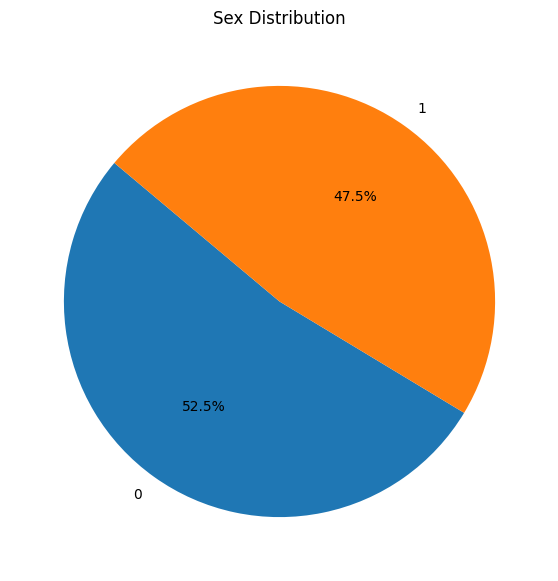

In [56]:
# Count unique values in sex as pie chart
Sex_counts = HeartDisease_DB['Sex'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(Sex_counts, labels= Sex_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("Sex Distribution")

# Show plot
plt.show()

##### **BMI Distribution (column chart)**

---



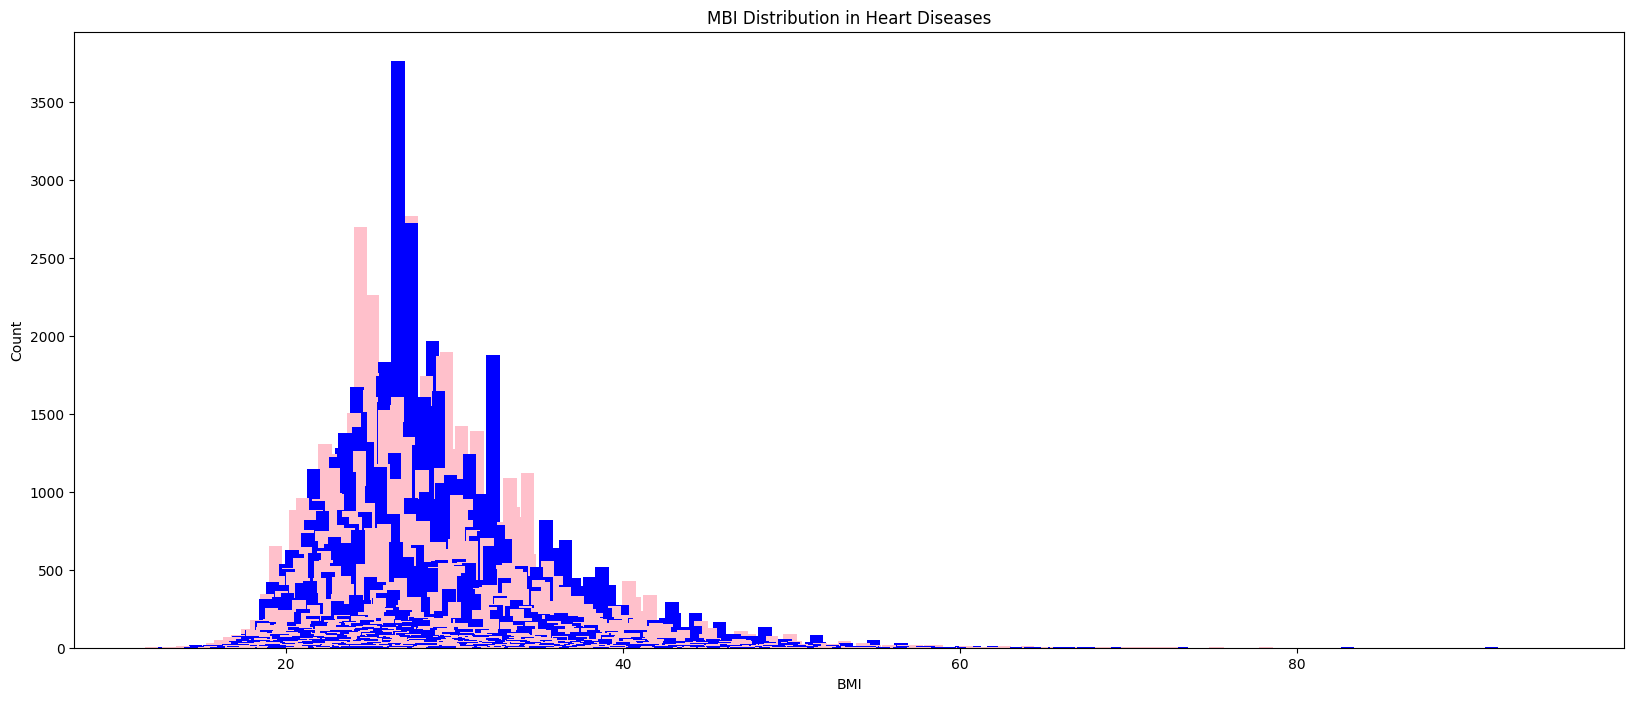

In [57]:
# Count unique values in BMI column
BMI_counts = HeartDisease_DB['BMI'].value_counts()

# Plot bar chart
plt.figure(figsize=(20, 8))
plt.bar(BMI_counts.index, BMI_counts.values, color=['blue', 'pink'])

# Labels and title
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("MBI Distribution in Heart Diseases")

# Show plot
plt.show()

##### **BMI Distribution (pie chart)**

---



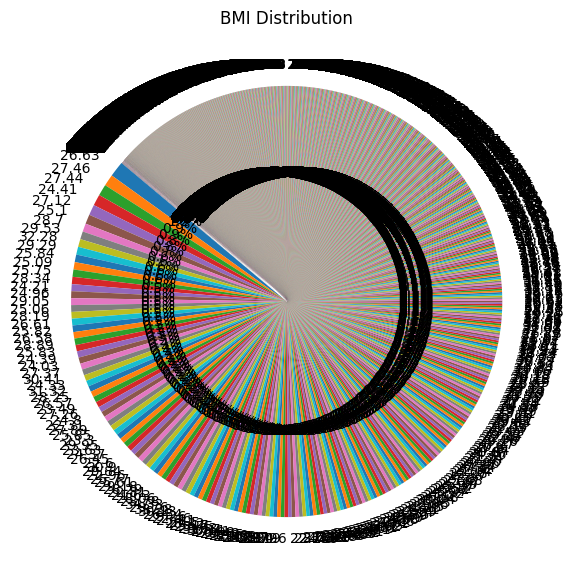

In [58]:
# Count unique values in BMI as pie chart
MBI_counts = HeartDisease_DB['BMI'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(BMI_counts, labels= BMI_counts.index, autopct='%1.1f%%',startangle=140)

# Title
plt.title("BMI Distribution")

# Show plot
plt.show()

##### **GenHealth Distribution in Heart Diseases (Bar Chart)**

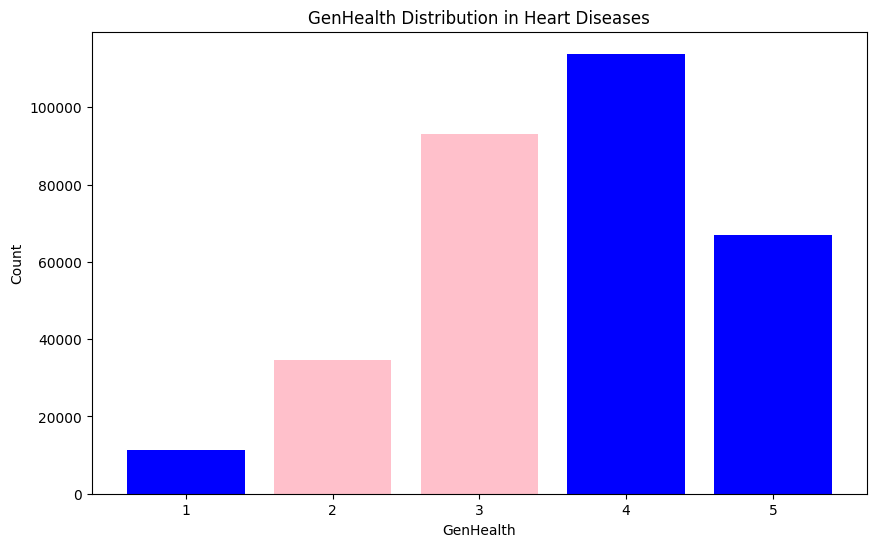

In [59]:
# Count unique values in GenHealth column
GenHealth_counts = HeartDisease_DB['GenHealth'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(GenHealth_counts.index, GenHealth_counts.values, color=['blue', 'pink'])

# Labels and title
plt.xlabel("GenHealth")
plt.ylabel("Count")
plt.title("GenHealth Distribution in Heart Diseases")

# Show plot
plt.show()

##### **GenHealth Distribution (Pie Chart)**

---



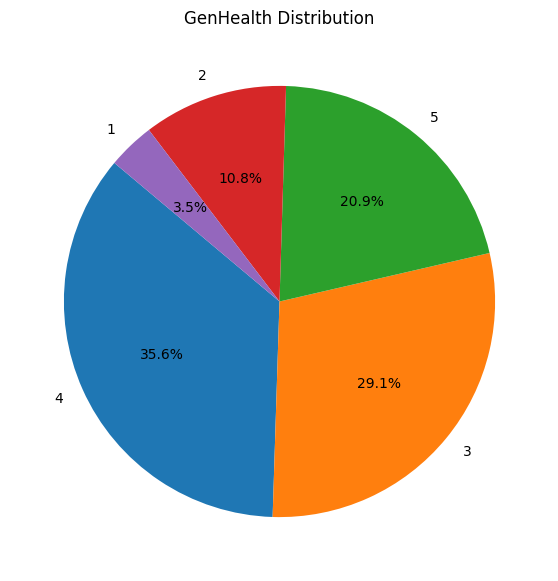

In [60]:
# Count unique values in GenHealth as pie chart
GenHealth_counts = HeartDisease_DB['GenHealth'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(GenHealth_counts, labels= GenHealth_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("GenHealth Distribution")

# Show plot
plt.show()

##### **GenHealth Distribution (bar chart)**

---




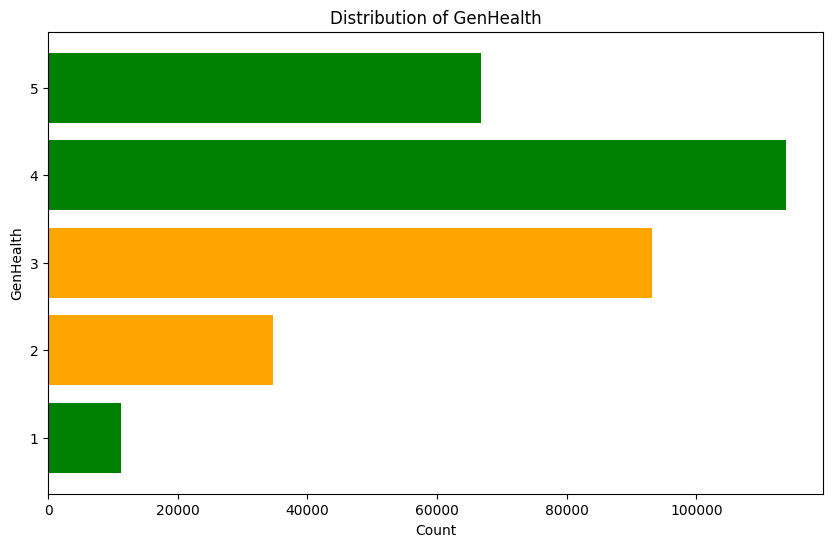

In [61]:
# Count unique values in GenHealth column
GenHealth_counts =HeartDisease_DB['GenHealth'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(GenHealth_counts.index, GenHealth_counts.values, color=['green', 'orange'])

# Labels and title
plt.xlabel("Count")
plt.ylabel("GenHealth")
plt.title("Distribution of GenHealth")

# Show plot
plt.show()

##### **SleepTime distribution (Column chart)**

---





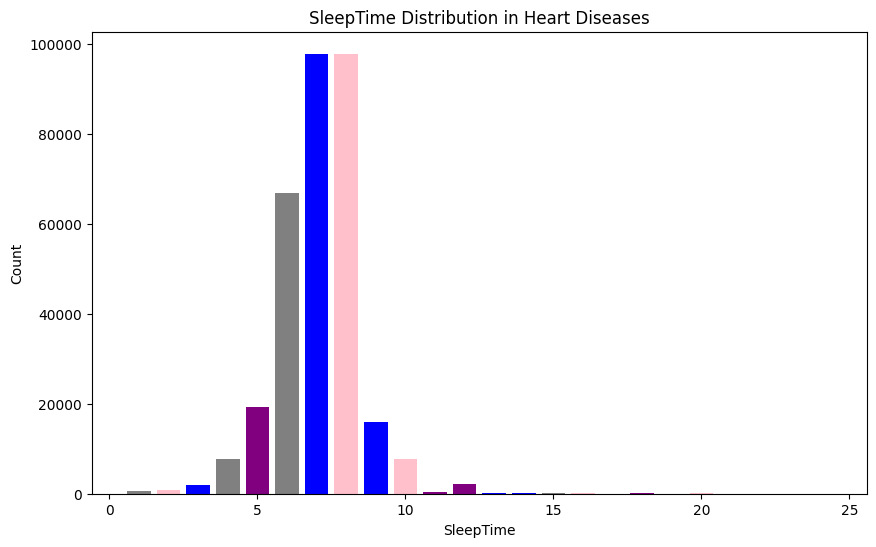

In [62]:
# Count unique values in SleepTime column
SleepTime_counts = HeartDisease_DB['SleepTime'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(SleepTime_counts.index, SleepTime_counts.values, color=['blue', 'pink', 'gray', 'purple'])

# Labels and title
plt.xlabel("SleepTime")
plt.ylabel("Count")
plt.title("SleepTime Distribution in Heart Diseases")

# Show plot
plt.show()

##### **SleepTime distribution (pie chart)**

---






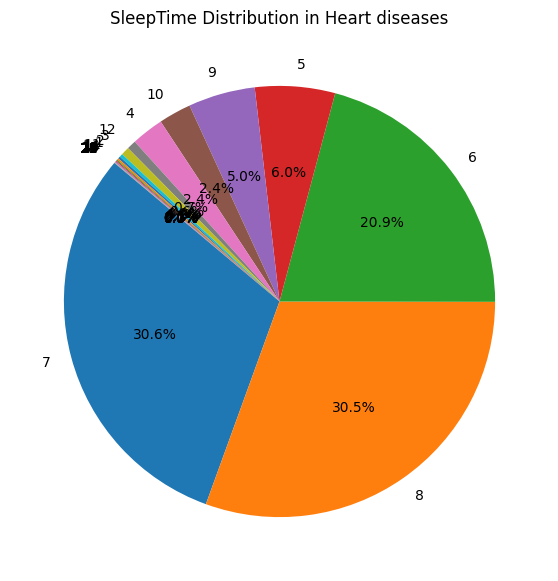

In [63]:
# Count unique values in SleepTime as pie chart
SleepTime_counts = HeartDisease_DB['SleepTime'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(SleepTime_counts, labels= SleepTime_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("SleepTime Distribution in Heart diseases")

# Show plot
plt.show()

##### **SleepTime distribution (bar chart)**

---



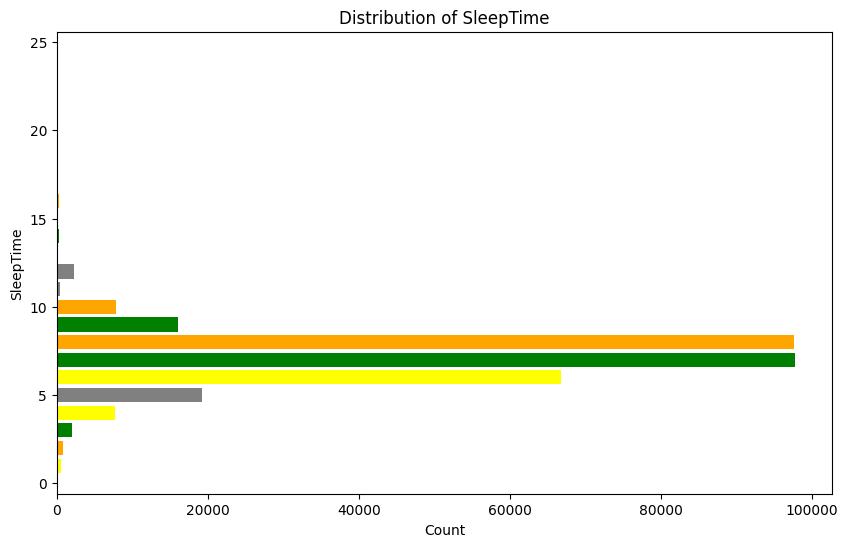

In [64]:
# Count unique values in SleepTime column
GenHealth_counts =HeartDisease_DB['SleepTime'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(SleepTime_counts.index, SleepTime_counts.values, color=['green', 'orange', 'yellow', 'gray'])

# Labels and title
plt.xlabel("Count")
plt.ylabel("SleepTime")
plt.title("Distribution of SleepTime")

# Show plot
plt.show()

##### **AgeCategory distribution (column chart)**

---



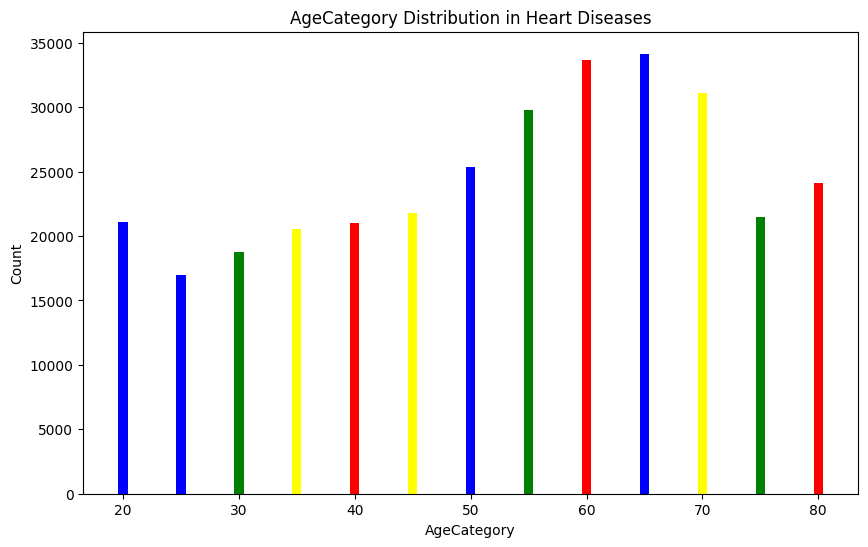

In [65]:
# Count unique values in AgeCategory column
AgeCategory_counts = HeartDisease_DB['AgeCategory'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(AgeCategory_counts.index, AgeCategory_counts.values, color=['blue', 'red', 'yellow', 'green'])

# Labels and title
plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.title("AgeCategory Distribution in Heart Diseases")

# Show plot
plt.show()

##### **AgeCategory distribution (pie chart)**

---



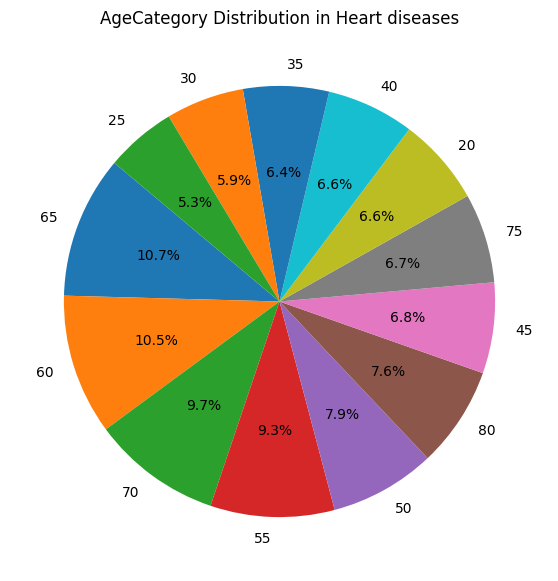

In [66]:
# Count unique values in AgeCategory as pie chart
AgeCategory_counts = HeartDisease_DB['AgeCategory'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(AgeCategory_counts, labels= AgeCategory_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("AgeCategory Distribution in Heart diseases")

# Show plot
plt.show()

##### **PhysicalHealth distribution (column chart)**

---



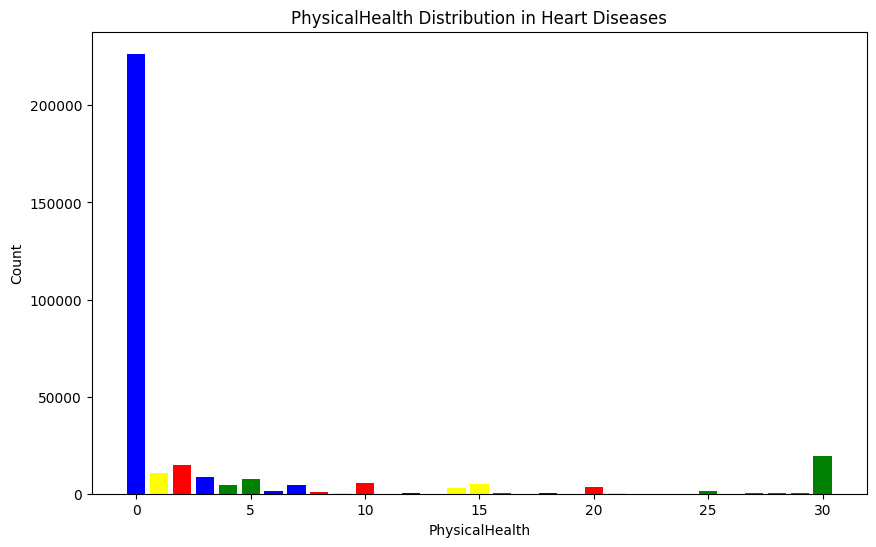

In [67]:
# Count unique values in PhysicalHealth column
PhysicalHealth_counts = HeartDisease_DB['PhysicalHealth'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(PhysicalHealth_counts.index, PhysicalHealth_counts.values, color=['blue', 'green', 'red', 'yellow'])

# Labels and title
plt.xlabel("PhysicalHealth")
plt.ylabel("Count")
plt.title("PhysicalHealth Distribution in Heart Diseases")

# Show plot
plt.show()

##### **PhysicalHealth distibution (pie chart)**

---



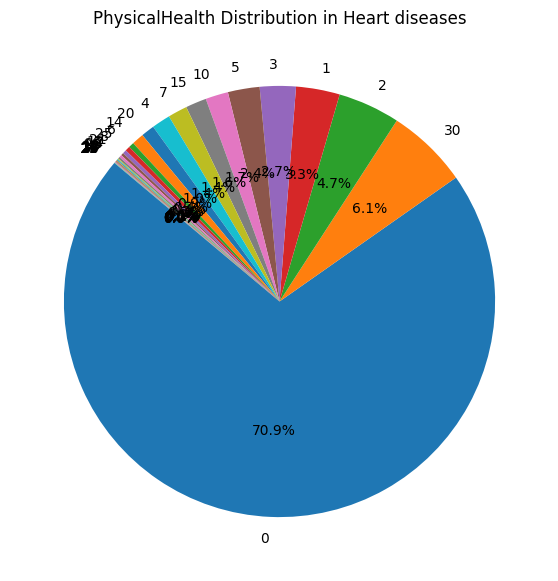

In [68]:
# Count unique values in PhysicalHealth as pie chart
PhysicalHealth_counts = HeartDisease_DB['PhysicalHealth'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(PhysicalHealth_counts, labels= PhysicalHealth_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("PhysicalHealth Distribution in Heart diseases")

# Show plot
plt.show()

##### **Smoking distribution (column chart)**

---



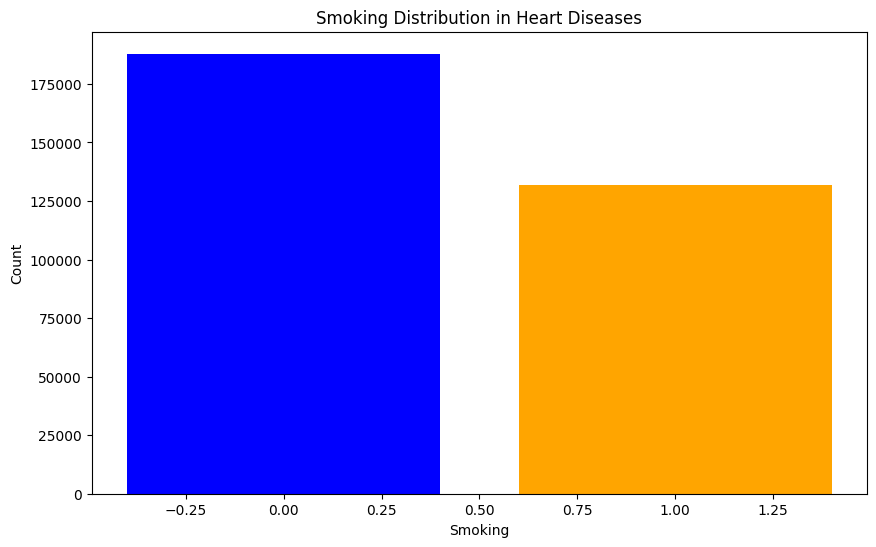

In [69]:
# Count unique values in Smoking column
Smoking_counts = HeartDisease_DB['Smoking'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(Smoking_counts.index, Smoking_counts.values, color=['blue', 'orange'])

# Labels and title
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.title("Smoking Distribution in Heart Diseases")

# Show plot
plt.show()

##### **Smoking distribution (pie chart)**

---



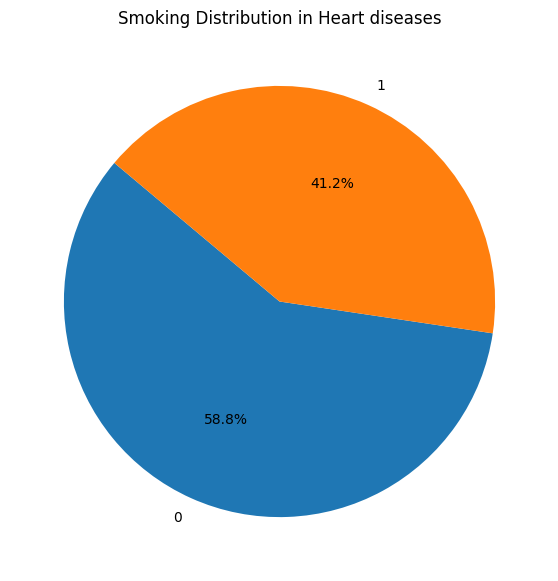

In [70]:
# Count unique values in Smoking as pie chart
Smoking_counts = HeartDisease_DB['Smoking'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(Smoking_counts, labels= Smoking_counts.index, autopct='%1.1f%%', startangle=140)

# Title
plt.title("Smoking Distribution in Heart diseases")

# Show plot
plt.show()

### Diabetic DB
This dataset consists of the following columns:

1.   **Diabetes_State** – Indicates whether the individual has diabetes (Yes/No).
1.   **HB** (High Blood pressure) – Measures the High Blood pressure level in the blood, which is important for diagnosing conditions.
1.   **Cholesterol** – Total cholesterol level in the blood, a key factor in heart disease risk.
1.   **BMI** (Body Mass Index) – A measure of body fat based on height and weight.
1.   **Heart_Disease** – Indicates whether the individual has a history of heart disease or heart attack.
1.   **PhysActivity** (Physical Activity) – Represents whether the person engages in physical exercise regularly.
1.   **PhysHlth** (Physical Health Days) – Number of days in the past month the individual reported poor physical health.
1.   **Gender** – The individual's gender (Male/Female).
1.   **Age** – Age group classification of the individual.
1.   **Stroke** – Indicates whether the individual has had a stroke.
1.   **GenHlth** (General Health Status) – Self-reported general health status (Excellent, Very Good, Good, Fair, or Poor).
1.   **CholCheck** (Cholesterol Check Status) – Whether the individual had their cholesterol checked in the past five years.
1.   **Smoker** – Whether the individual is a smoker or not.
1.   **Fruits** – Whether the individual consumes fruits regularly.
1.   **Veggies** – Whether the individual consumes vegetables regularly.
1.   **HvyAlcoholConsump** (Heavy Alcohol Consumption) – Whether the individual is a heavy drinker (defined as more than 14 drinks per week for men, more than 7 for women).
1.   **MentHlth** (Mental Health Days) – Number of days in the past month the individual reported poor mental health.
1.   **DiffWalk** (Difficulty Walking) – Indicates if the individual has difficulty walking or climbing stairs.



#### Dataset information

In [71]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  int64  
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

In [72]:
Diabetic_DB.describe()

Diabetes_State         HB  Cholesterol        BMI  Heart_Disease  \
count      355,446.00 253,680.00   253,680.00 253,680.00     253,680.00   
mean             0.32       0.43         0.42      28.38           0.09   
std              0.47       0.49         0.49       6.61           0.29   
min              0.00       0.00         0.00      12.00           0.00   
25%              0.00       0.00         0.00      24.00           0.00   
50%              0.00       0.00         0.00      27.00           0.00   
75%              1.00       1.00         1.00      31.00           0.00   
max              1.00       1.00         1.00      98.00           1.00   

       PhysActivity   PhysHlth     Gender        Age     Stroke    GenHlth  \
count    253,680.00 355,446.00 355,443.00 355,446.00 253,680.00 253,680.00   
mean           0.76       4.29       0.45      24.62       0.04       2.51   
std            0.43       7.54       0.50      27.66       0.20       1.07   
min            0.00       0.00       0.00       1.00       0.00       1.00   
25%            1.00       0.00       0.00       7.00       0.00       2.00   
50%            1.00       1.00       0.00      10.00       0.00       2.00   
75%            1.00       5.00       1.00      45.00       0.00       3.00   
max            1.00      30.00       1.00      95.00       1.00       5.00   

       CholCheck     Smoker     Fruits    Veggies  HvyAlcoholConsump  \
count 253,680.00 253,680.00 253,680.00 253,680.00         253,680.00   
mean        0.96       0.44       0.63       0.81               0.06   
std         0.19       0.50       0.48       0.39               0.23   
min         0.00       0.00       0.00       0.00               0.00   
25%         1.00       0.00       0.00       1.00               0.00   
50%         1.00       0.00       1.00       1.00               0.00   
75%         1.00       1.00       1.00       1.00               0.00   
max         1.00       1.00       1.00       1.00               1.00   

        MentHlth   DiffWalk  
count 253,680.00 253,680.00  
mean        3.18       0.17  
std         7.41       0.37  
min         0.00       0.00  
25%         0.00       0.00  
50%         0.00       0.00  
75%         2.00       0.00  
max        30.00       1.00

In [73]:
Diabetic_DB.columns

Index(['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk'],
      dtype='object')

#### Import libraries for plotting

In [74]:
# %% Importing required libraries
import pandas as pd  # For handling structured data
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers

import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
from IPython.display import Image  # For displaying images

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output


# Define a list of colors for visualizations
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

#### General plots


<Figure size 1500x1000 with 0 Axes>

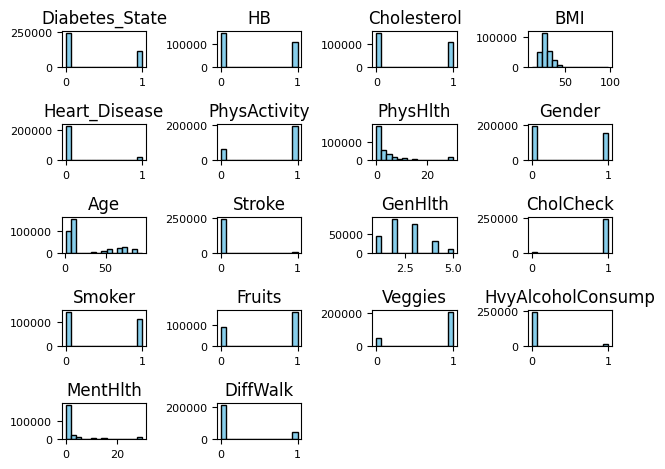

In [75]:
# Plot histograms for all variables in the dataset
plt.figure(figsize=(15, 10))
Diabetic_DB.hist(bins=15, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()


#### Diabetes State
- 0 = Healthy
- 1 = Having Diabetes

Bar Chart

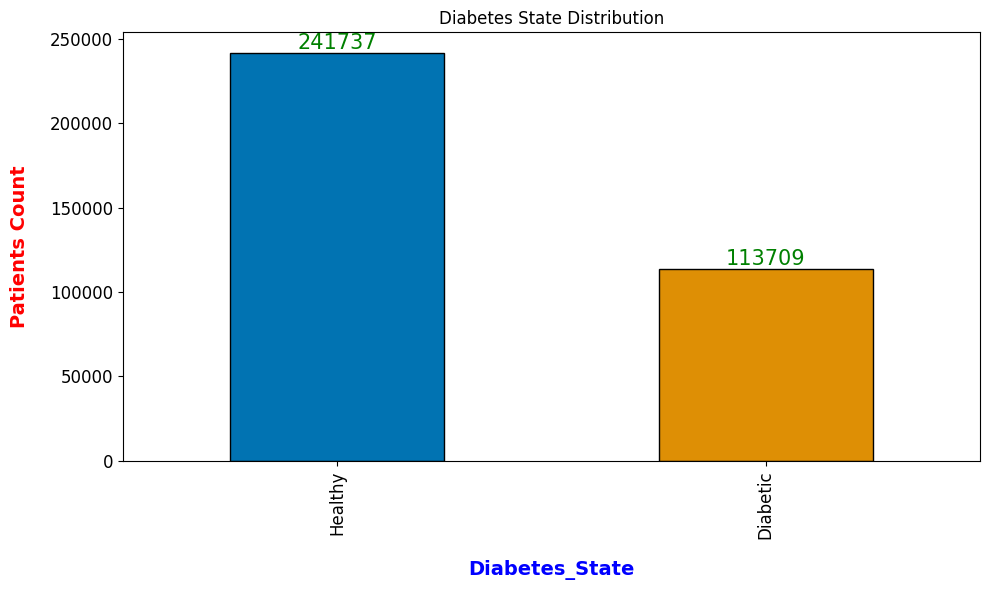

In [76]:
fig = plt.figure(figsize=(10, 6))
Labels = ['Healthy','Diabetic']
ax = Diabetic_DB['Diabetes_State'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(Labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('Diabetes_State', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Diabetes State Distribution')
plt.tight_layout()

plt.show()

Pie Chart

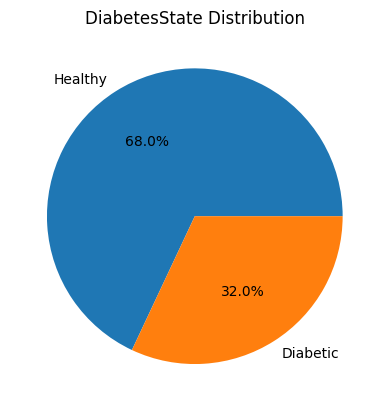

In [77]:
df= Diabetic_DB['Diabetes_State'].value_counts()
Labels = ['Healthy','Diabetic']
plt.pie(df.values, labels = Labels, autopct='%1.1f%%')
plt.title("DiabetesState Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following:

In this dataset we have 2 states and most of cases are Healthy people with 68% and people have diabetes with 32% from dataset and this prove inequality between them but the difference is not very large so we can manage to use this dataset in training

Bar Plot with respect to have Heart Disease or healthy

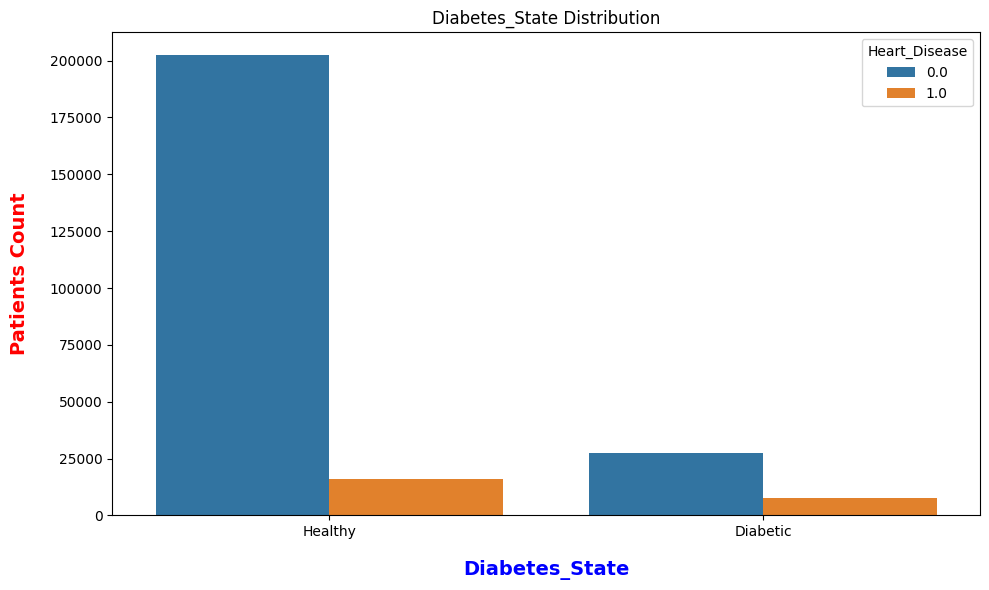

In [78]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Diabetes_State', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')
Labels = ['Healthy','Diabetic']
sns.barplot(x='Diabetes_State', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Diabetes_State', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Diabetes_State Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=Labels)


plt.show()


From previews plot (Bar plot)

We noticed the following that The healthy people (who doesn't have diabetes) most of them doesn't have heart disease and same on the other side

#### HB (High Blood pressure)
- 0 = Having normal pressure
- 1 = Having High pressure

Bar Chart HB

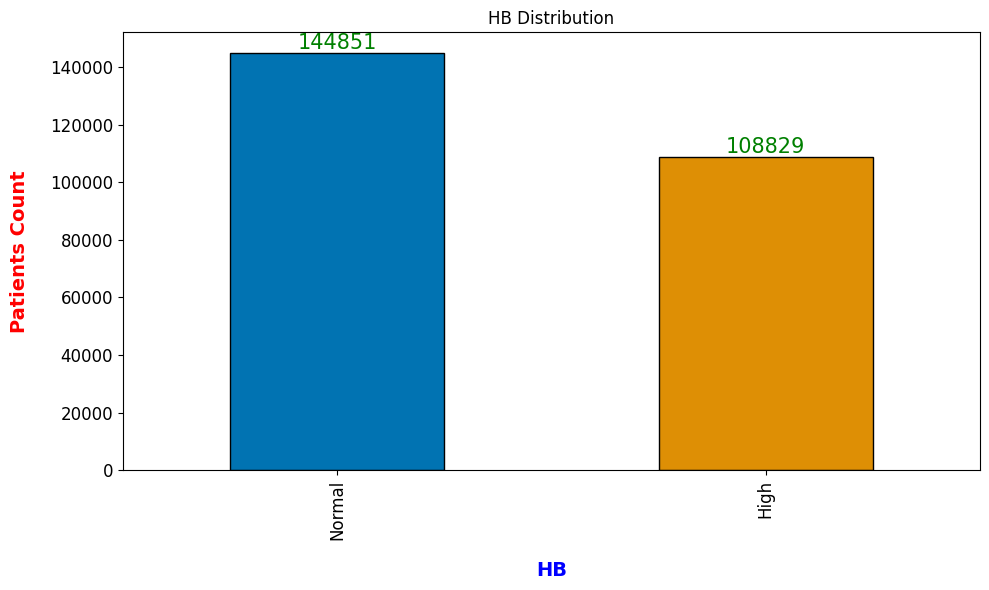

In [79]:
fig = plt.figure(figsize=(10, 6))
Labels = ["Normal","High"]
ax = Diabetic_DB['HB'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(Labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('HB', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HB Distribution')
plt.tight_layout()

plt.show()

Pie Chart HB

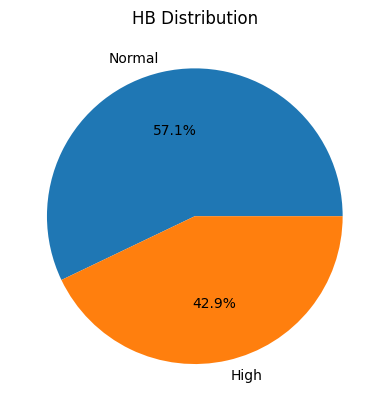

In [80]:
df= Diabetic_DB['HB'].value_counts()
Labels = ["Normal","High"]

plt.pie(df.values, labels = Labels, autopct='%1.1f%%')
plt.title("HB Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following the healthy people is 69.4% which make it bigger than Ill people with 30.6%

Bar Plot with respect to Diabetic or healthy

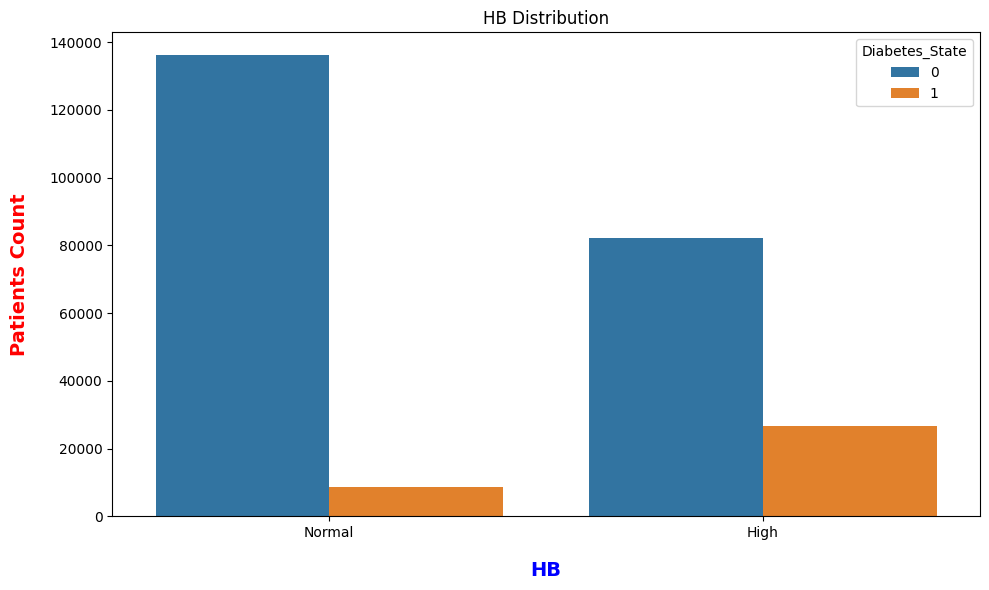

In [81]:


fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['HB', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
Labels = ["Normal","High"]
sns.barplot(x='HB', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('HB', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HB Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=Labels)


plt.show()

From previews plots Bar plot with respect to have diabetes or healthy

We noticed the following first we noticed that the amount diabetic people in Normal HB is more that in high HB which proves that HB and diabetes indepedent to each other

Bar Plot with respect to have Heart Disease or healthy

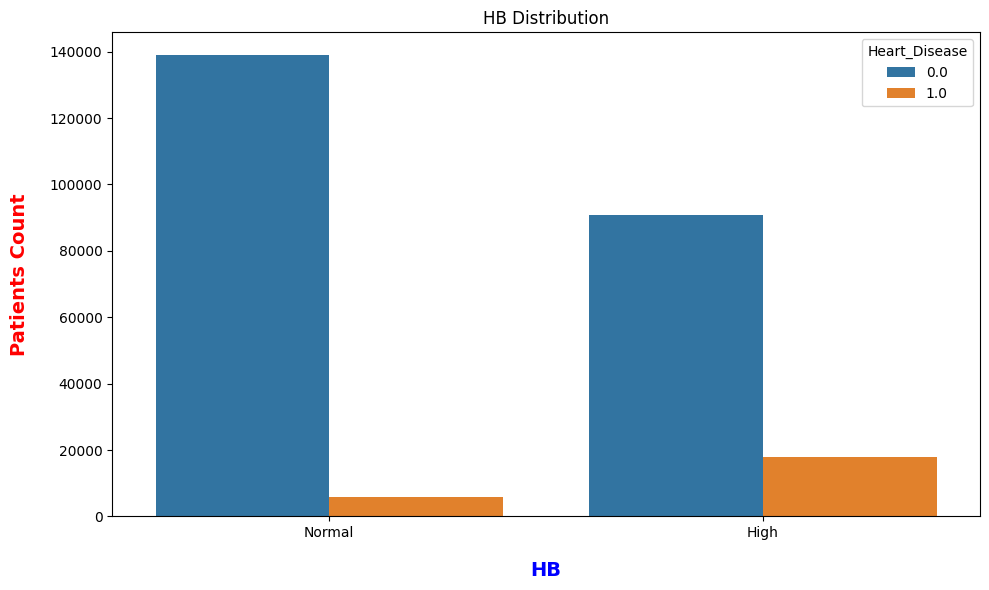

In [82]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['HB', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')
Labels = ["Normal","High"]

sns.barplot(x='HB', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('HB', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HB Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=Labels)


plt.show()


From previews plot (Bar plot)

We noticed the following high blood pressure is not one of main causes for heart diseases and even when the amount of people having high blood pressure a little of them only have heart disease


####  Cholesterol
- 0 = Normal Cholesterol
- 1 = High Cholesterol

Bar Chart Cholesterol

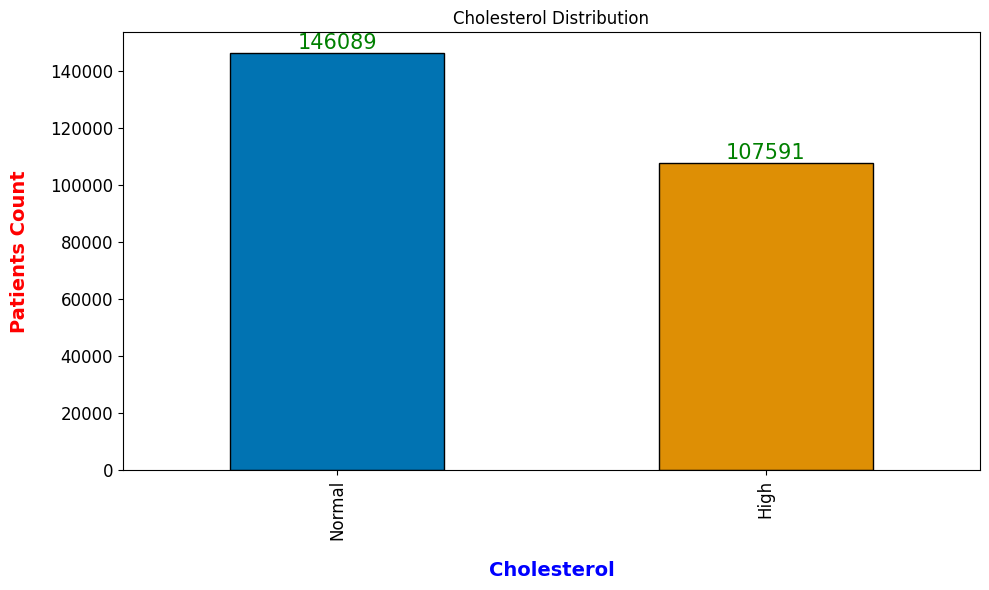

In [83]:
fig = plt.figure(figsize=(10, 6))
labels = ["Normal","High"]
ax = Diabetic_DB['Cholesterol'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('Cholesterol', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Cholesterol Distribution')
plt.tight_layout()

plt.show()

Pie Chart Cholesterol

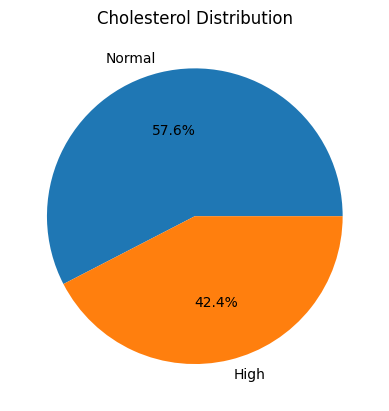

In [84]:
df= Diabetic_DB['Cholesterol'].value_counts()
labels = ["Normal","High"]
plt.pie(df.values, labels = labels, autopct='%1.1f%%')
plt.title("Cholesterol Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that more than half of the cases has normal cholesterol


Bar Plot with respect to Diabetic or healthy

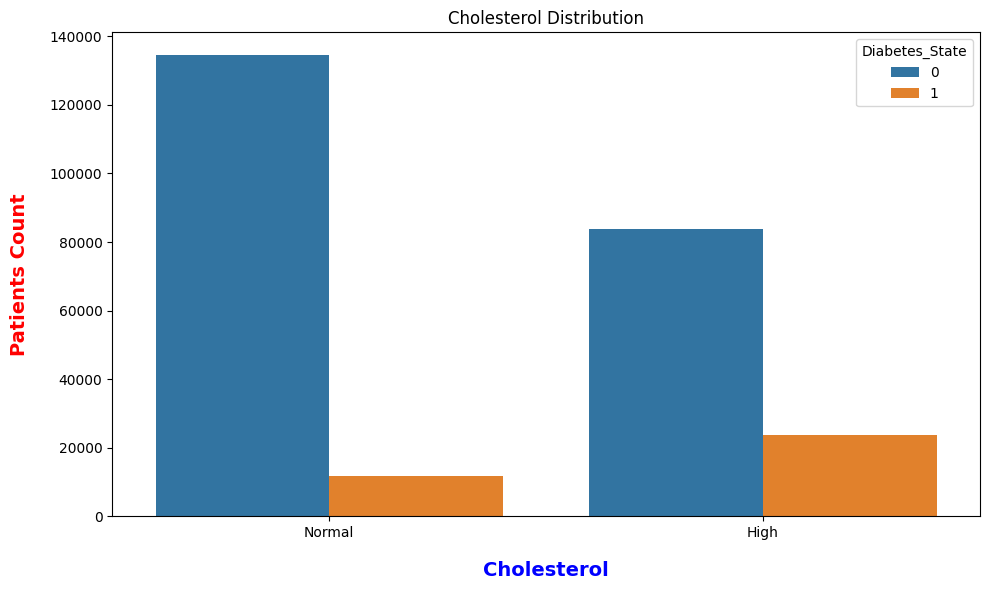

In [85]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Cholesterol', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
labels = ["Normal","High"]

sns.barplot(x='Cholesterol', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('Cholesterol', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Cholesterol Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=labels)


plt.show()

From previews plots (Bar plot)

We noticed the following the ratio between people having only diabetes to completely healthy people is bigger than people having high cholesterol and diabetes and people having high cholesterol only

This plot that cholesterol (high or low) doesn't help in getting diabetes as they both independent to each other


Bar Plot with respect to have Heart Disease or healthy

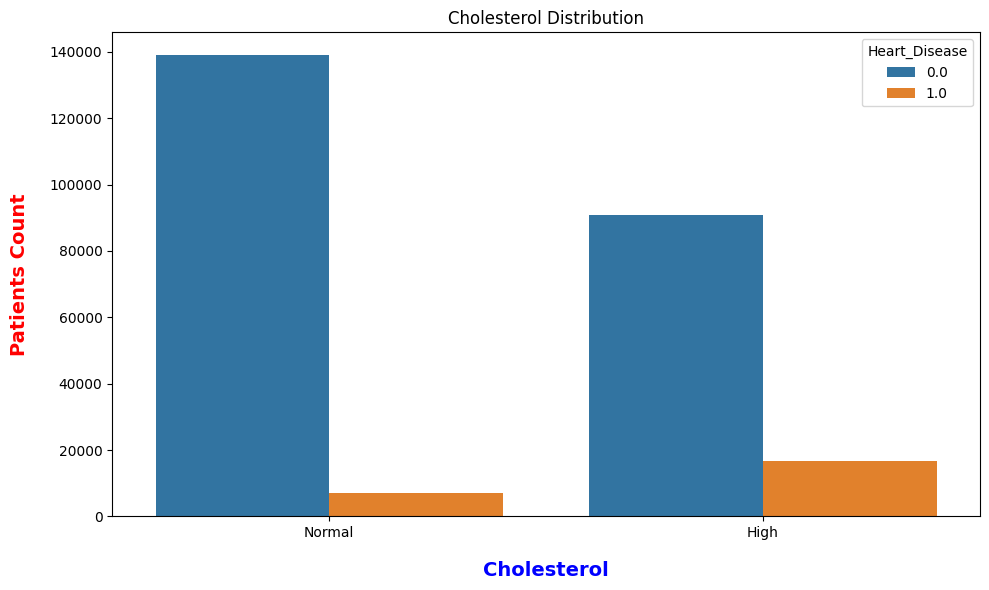

In [86]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Cholesterol', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

labels = ["Normal","High"]

sns.barplot(x='Cholesterol', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Cholesterol', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Cholesterol Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=labels)


plt.show()


From previews plots (Bar plot)

We noticed the following that ratio of having cholesterol to people having both cholesterol and heart disease is bigger than the other but this is not enough to show if high cholesterol can cause heart illness or not


#### BMI (Body Mass Index)
If your BMI is:
- Under 18.5 - you are very underweight and possibly malnourished.
- 18.5 to 24.9 - you have a healthy weight range for young and middle-aged adults.
- 25.0 to 29.9 - you are overweight.
- Over 30 - you are obese.

In [87]:
Diabetic_DB['BMI'].describe()

count   253,680.00
mean         28.38
std           6.61
min          12.00
25%          24.00
50%          27.00
75%          31.00
max          98.00
Name: BMI, dtype: float64

From This column description

We Noticed that


1.   Nearly more than half of this column is overweight and obese as at 25% BMI = 25 which is overweight (over 25)
2.   Max number is very large which proves that this data has a lot of outlier in it




Bar Chart BMI

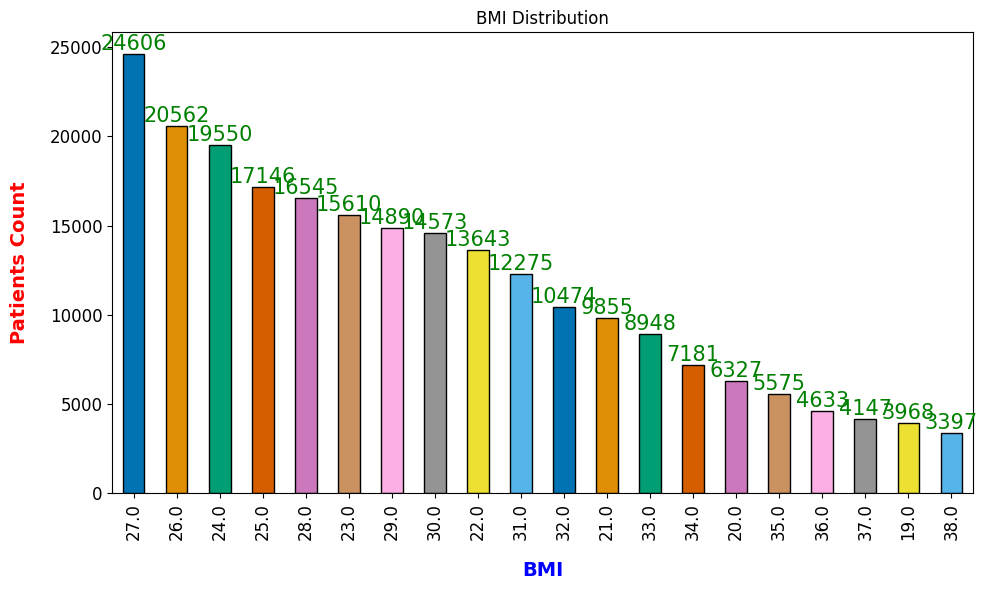

In [88]:
fig = plt.figure(figsize=(10, 6))

ax = Diabetic_DB['BMI'].value_counts().head(20).plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(list(Diabetic_DB['BMI'].value_counts().head(20).index))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()

plt.show()

Histogram

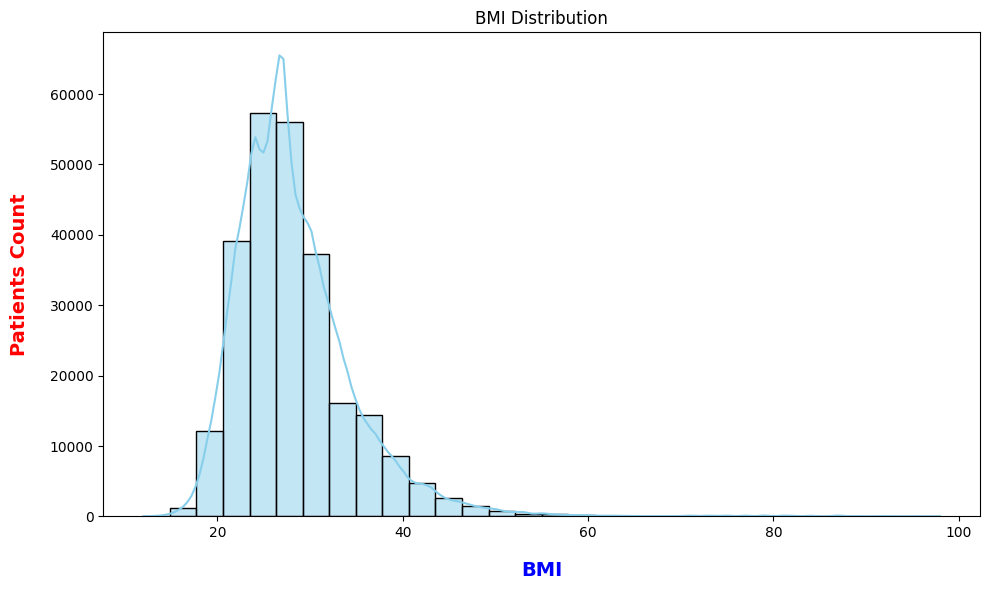

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(Diabetic_DB['BMI'], bins=30, kde=True, color='skyblue')
plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()
plt.show()


scatter plot

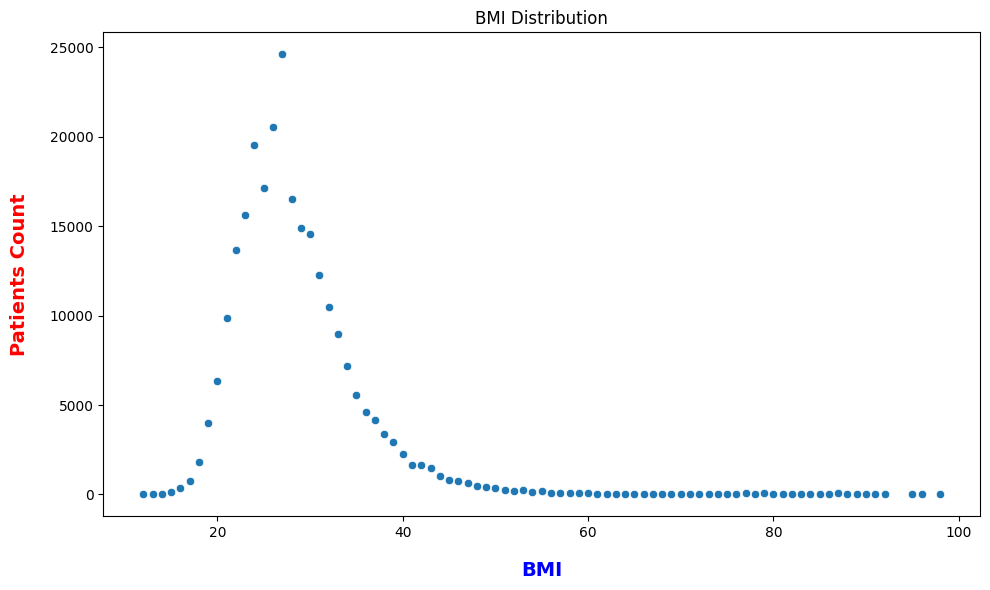

In [90]:
plt.figure(figsize=(10, 6))
df= Diabetic_DB['BMI'].value_counts()
sns.scatterplot(df)
plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()
plt.show()

Pie Chart BMI (Top 10)

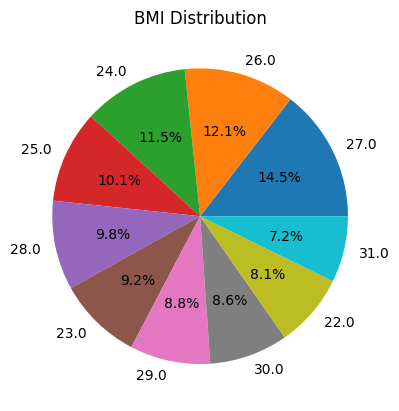

In [91]:
df= Diabetic_DB['BMI'].value_counts().head(10)
plt.pie(df.values, labels = df.index, autopct='%1.1f%%')
plt.title("BMI Distribution")
plt.show()

From previews plots (Bar plot and Pie plot and Histogram and scatter plot)

We noticed the following that most of people is in range between nearly 20 to 40 BMI (the most people are at 27 as it is clear in histogram)

The amount of data at 27 make us assume that if the most of data for this value may be fake or the this is the average weight of most of people and this data is real

Bar Plot with respect to Diabetic or healthy

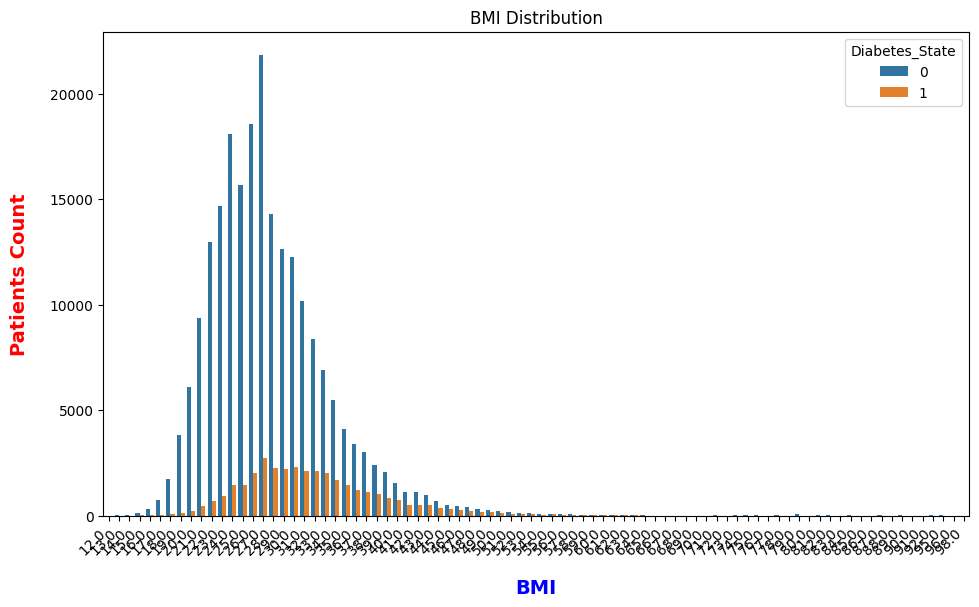

In [92]:

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['BMI', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='BMI', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

Bar plot without values at 27 (BMI)

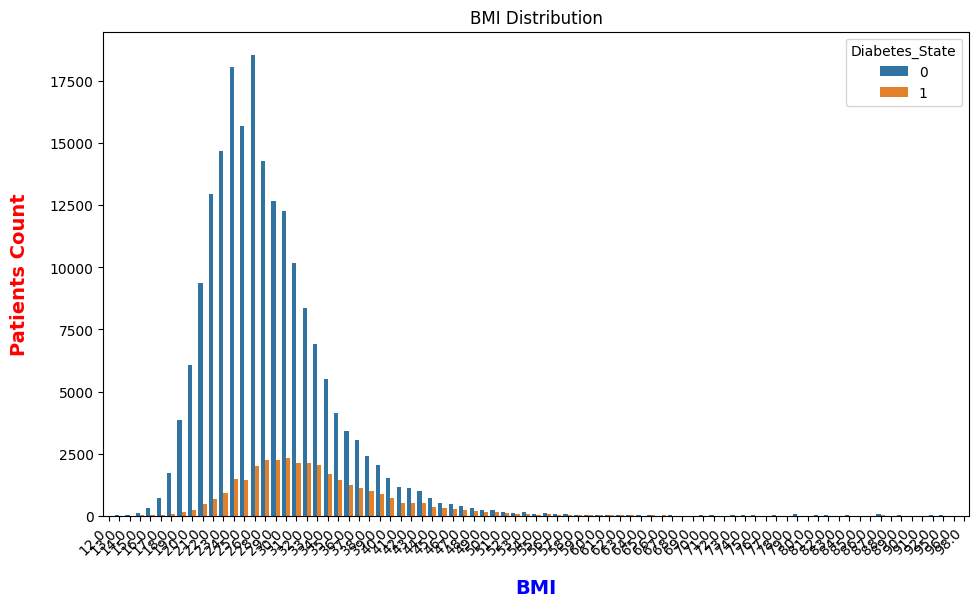

In [93]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB[Diabetic_DB['BMI'] != 27].groupby(['BMI', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='BMI', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

From previews plots (Bar plot)

We noticed the following the most of data in value 27 the amount people that having diabetes in is very large which we neglect it for now

The plots will show the bigger of BMI the more the people can get diabetes so this prove that BMI can help in causing being diabetic

This is correct as BMI shows Weight and body shape and amount of fats in the body and more so the bigger BMI is the Bigger the body size and heavier and more fat it has. The people who has high BMI they doesn't eat healthy food


Bar Plot with respect to have Heart Disease or healthy

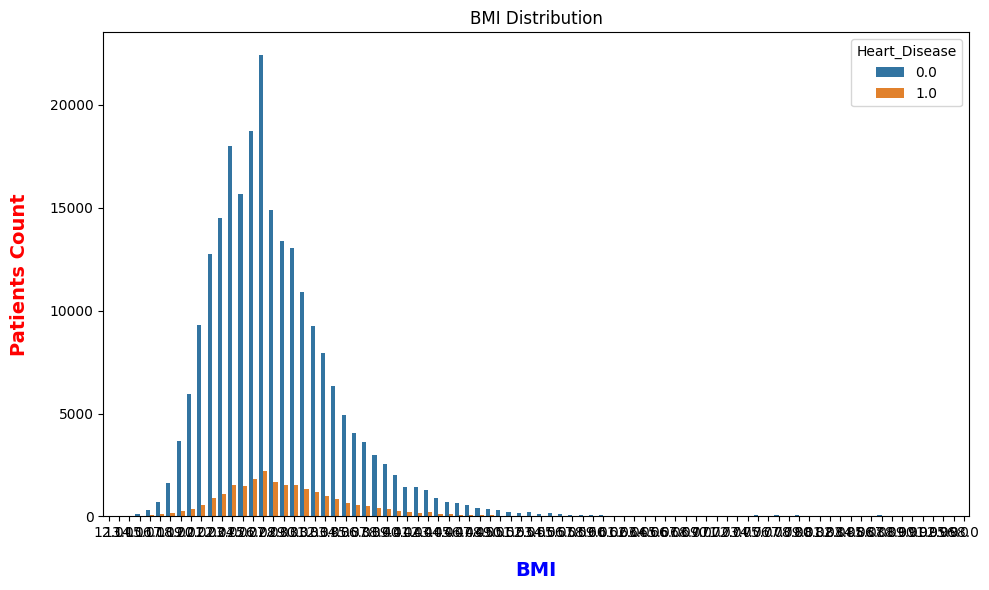

In [94]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['BMI', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='BMI', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')
plt.tight_layout()

plt.show()


Bar plot without 27 (BMI) value

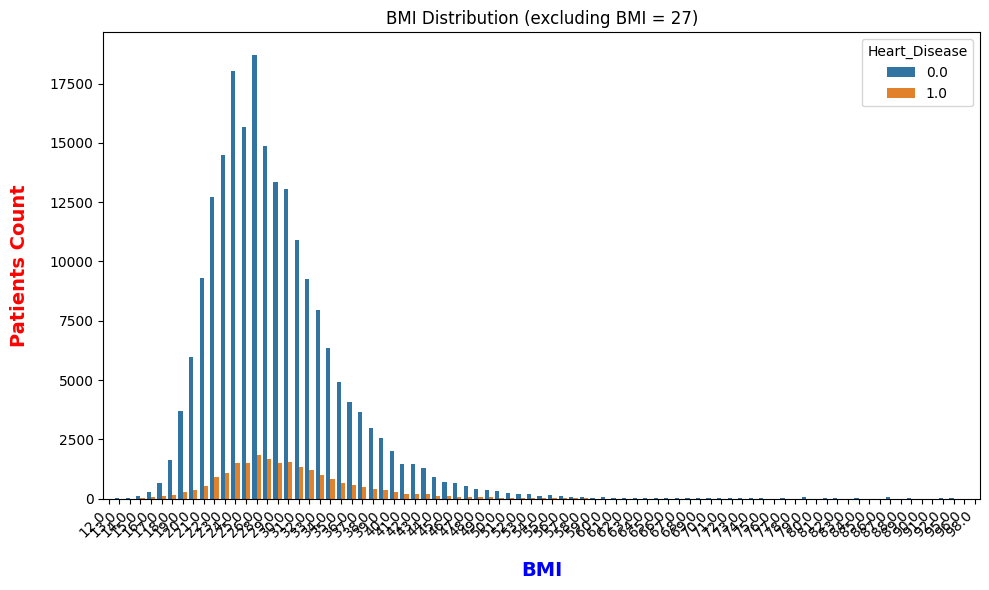

In [95]:

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB[Diabetic_DB['BMI'] != 27].groupby(['BMI', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')
sns.barplot(x='BMI', y='count', hue='Heart_Disease', data=ploter)
plt.xlabel('BMI', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution (excluding BMI = 27)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


From previews plots (Bar plot)

We noticed the following That the The bigger the BMI the more people gets heart disease


#### Heart Disease
coronary heart disease (CHD) or myocardial infarction (MI)
- 0 = Healthy
- 1 = Having heart problem

Bar Chart Heart Disease

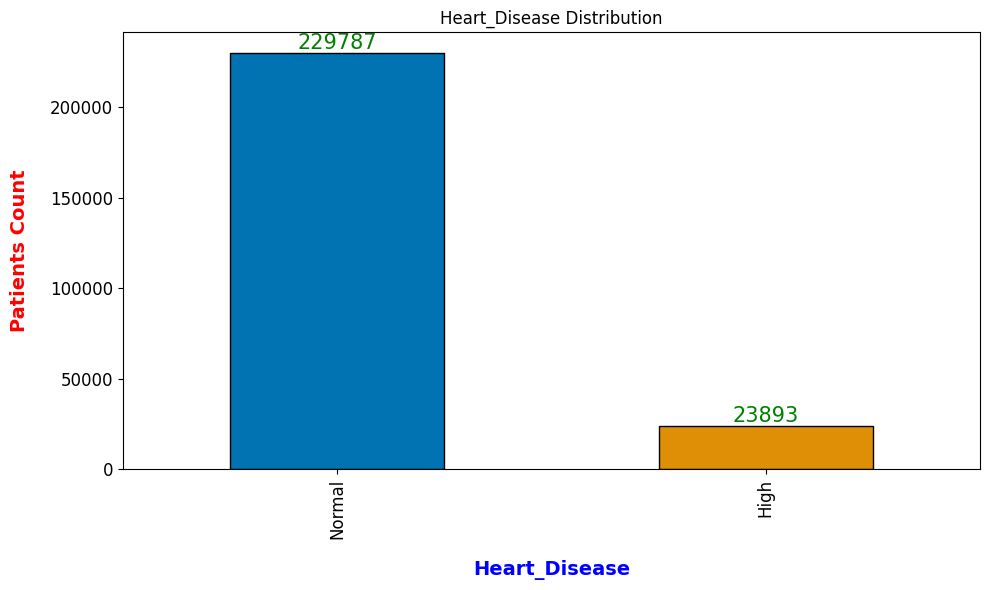

In [96]:
fig = plt.figure(figsize=(10, 6))
label = ["Healthy","Heart Disease"]
ax = Diabetic_DB['Heart_Disease'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('Heart_Disease', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Heart_Disease Distribution')
plt.tight_layout()

plt.show()

Pie Chart Heart_Disease

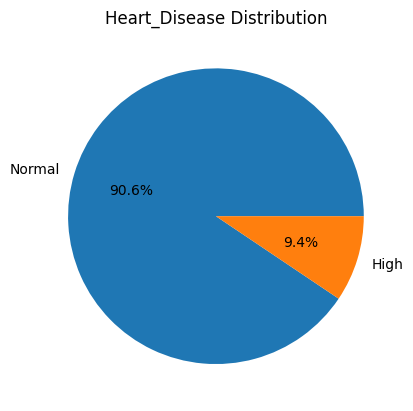

In [97]:
df= Diabetic_DB['Heart_Disease'].value_counts()
label = ["Healthy","Heart Disease"]

plt.pie(df.values, labels = labels, autopct='%1.1f%%')
plt.title("Heart_Disease Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of people have heart disease in this data set is very little


Bar Plot with respect to Diabetic or healthy

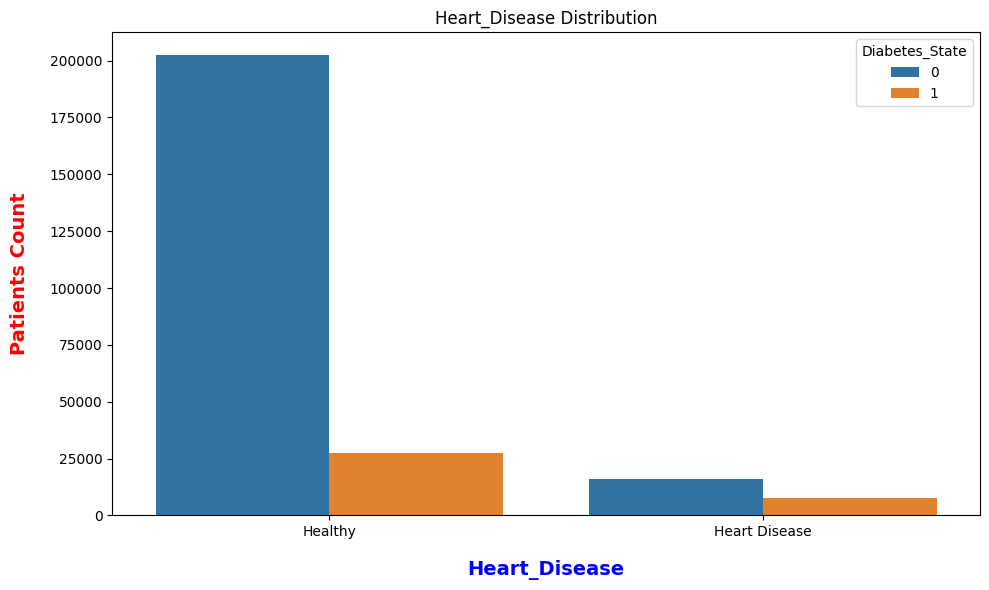

In [98]:

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Heart_Disease', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

label = ["Healthy","Heart Disease"]

sns.barplot(x='Heart_Disease', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('Heart_Disease', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Heart_Disease Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)


plt.show()

From previews plots (Bar plot)

We noticed the following that the ratio between people having healthy people and having only diabetes nearly equal to people with heart disease and people having both heart disease and diabetes

This isn't enought for proving that there is relation between heart disease and diabetes


#### PhysActivity (Physical Activity)
physical activity in past 30 days - not including job
- 0 = No
- 1 = Yes


Bar Chart PhysActivity

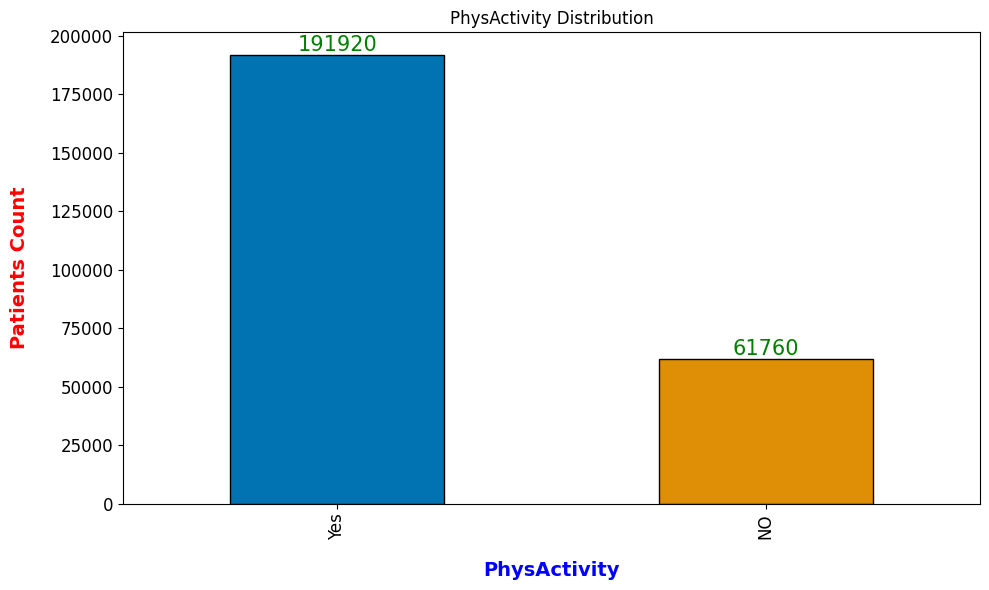

In [99]:
fig = plt.figure(figsize=(10, 6))

labels = [ 'Yes','NO']
ax = Diabetic_DB['PhysActivity'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(labels)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('PhysActivity', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysActivity Distribution')
plt.tight_layout()

plt.show()

Pie Chart PhysActivity

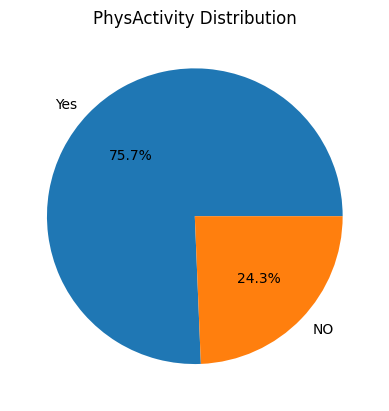

In [100]:
df= Diabetic_DB['PhysActivity'].value_counts()
labels = [ 'Yes','NO']

plt.pie(df.values, labels = labels, autopct='%1.1f%%')
plt.title("PhysActivity Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that most of the data shows that most of people do physical activities  in last 30 days


Bar Plot with respect to Diabetic or healthy

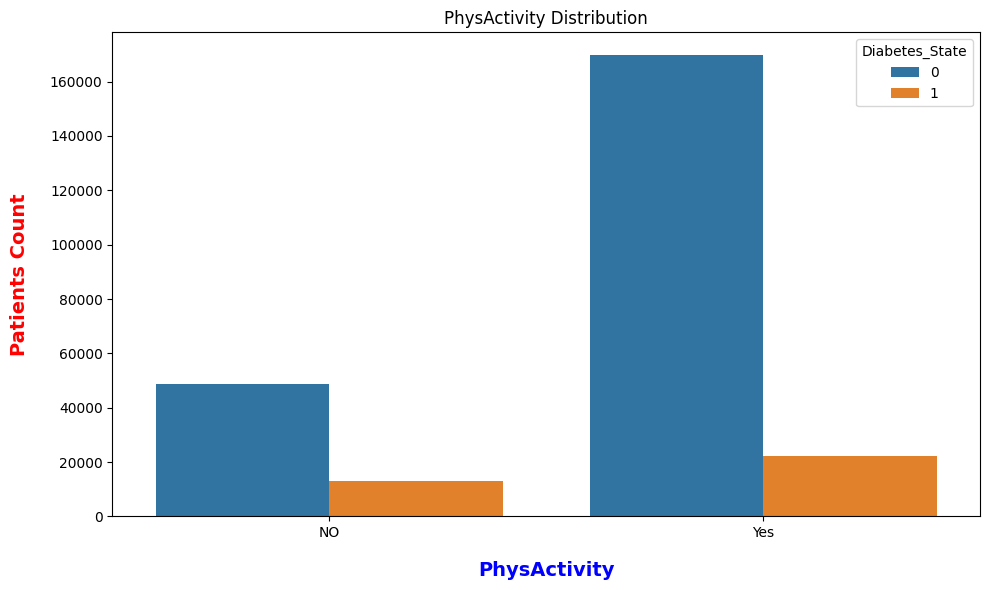

In [101]:

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['PhysActivity', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
labels = [ 'Yes','NO']

sns.barplot(x='PhysActivity', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('PhysActivity', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysActivity Distribution')
plt.tight_layout()

plt.xticks(ticks=[1, 0], labels=labels)


plt.show()

From previews plots (Bar plot)

We noticed the following that there is no relation between doing physical activity and diabetes as the ratio between both sides can consider near as some people when they got alarm that they got diabetes they start moving so maybe they had diabetes before doing physical activity


but judging by plot results we find that amount of people who do activities and have diabetes is half the people who do activities only and this is not expected as physical activities helps in treating diabetes which means that diabetic peeople do physical activities to decrease diabetes level


Bar Plot with respect to have Heart Disease or healthy

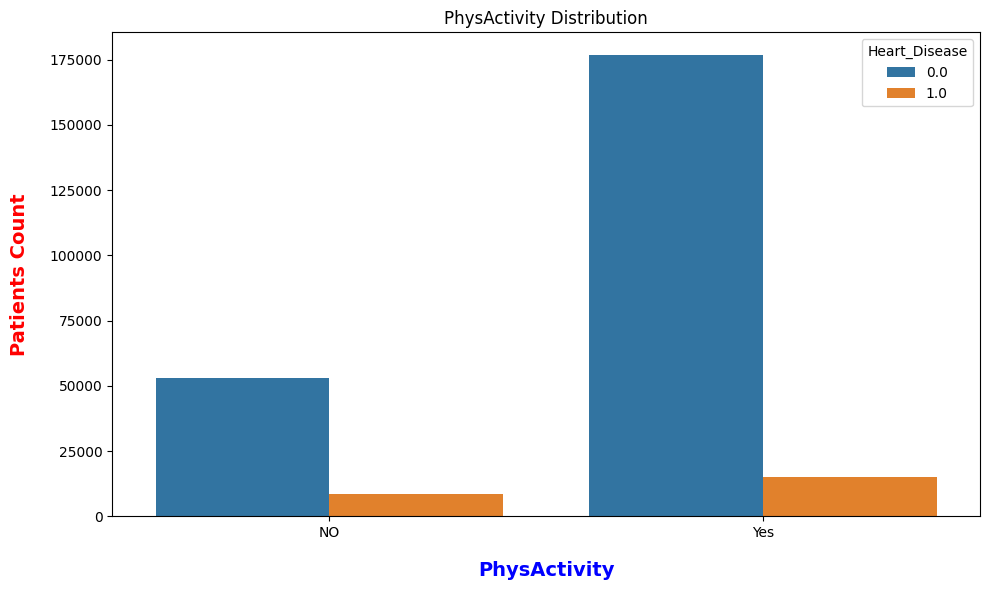

In [102]:

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['PhysActivity', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')
labels = [ 'Yes','NO']

sns.barplot(x='PhysActivity', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('PhysActivity', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysActivity Distribution')
plt.tight_layout()

plt.xticks(ticks=[1, 0], labels=labels)

plt.show()


From previews plots (Bar plot)

We noticed the following that there is no relation between doing physical activity and heart disease
but judging by plot results we find that amount of people who do activities and heart disease is greater than the people who don't activities and have heart disease and this is not expected as physical activities helps in treating heart disease which means that peeople who have heart disease do physical activities to treat their heart


#### PhysHlth (Physical Health)
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

Bar Chart PhysHlth

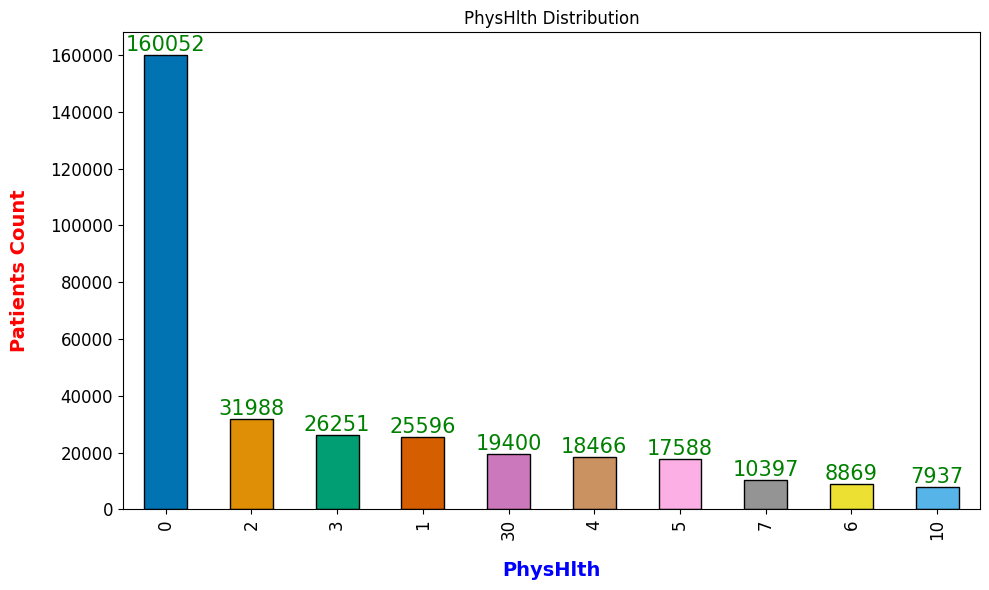

In [103]:
fig = plt.figure(figsize=(10, 6))

ax = Diabetic_DB['PhysHlth'].value_counts().head(10).plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(list(Diabetic_DB['PhysHlth'].value_counts().head(10).index))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()

plt.show()

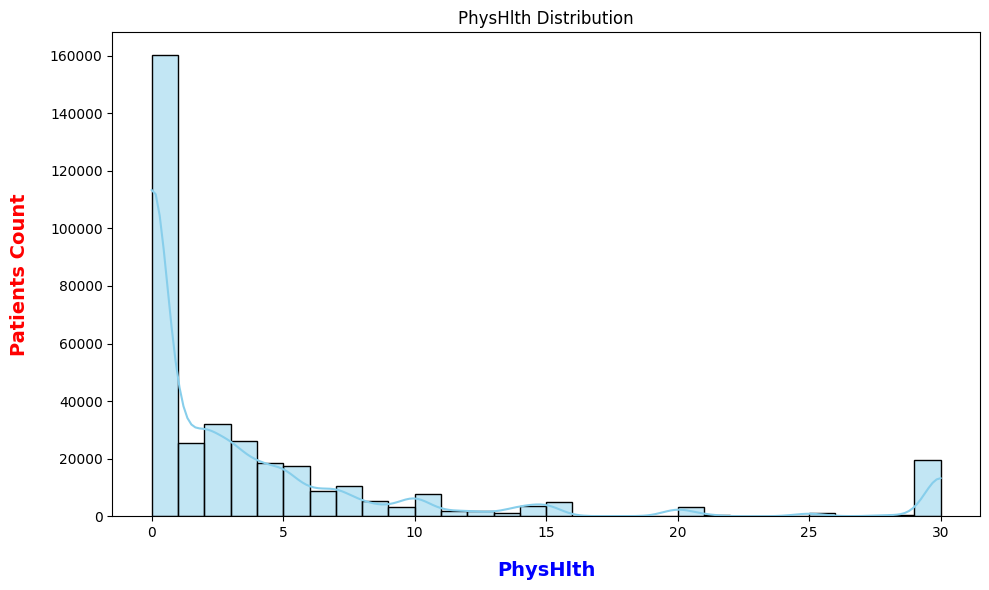

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(Diabetic_DB['PhysHlth'], bins=30, kde=True, color='skyblue')
plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()
plt.show()


scatter plot

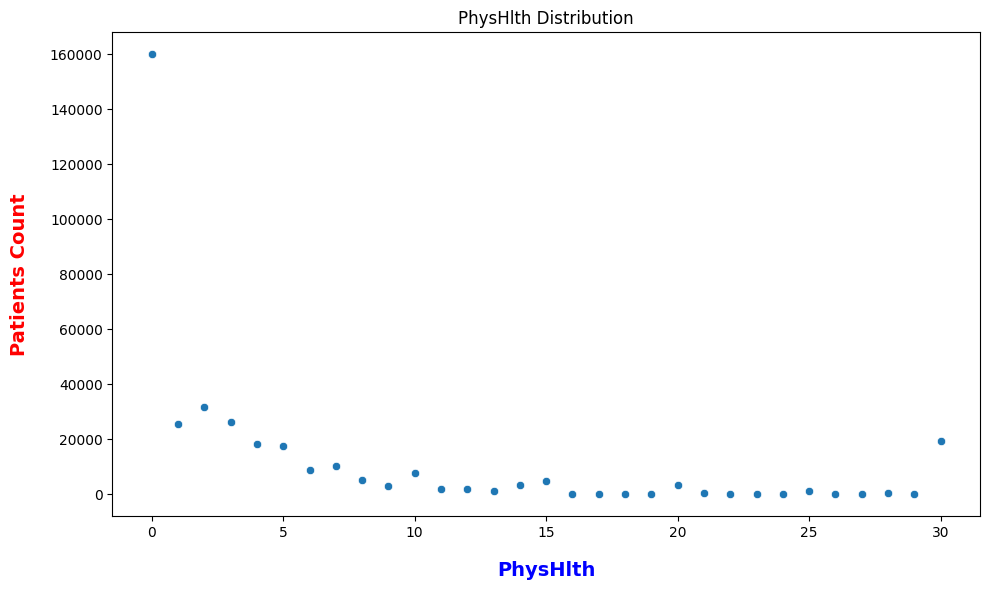

In [105]:
plt.figure(figsize=(10, 6))
df= Diabetic_DB['PhysHlth'].value_counts()
sns.scatterplot(df)
plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()
plt.show()

Pie Chart PhysHlth

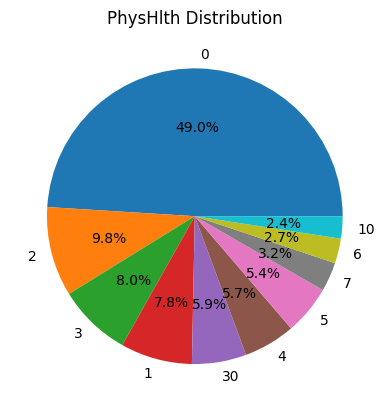

In [106]:
df= Diabetic_DB['PhysHlth'].value_counts().head(10)
plt.pie(df.values, labels = df.index, autopct='%1.1f%%')
plt.title("PhysHlth Distribution")
plt.show()

From previews plots (Bar plot and Pie plot and scatter plot and histogram)

We noticed the following that the most of cases have over 15 days without any physical problem in last 30 days expect that there are many cases which can't be neglected whose has 30 day physical problems as there are some cases in the middle between 15 days to 30 days


Bar Plot with respect to Diabetic or healthy

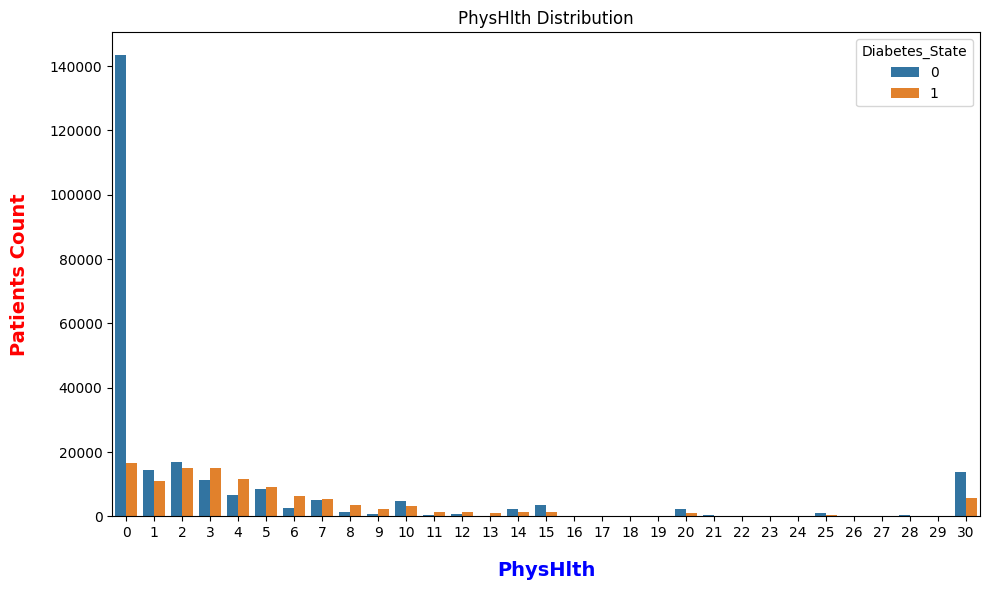

In [107]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['PhysHlth', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='PhysHlth', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()

plt.show()

Bar plot with removing O values to make remaining values clear

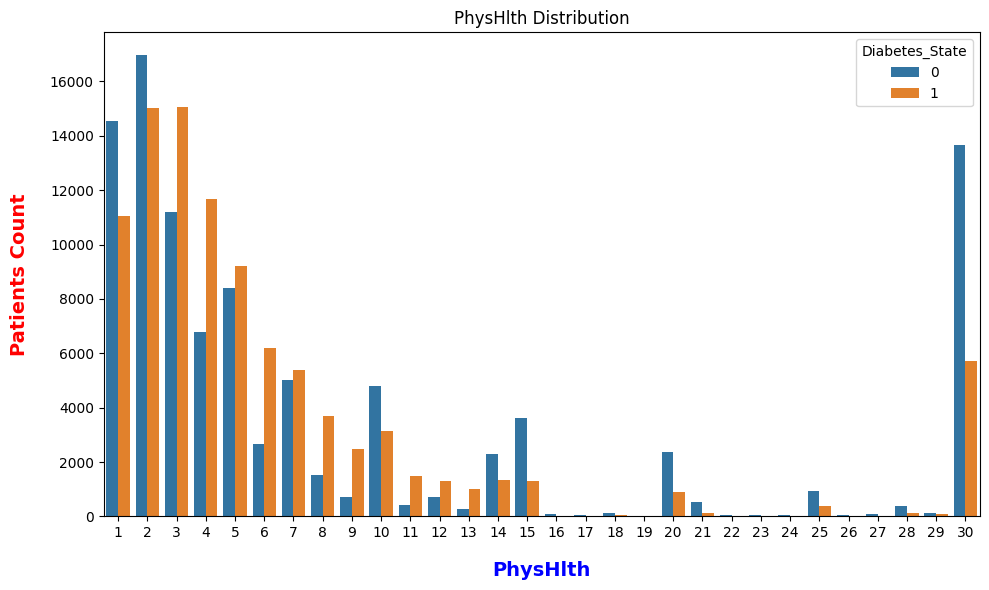

In [108]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB[Diabetic_DB['PhysHlth'] != 0].groupby(['PhysHlth', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='PhysHlth', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()

plt.show()

From previews plots (Bar plot)

We noticed the following that the physical health is not indecator or main cause for diabetes but diabetes can damage physical health

From the plots we see that the amount of cases that have diabetes are equal to healthy cases in numbers except for some cases

The amount of cases in 30 days case are high which indicates that maybe they have serious health problem which may be diabetes part of it

The exception is whose days = 0 as they are the healthy state and it has the biggest count of cases and the amount of diabetic cases is very low to healthy cases


Bar Plot with respect to have Heart Disease or healthy

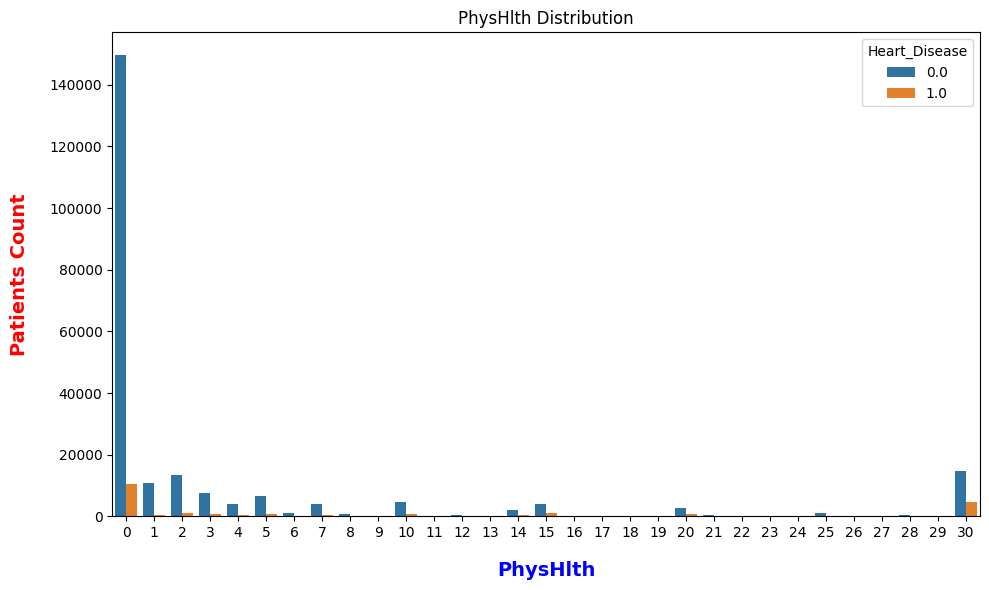

In [109]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['PhysHlth', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='PhysHlth', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()

plt.show()


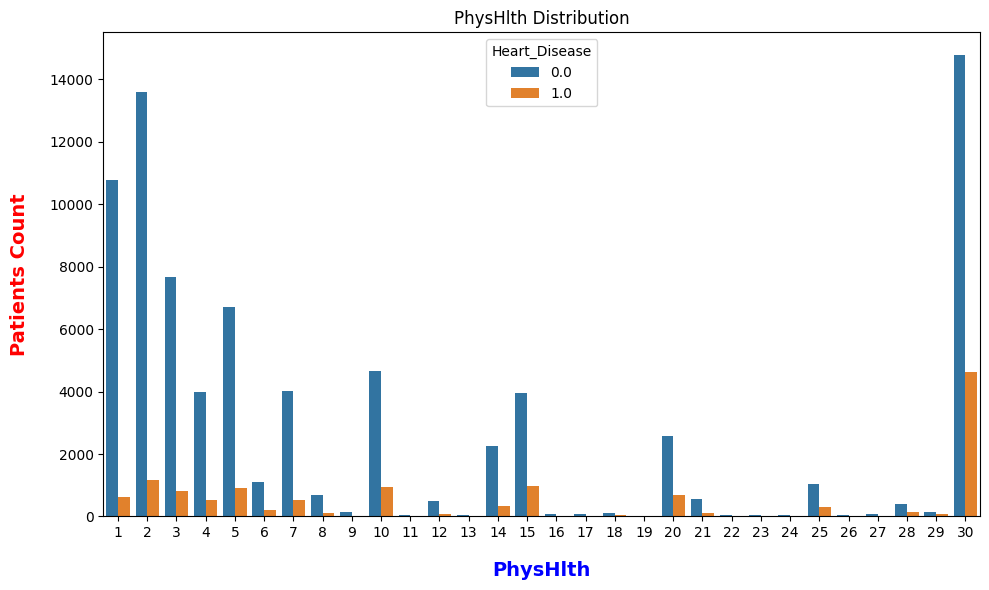

In [110]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB[Diabetic_DB['PhysHlth'] != 0].groupby(['PhysHlth', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='PhysHlth', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('PhysHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')
plt.tight_layout()

plt.show()


From previews plots (Bar plot)

We noticed the following that the physical health is not indecator or main cause for Heart Disease but Heart Disease can damage physical health

The amount of cases that have Heart Disease is nearly equal in all days except in days with no cases and 30 days case which indicate that maybe they have serious health problem which may be Heart Disease part of it

#### Gender
- 0 = Female
- 1 = Male

Bar Chart Gender

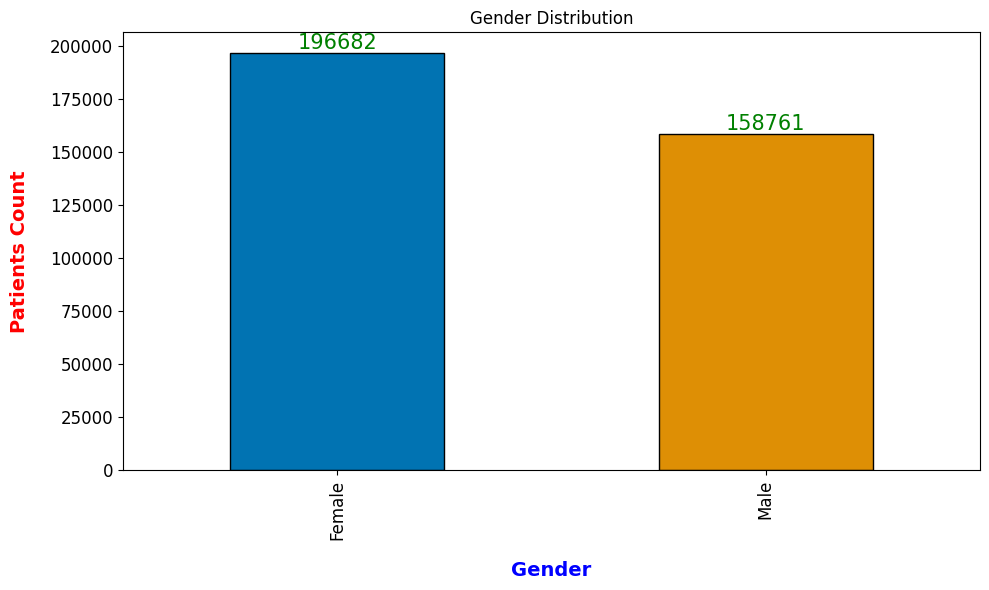

In [111]:
fig = plt.figure(figsize=(10, 6))

label = ["Female","Male"]

ax = Diabetic_DB['Gender'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('Gender', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Gender Distribution')
plt.tight_layout()

plt.show()

Pie Chart Gender

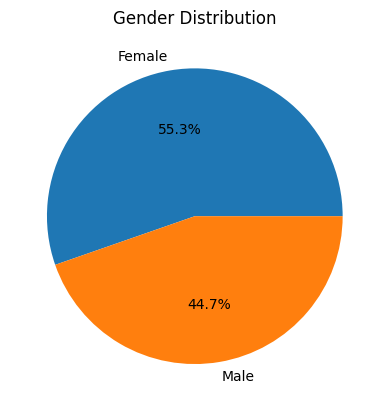

In [112]:
df= Diabetic_DB['Gender'].value_counts()
label = ["Female","Male"]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that amount of males and females are nearly equal (females 55.3% is greater that males 44.7)


Bar Plot with respect to Diabetic or healthy

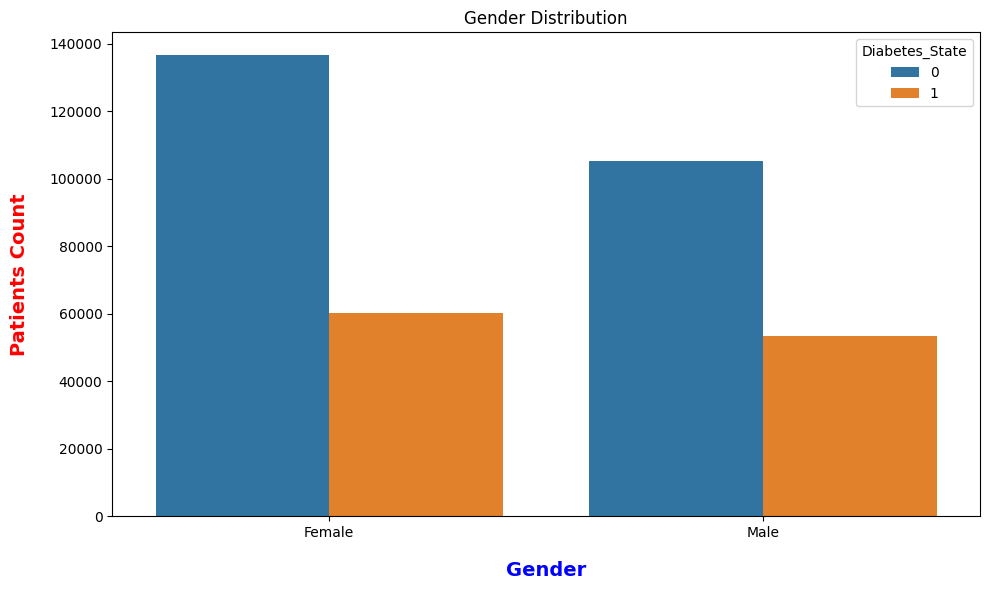

In [113]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Gender', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["Female","Male"]

sns.barplot(x='Gender', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('Gender', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Gender Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the difference between healthy cases to diabetic cases in females side is greater than in male side as we see that diabetic cases is equal the half of healthy cases


Bar Plot with respect to have Heart Disease or healthy

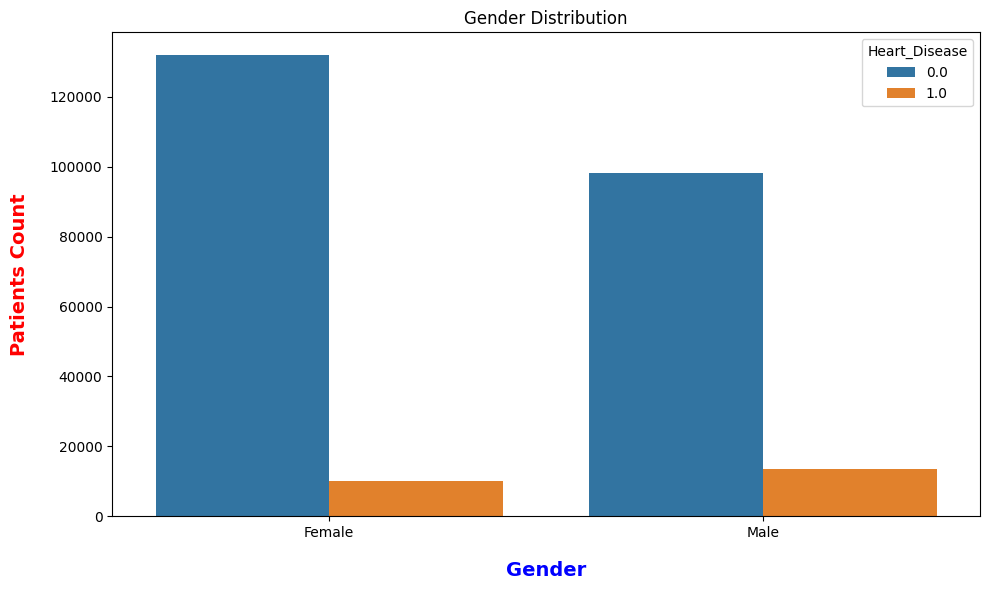

In [114]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Gender', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Gender', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Gender', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Gender Distribution')
plt.tight_layout()

label = ["Female","Male"]

plt.xticks(ticks=[0, 1], labels=label)


plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of cases that have heart disease in females side is nearly equal to in males side


#### Age
Range from 0 to 100 years old

Bar Chart Age

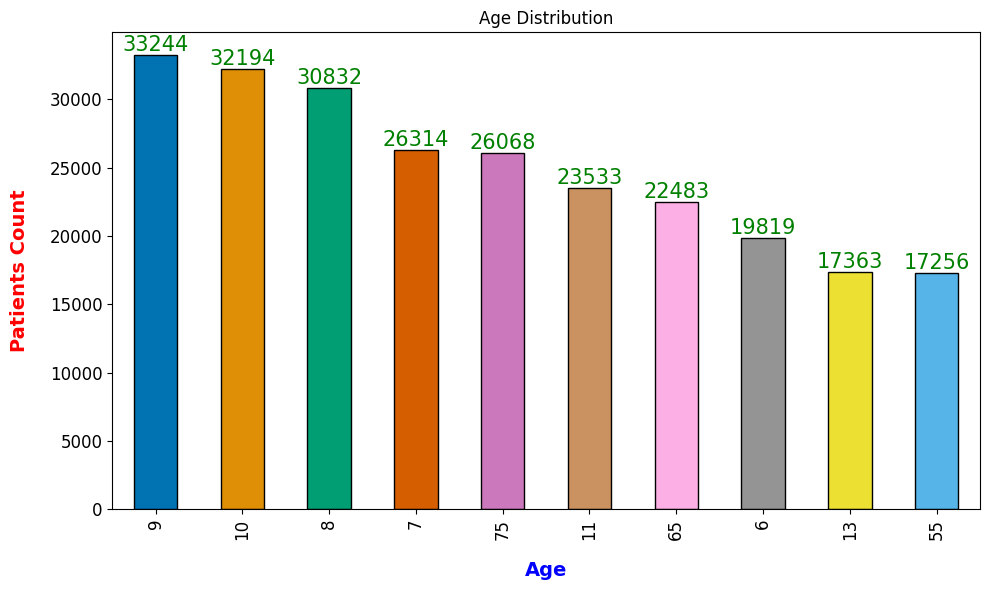

In [115]:
fig = plt.figure(figsize=(10, 6))

ax = Diabetic_DB['Age'].value_counts().head(10).plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(list(Diabetic_DB['Age'].value_counts().head(10).index))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('Age', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Age Distribution')
plt.tight_layout()

plt.show()

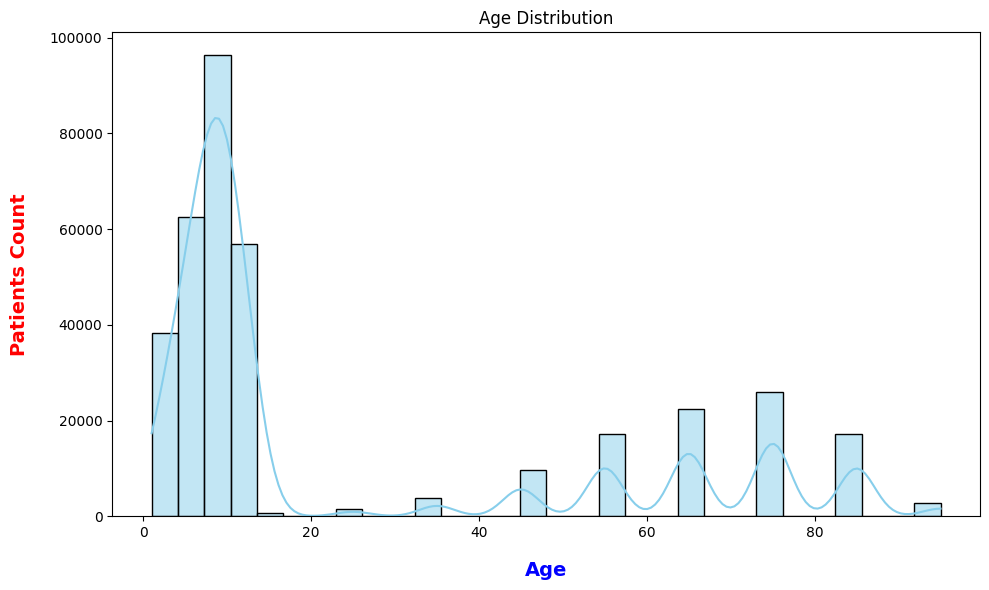

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(Diabetic_DB['Age'], bins=30, kde=True, color='skyblue')
plt.xlabel('Age', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()


scatter plot

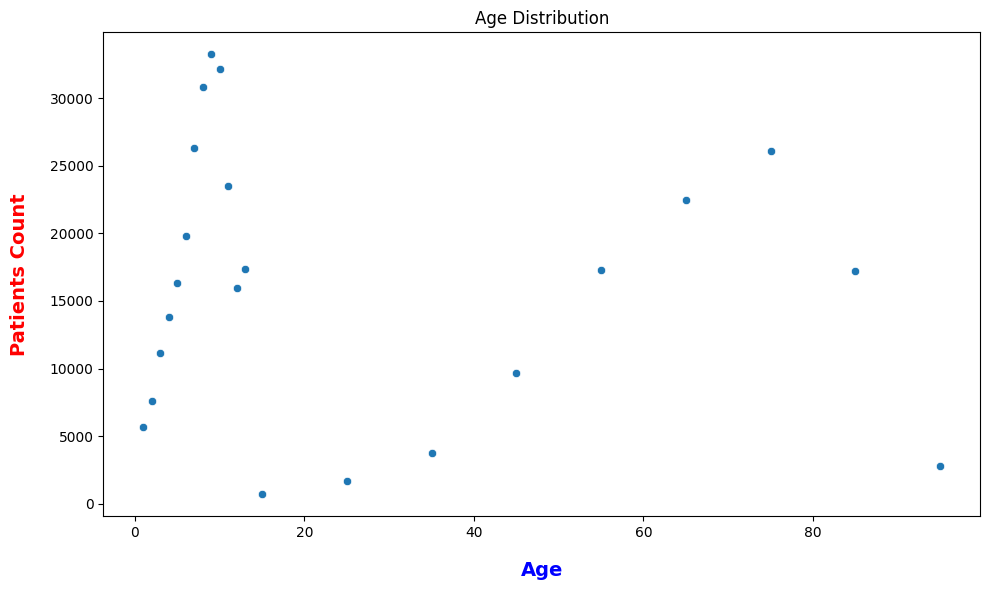

In [117]:
plt.figure(figsize=(10, 6))
df= Diabetic_DB['Age'].value_counts()
sns.scatterplot(df)
plt.xlabel('Age', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

Pie Chart Age

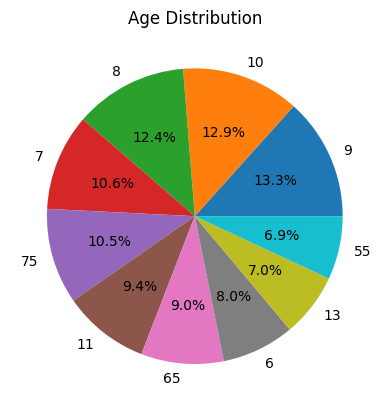

In [118]:
df= Diabetic_DB['Age'].value_counts().head(10)
plt.pie(df.values, labels = df.index, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.show()

From previews plots (Bar plot and Pie plot and scatter plot and histogram)

We noticed the following that there are very large amount of cases in small age (range from 0 to 20 years old) and other values are in normal distribution shape (bell shape)


Bar Plot with respect to Diabetic or healthy

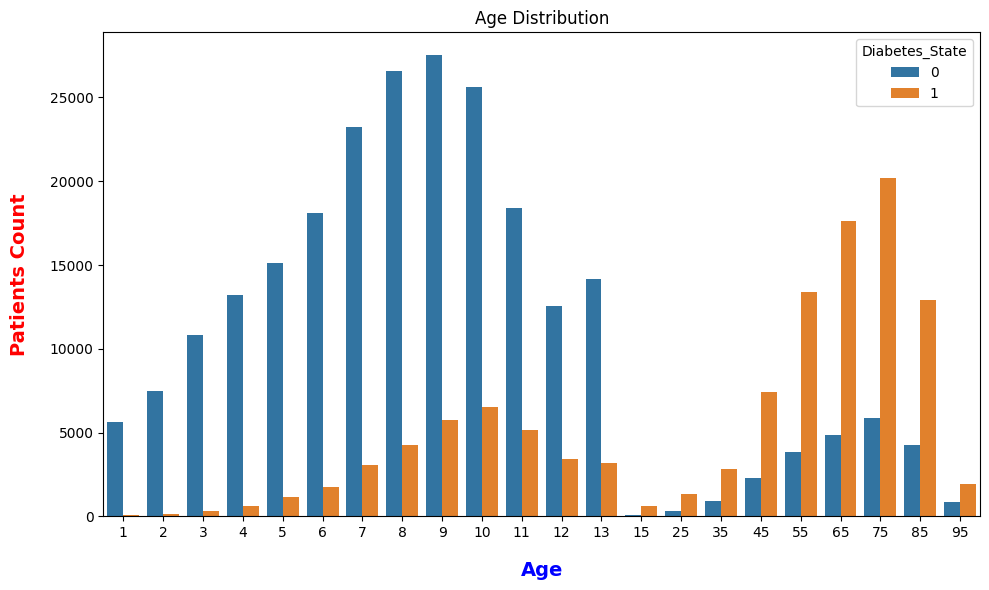

In [119]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Age', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='Age', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('Age', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Age Distribution')
plt.tight_layout()

plt.show()

From previews plots (Bar plot)

We noticed the following that in the small age the probablity that you get diabetes is not so high but after age 25 the older you get the more chance to get diabetes



Bar Plot with respect to have Heart Disease or healthy

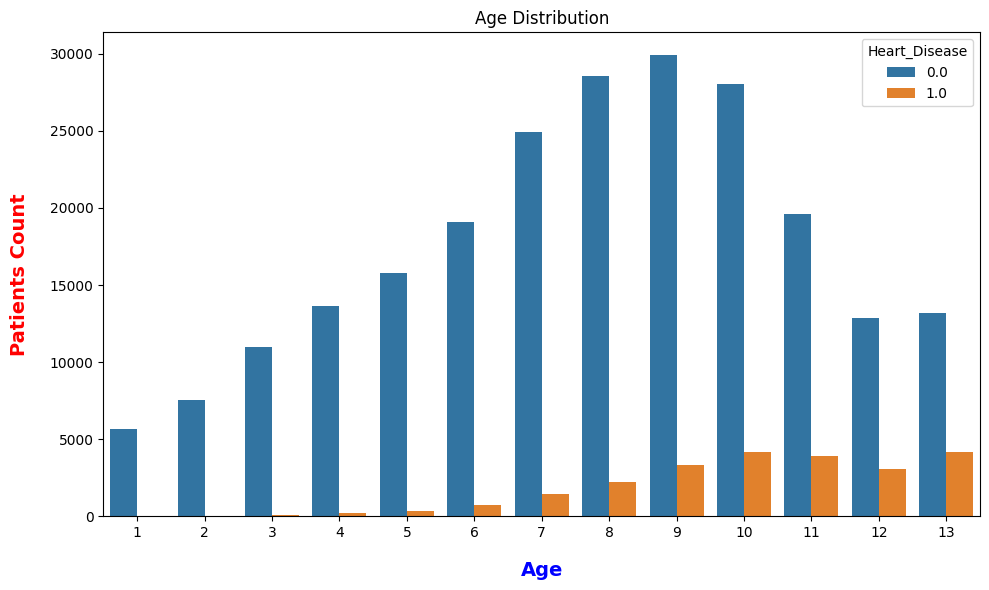

In [120]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Age', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Age', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Age', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Age Distribution')
plt.tight_layout()

plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following That the available data shows that there is chance in small ages you can get heart disease but the plot doesn't show the chance of old age of getting heart disease


#### Stroke
- 0 = Healthy
- 1 = Having Stroke

Bar Chart Stroke

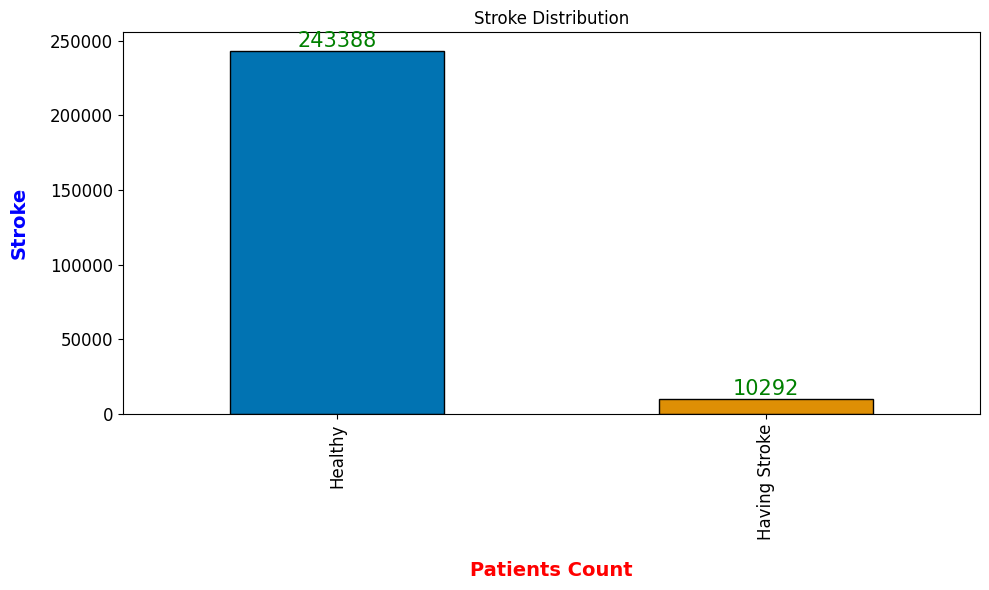

In [121]:
fig = plt.figure(figsize=(10, 6))
label = ["Healthy","Having Stroke"]
ax = Diabetic_DB['Stroke'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('Stroke', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Stroke Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

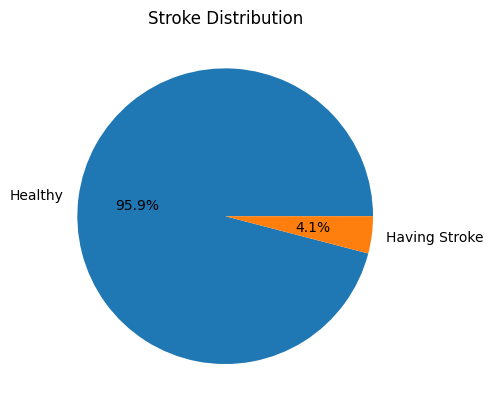

In [122]:
df= Diabetic_DB['Stroke'].value_counts()
label = ["Healthy","Having Stroke"]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("Stroke Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of cases that had stroke is very little can't judge with it  as mostly all cases are healthy


Bar Plot with respect to Diabetic or healthy

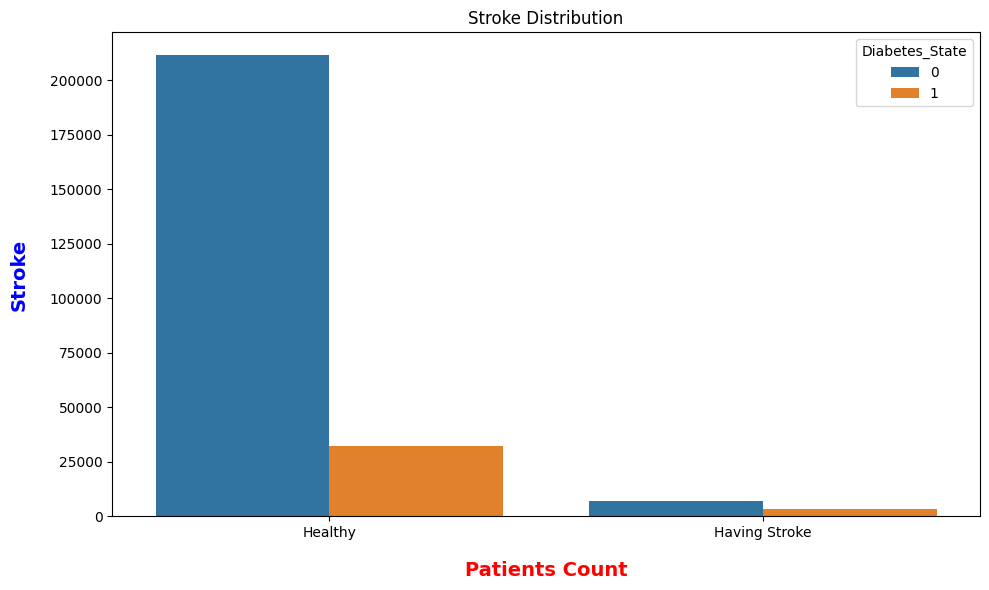

In [123]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Stroke', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["Healthy","Having Stroke"]

sns.barplot(x='Stroke', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('Stroke', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Stroke Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following the ratio between cases of having diabetes and cases of not having diabetes are nearly equal in both sides (the cases of having diabetes is half the cases of not having diabetes)


Bar Plot with respect to have Heart Disease or healthy

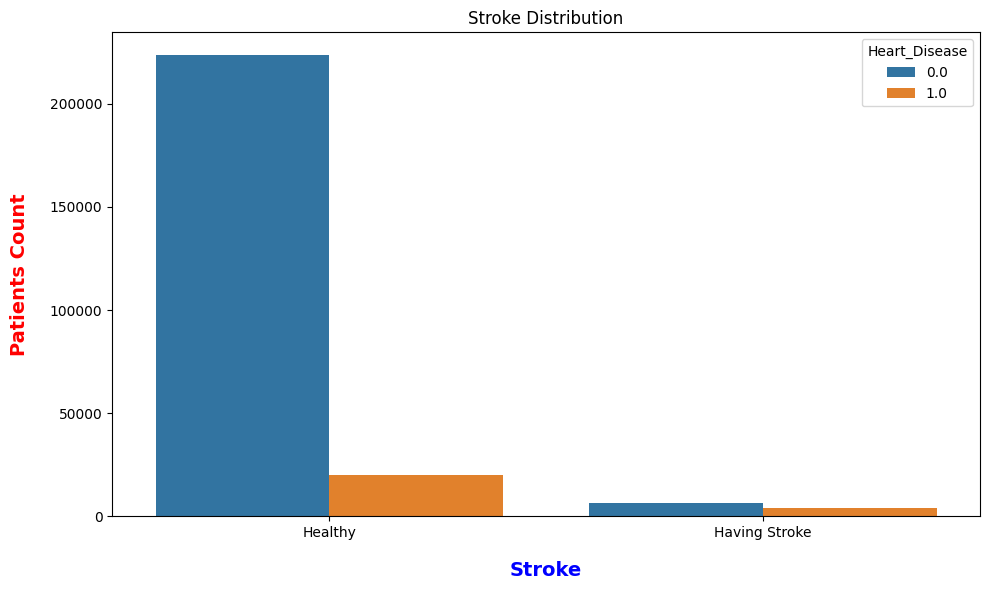

In [124]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Stroke', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Stroke', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Stroke', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Stroke Distribution')
plt.tight_layout()
label = ["Healthy","Having Stroke"]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following that is the cases in having stroke have chance to get heart disease as stroke cause heart problem


#### GenHlth (General health)
Would you say that in general your health is: scale 1-5
- 1 = excellent
- 2 = very good
- 3 = good
- 4 = fair
- 5 = poor

In [125]:
Diabetic_DB['GenHlth'].value_counts()

GenHlth
2.00    89084
3.00    75646
1.00    45299
4.00    31570
5.00    12081
Name: count, dtype: int64

Bar Chart GenHlth

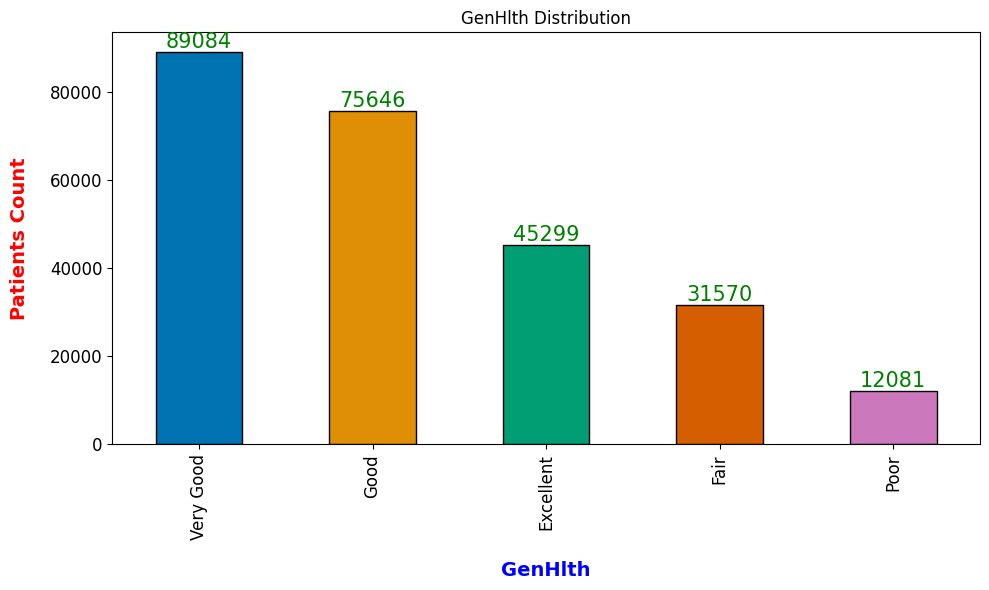

In [126]:
fig = plt.figure(figsize=(10, 6))

label = ["Very Good","Good","Excellent","Fair","Poor"]

ax = Diabetic_DB['GenHlth'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('GenHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('GenHlth Distribution')
plt.tight_layout()

plt.show()

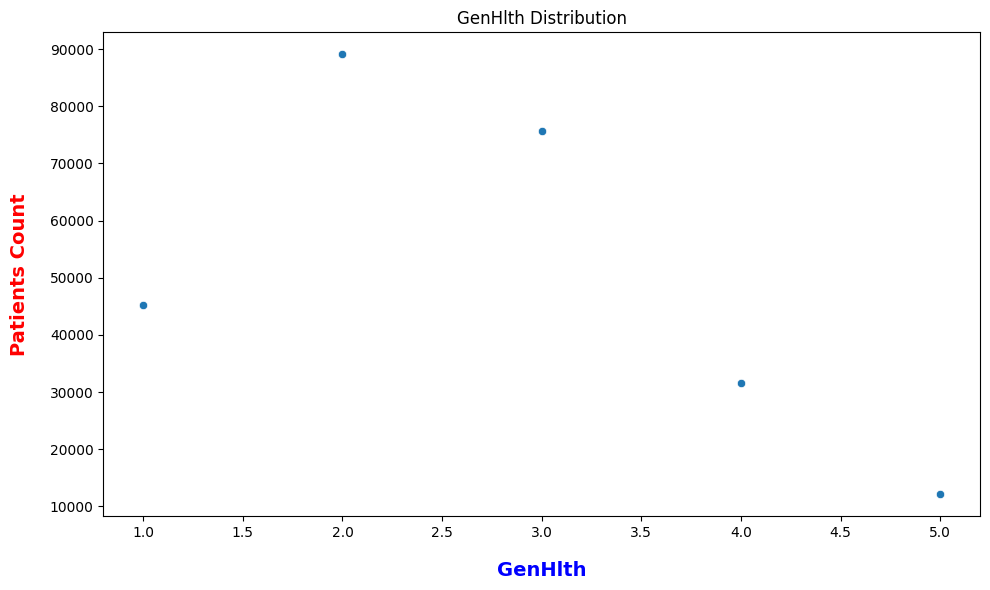

In [127]:
plt.figure(figsize=(10, 6))
df= Diabetic_DB['GenHlth'].value_counts()
sns.scatterplot(df)
plt.xlabel('GenHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('GenHlth Distribution')
plt.tight_layout()
plt.show()

Pie Chart GenHlth

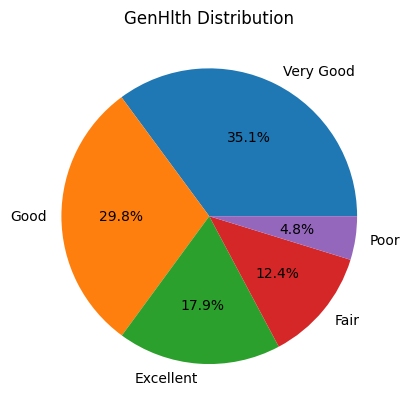

In [128]:
df= Diabetic_DB['GenHlth'].value_counts()
label = ["Very Good","Good","Excellent","Fair","Poor"]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("GenHlth Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that is the big amount of people are in very good and good states as they have 75% of data (53.7% + 21.3%)

The poor cases is very little (3.4%) with respect to other states


Bar Plot with respect to Diabetic or healthy

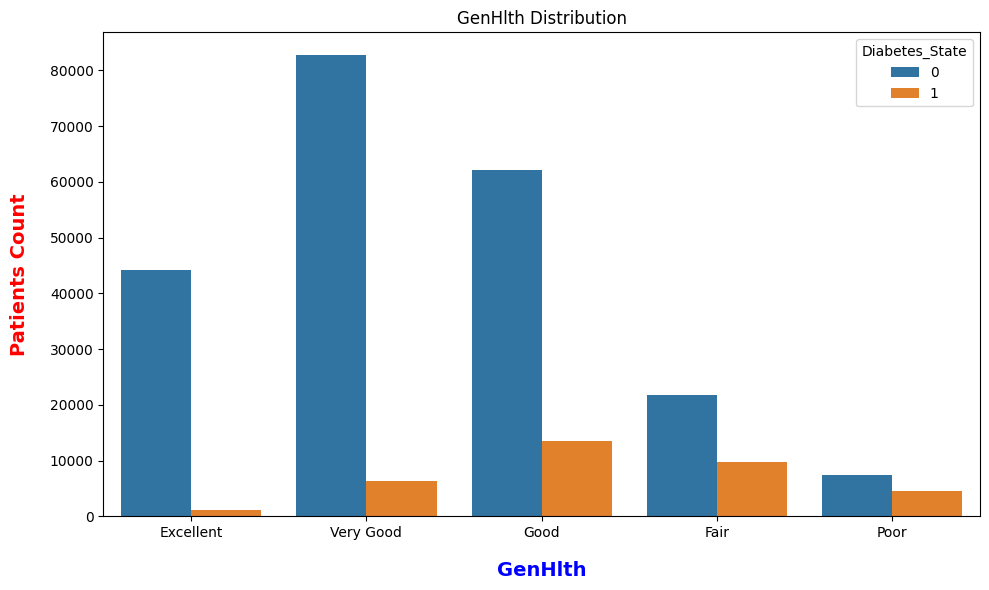

In [129]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['GenHlth', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='GenHlth', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('GenHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('GenHlth Distribution')
plt.tight_layout()
label = ["Excellent","Very Good","Good","Fair","Poor"]

plt.xticks(ticks=[0,1, 2,3,4], labels=label)


plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that

1.  In Excellent state, the amount of diabetic cases can be neglected as they are little amount with respect to Healthy cases and this is logic as excellent state means your health is great
2.  In Very good state, the amount of people that have diabetes equal to healthy people (there is difference but not big) as this prove that diabetes doesn't effect the health of the patient or in its first stages
3.  In Good state, The amount of cases that has diabetes is little with respect to healthy people and this says that may be the cases suffer other illness that effects on their health or diabetes effect is not strong on them
4.  In Faie state, the amount of people that have diabetes equal to half healthy people and this state shows that the patient has some problem in his body and maybe one of them is diabetes
5.  In Poor state,the amount of people that have diabetes equal to healthy people (there is difference but not big) and this is logic as poor health then the patient having serious problems and diabetes can causes problems in human body and effect health if the state of diabetes is high

Bar Plot with respect to have Heart Disease or healthy

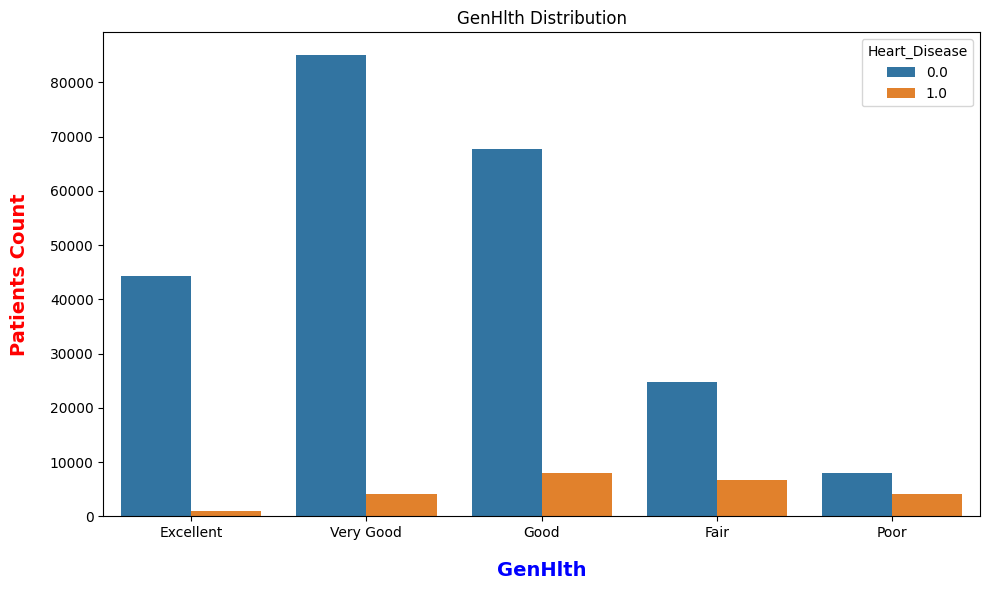

In [130]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['GenHlth', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='GenHlth', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('GenHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('GenHlth Distribution')
plt.tight_layout()
label = ["Excellent","Very Good","Good","Fair","Poor"]

plt.xticks(ticks=[0,1, 2,3,4], labels=label)


plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following that

1.  In Excellent state, the amount of Heart disease cases can be neglected as they are little amount with respect to Healthy cases and this is logic as excellent state means your health is great
2.  In Very good state, The amount of cases that has Heart disease is little with respect to healthy people which means these cases feels just simple pain can be treated and come over it
3.  In Good state, The amount of cases that has Heart disease is little with respect to healthy people and this says that may be the cases suffer other illness that effects on their health or Heart disease effect is not strong on them
4.  In Faie state, the amount of people that have Heart disease less than the half healthy people and this state shows that the patient has some problem in his body and maybe one of them is Heart disease
5.  In Poor state,the amount of people that have Heart disease equal to healthy people (there is difference but not big) and this is logic as poor health then the patient having serious problems and Heart disease can causes problems in human body and effect health if the state of Heart disease is high


#### CholCheck (Cholesterol Check Status)
Whether the individual had their cholesterol checked in the past five years.
- 0 = no cholesterol check in 5 years
- 1 = yes cholesterol check in 5 years

Bar Chart Stroke

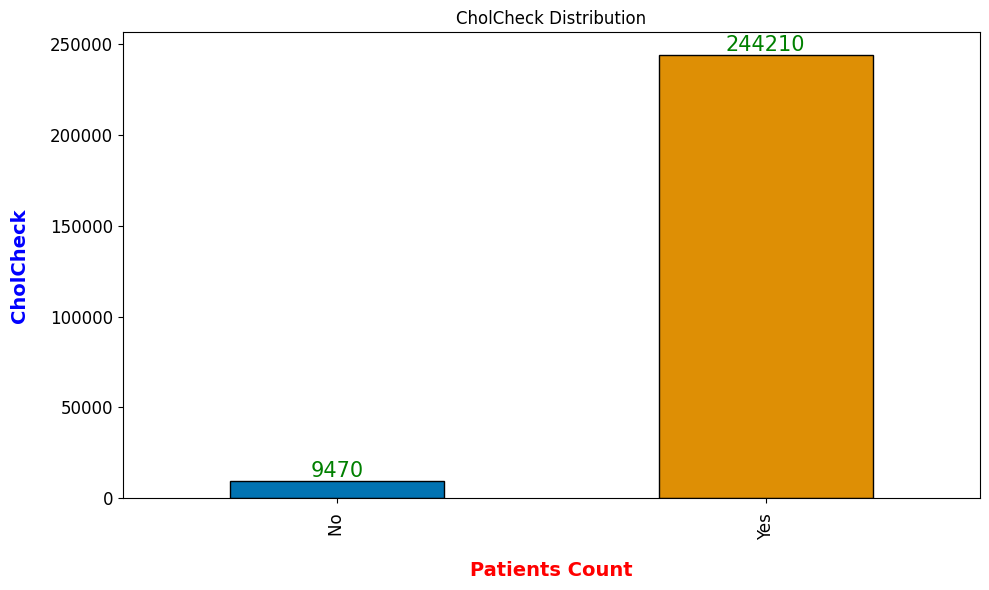

In [131]:
fig = plt.figure(figsize=(10, 6))
label = ["No ","Yes "]

ax = Diabetic_DB['CholCheck'].value_counts().sort_index() .plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('CholCheck', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('CholCheck Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

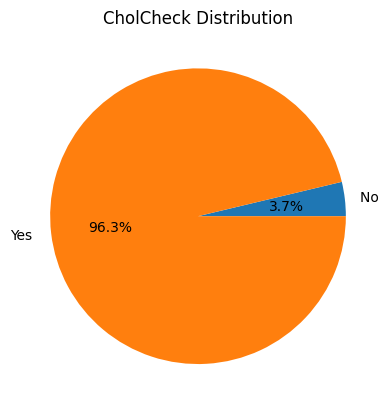

In [132]:
df= Diabetic_DB['CholCheck'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("CholCheck Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of cases that didn't do the check is very little can't judge with it as mostly all cases that did the check

Bar Plot with respect to Diabetic or healthy

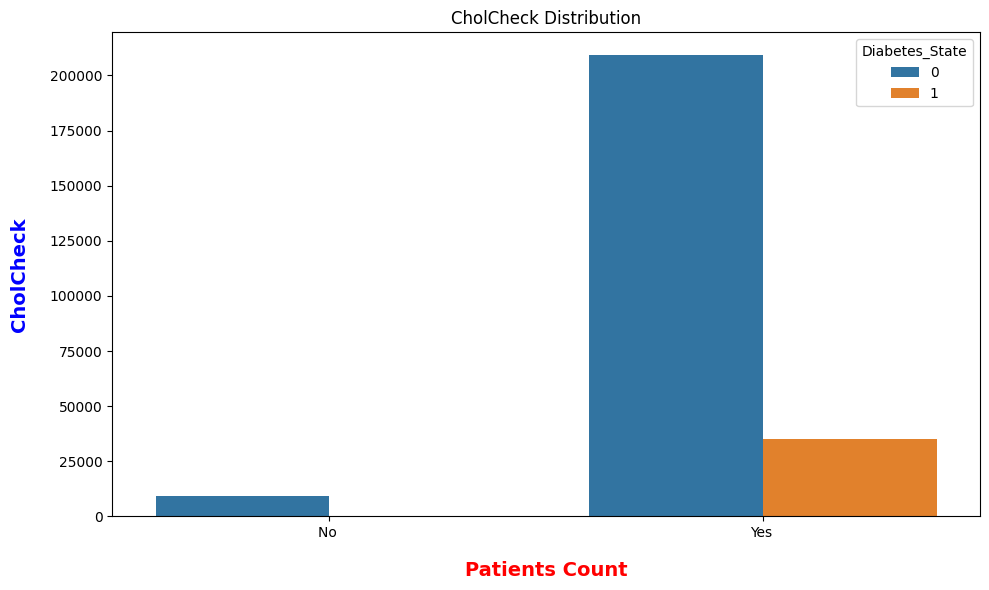

In [133]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['CholCheck', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='CholCheck', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('CholCheck', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('CholCheck Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following the cases who didn't made the check is little so there is no diabetes cases

in the cases who did made the check there are little amount of cases had diabetes

Bar Plot with respect to have Heart Disease or healthy

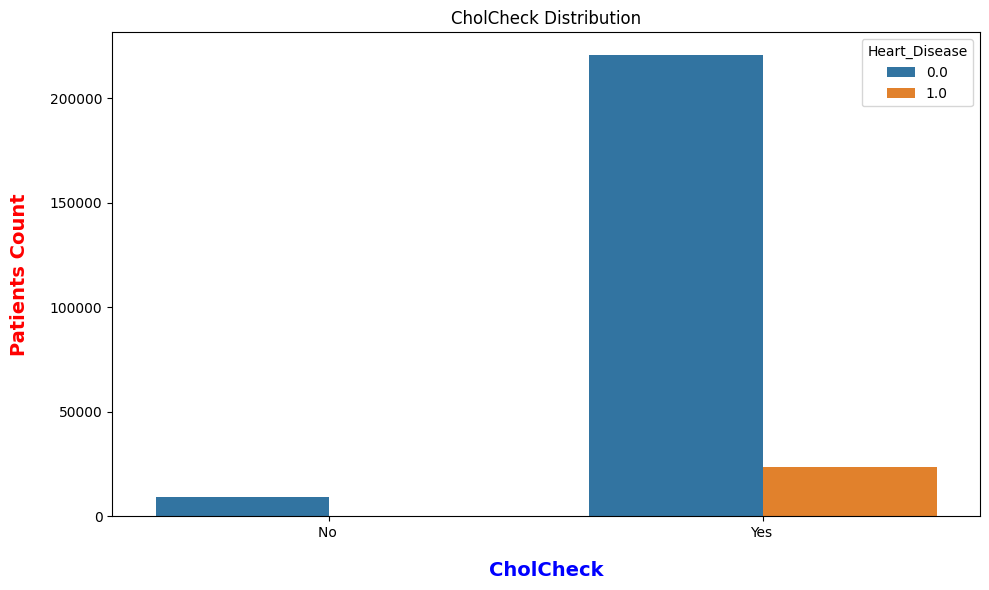

In [134]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['CholCheck', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='CholCheck', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('CholCheck', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('CholCheck Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following the cases who didn't made the check is little so there is no Heartdisease cases

in the cases who did made the check there are little amount of cases had Heartdisease  

#### Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
- 0 = no
- 1 = yes


Bar Chart Stroke

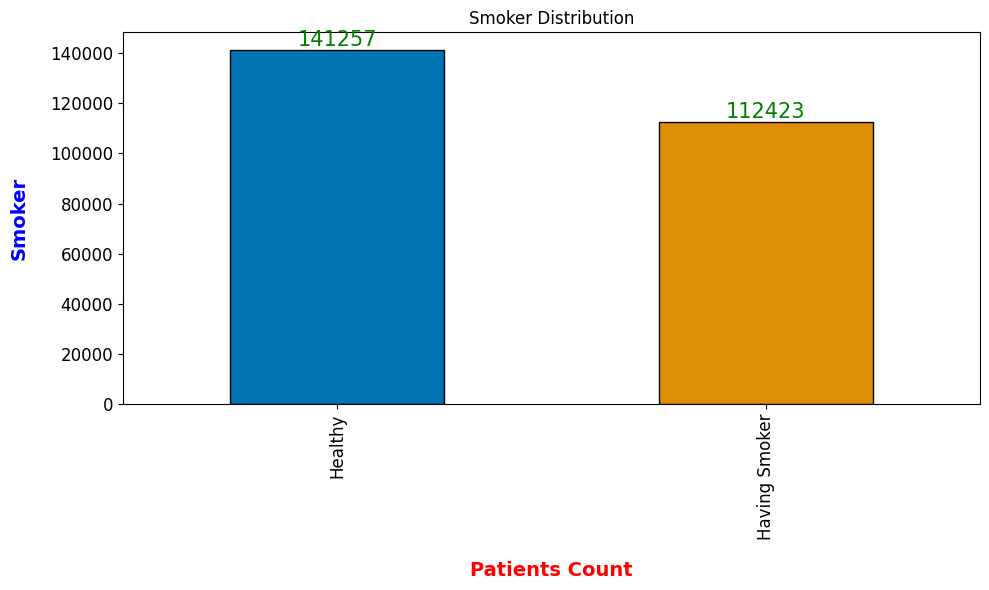

In [135]:
fig = plt.figure(figsize=(10, 6))
label = ["Healthy","Having Smoker"]
ax = Diabetic_DB['Smoker'].value_counts().plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('Smoker', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Smoker Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

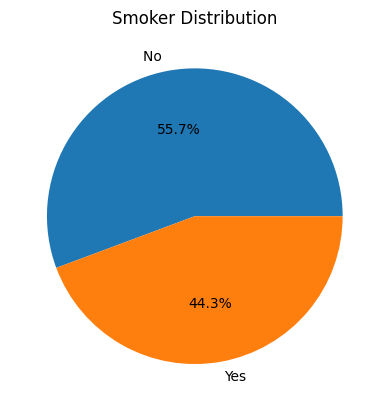

In [136]:
df= Diabetic_DB['Smoker'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("Smoker Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of smokers are less than not smokers but the data is nearly divided between them

Bar Plot with respect to Diabetic or healthy

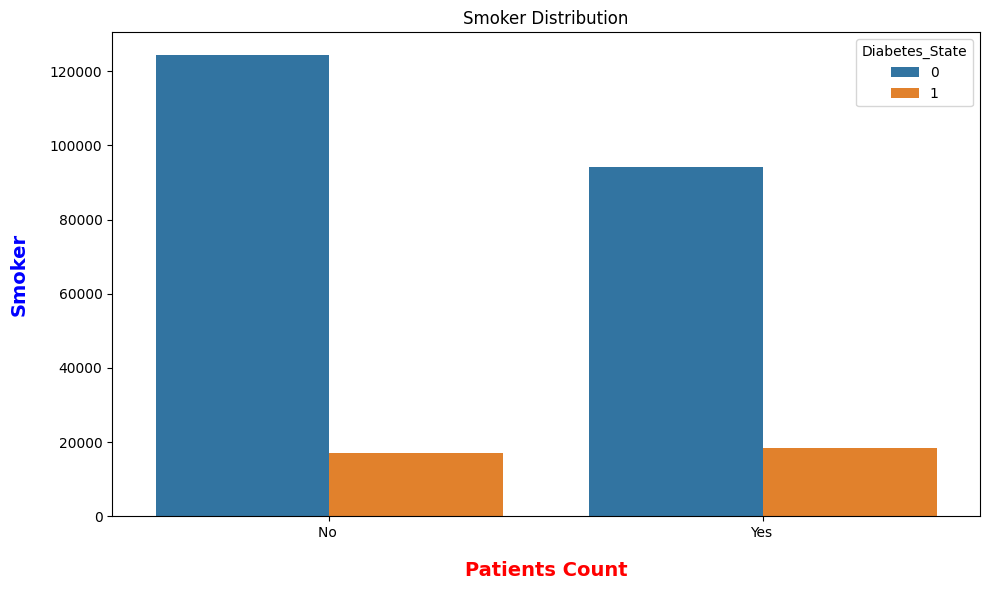

In [137]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Smoker', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='Smoker', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('Smoker', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Smoker Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following the ratio between cases of having diabetes and cases of not having diabetes are nearly equal in both sides

Bar Plot with respect to have Heart Disease or healthy

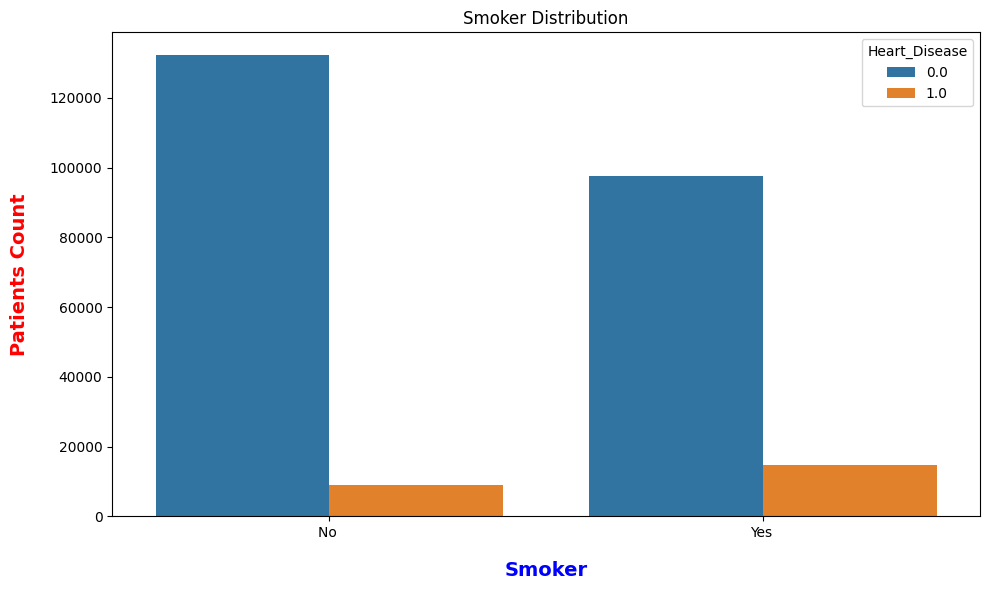

In [138]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Smoker', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Smoker', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Smoker', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Smoker Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


From previews plots (Bar plot and Pie plot)

We noticed the following the ratio between cases of having Heart disease and cases of not having Heart disease are nearly equal in both sides but is more in smoker side


#### Fruits
Whether the individual consumes fruits regularly.
Consume Fruit 1 or more times per day
- 0 = no
- 1 = yes

Bar Chart Stroke

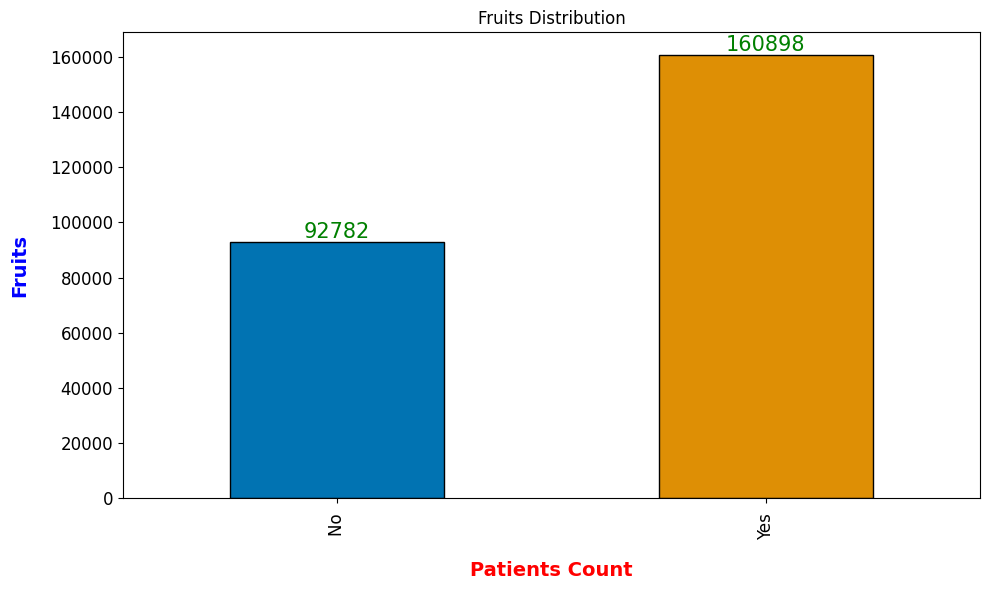

In [139]:
fig = plt.figure(figsize=(10, 6))
label = ["No ","Yes "]
ax = Diabetic_DB['Fruits'].value_counts().sort_index() .plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('Fruits', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Fruits Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

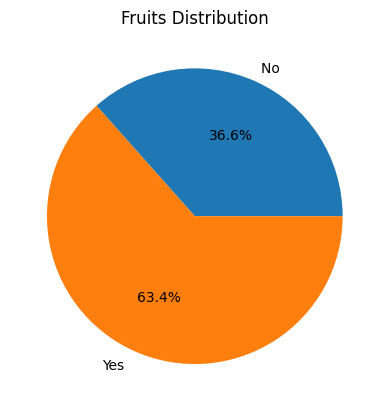

In [140]:
df= Diabetic_DB['Fruits'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("Fruits Distribution")
plt.show()

From previews plots (Bar plot and Pie plot)

We noticed the following that the amount of cases that eat fruit daily is more than who didn't


Bar Plot with respect to Diabetic or healthy

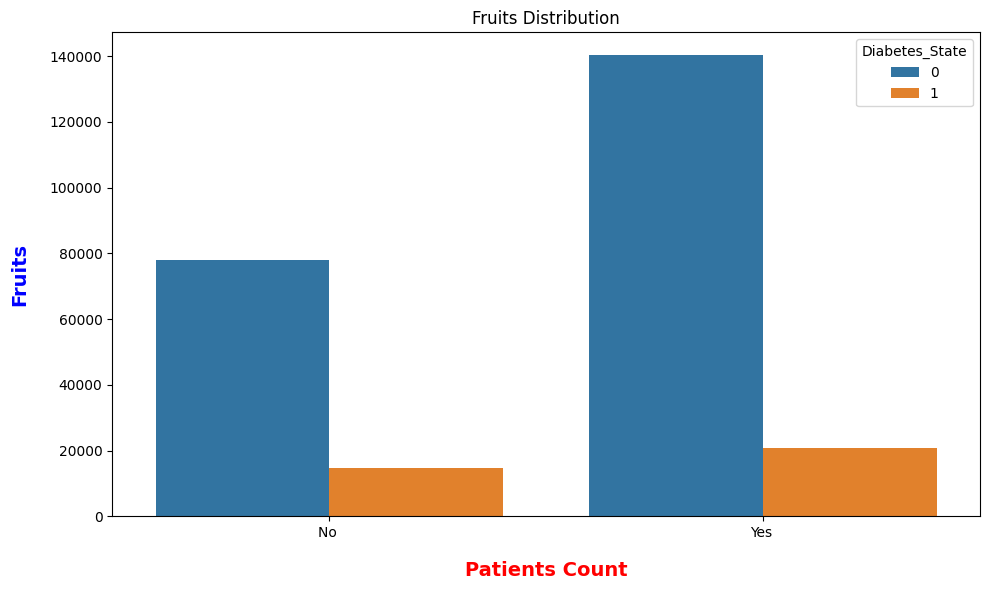

In [141]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Fruits', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='Fruits', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('Fruits', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Fruits Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

Bar Plot with respect to have Heart Disease or healthy

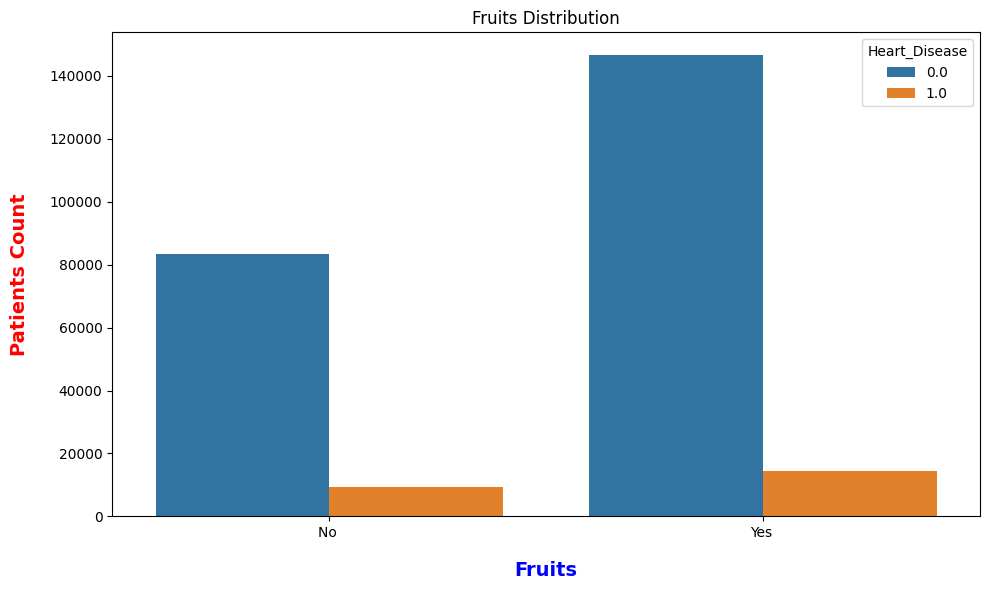

In [142]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Fruits', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Fruits', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Fruits', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Fruits Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


#### Veggies
Whether the individual consumes vegetables regularly.
Consume Vegetables 1 or more times per day
- 0 = no
- 1 = yes


Bar Chart Stroke

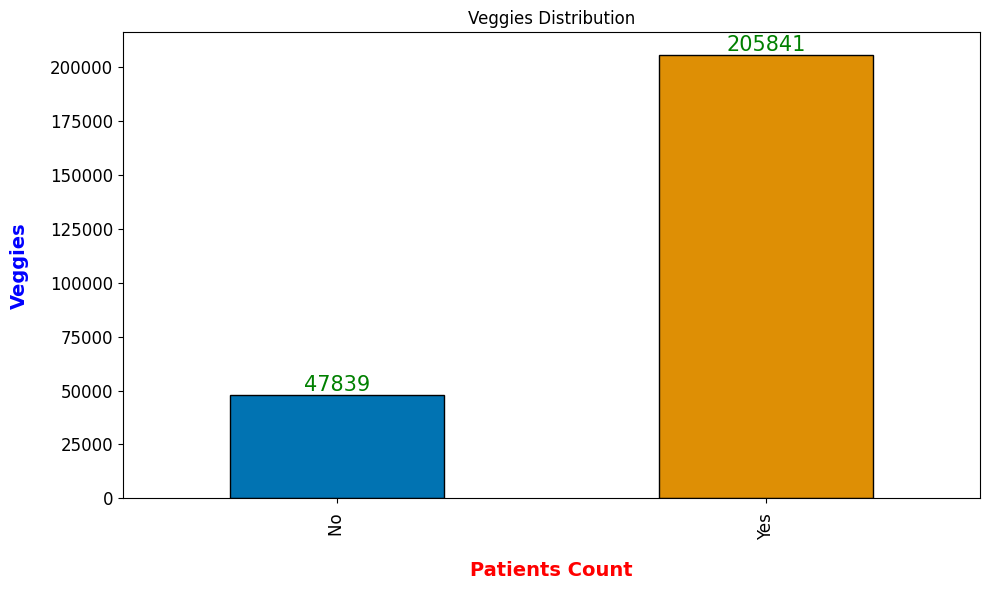

In [143]:
fig = plt.figure(figsize=(10, 6))
label = ["No ","Yes "]
ax = Diabetic_DB['Veggies'].value_counts().sort_index() .plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('Veggies', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Veggies Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

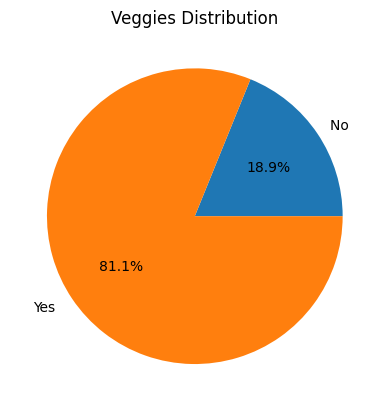

In [144]:
df= Diabetic_DB['Veggies'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("Veggies Distribution")
plt.show()

Bar Plot with respect to Diabetic or healthy

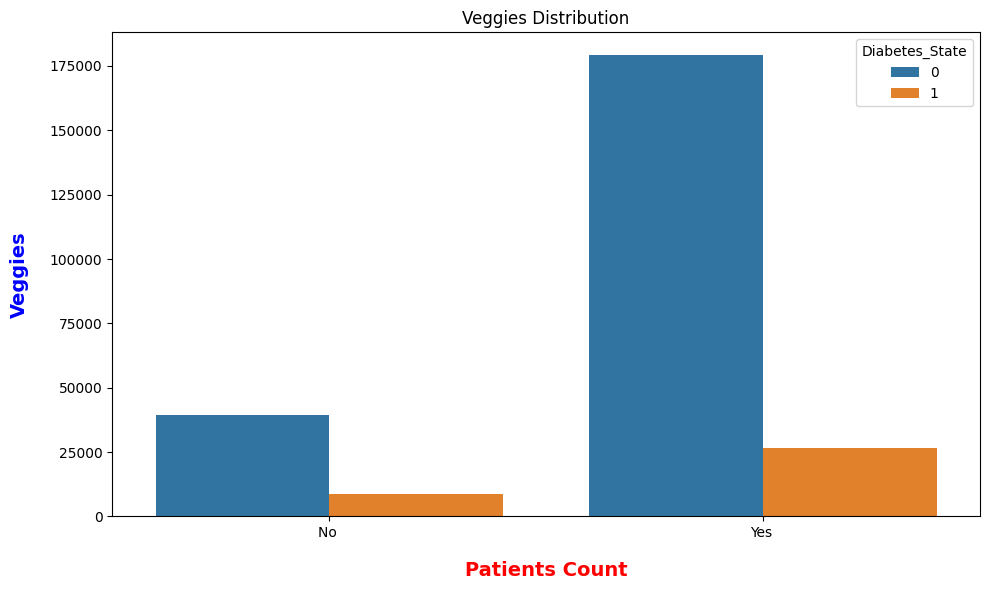

In [145]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Veggies', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='Veggies', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('Veggies', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Veggies Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

Bar Plot with respect to have Heart Disease or healthy

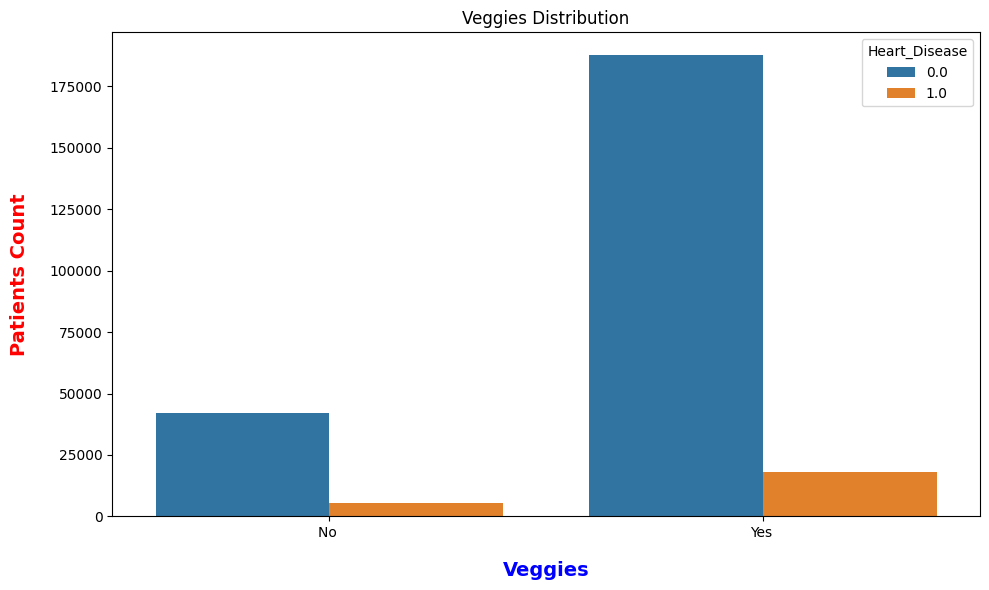

In [146]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['Veggies', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='Veggies', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('Veggies', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('Veggies Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


#### HvyAlcoholConsump (Heavy Alcohol Consumption)
Whether the individual is a heavy drinker (defined as more than 14 drinks per week for men, more than 7 for women).

- 0 = no
- 1 = yes

Bar Chart Stroke

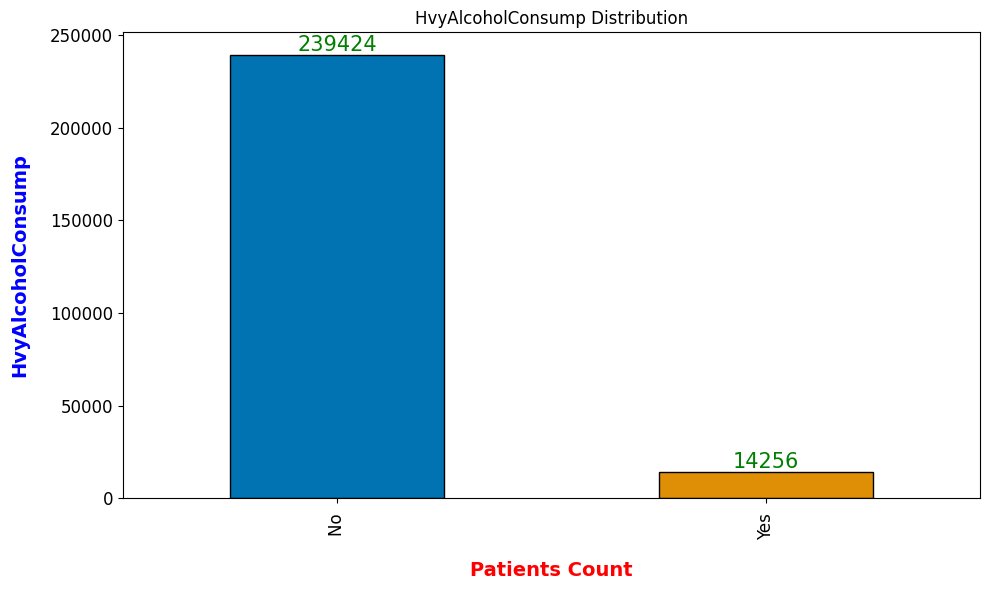

In [147]:
fig = plt.figure(figsize=(10, 6))
label = ["No ","Yes "]
ax = Diabetic_DB['HvyAlcoholConsump'].value_counts().sort_index() .plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('HvyAlcoholConsump', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HvyAlcoholConsump Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

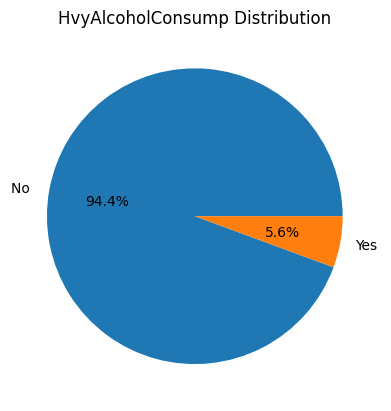

In [148]:
df= Diabetic_DB['HvyAlcoholConsump'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("HvyAlcoholConsump Distribution")
plt.show()

Bar Plot with respect to Diabetic or healthy

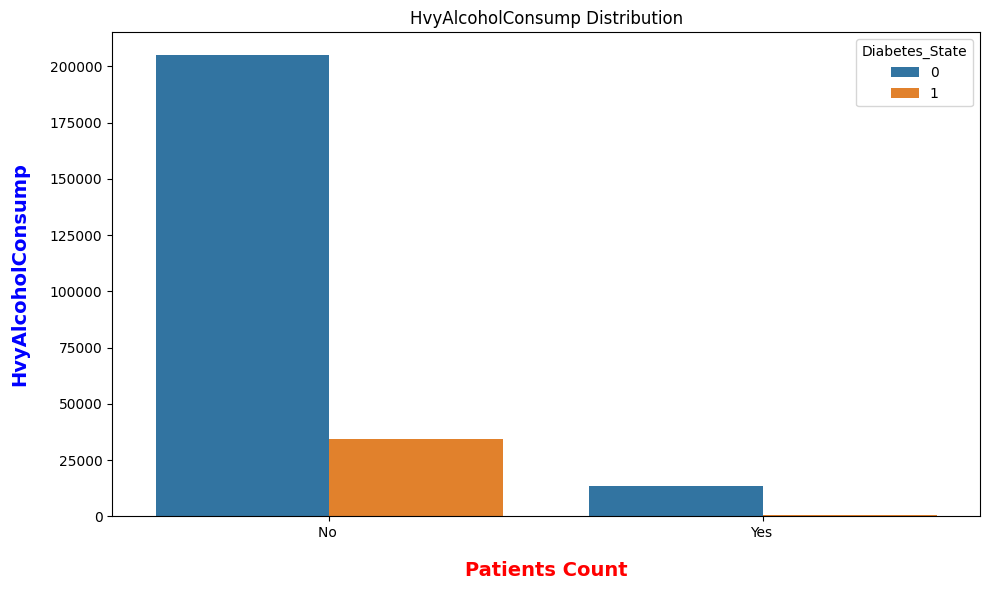

In [149]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['HvyAlcoholConsump', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='HvyAlcoholConsump', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('HvyAlcoholConsump', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HvyAlcoholConsump Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

Bar Plot with respect to have Heart Disease or healthy

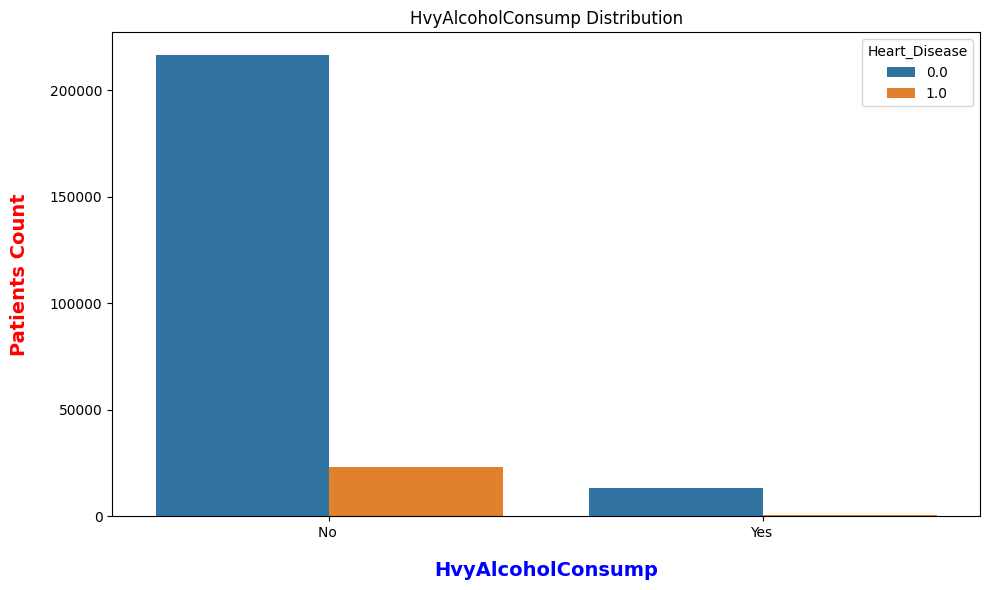

In [150]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['HvyAlcoholConsump', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='HvyAlcoholConsump', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('HvyAlcoholConsump', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('HvyAlcoholConsump Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


#### MentHlth (Mental Health Days)
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?

scale 1-30 days

In [151]:
Diabetic_DB['MentHlth'].describe()

count   253,680.00
mean          3.18
std           7.41
min           0.00
25%           0.00
50%           0.00
75%           2.00
max          30.00
Name: MentHlth, dtype: float64

From This column description

We Noticed that


1.   Nearly more than half of this column is overweight and obese as at 50% BMI = 0 which didn't have mental health problem
2.   Max number is very large which proves that this data has a lot of outlier in it
3.   This prove there is problem in this data




Bar Chart BMI

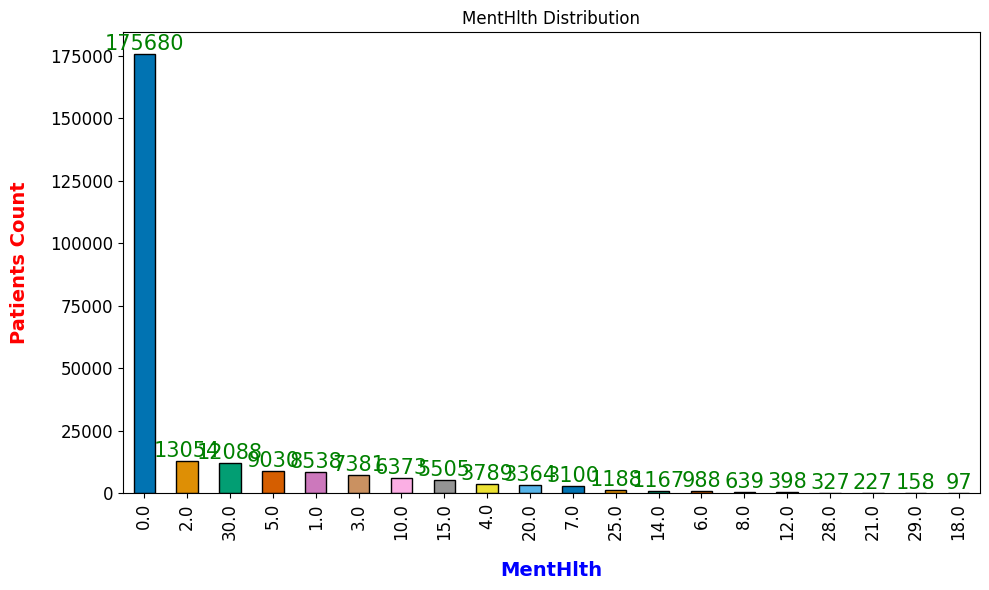

In [152]:
fig = plt.figure(figsize=(10, 6))

ax = Diabetic_DB['MentHlth'].value_counts().head(20).plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(list(Diabetic_DB['MentHlth'].value_counts().head(20).index))
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.xlabel('MentHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')
plt.tight_layout()

plt.show()

Histogram

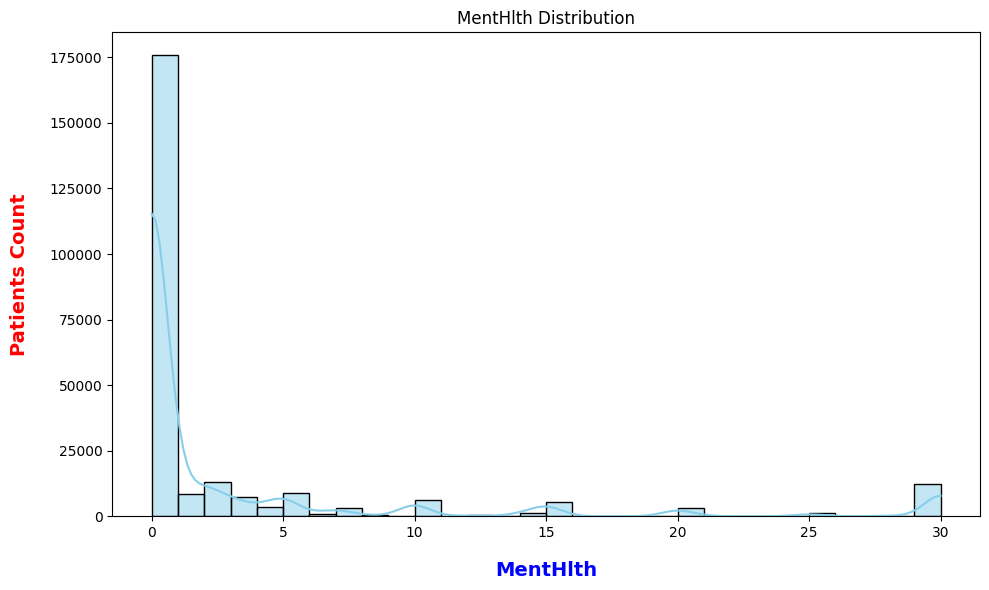

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(Diabetic_DB['MentHlth'], bins=30, kde=True, color='skyblue')
plt.xlabel('MentHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')
plt.tight_layout()
plt.show()


scatter plot

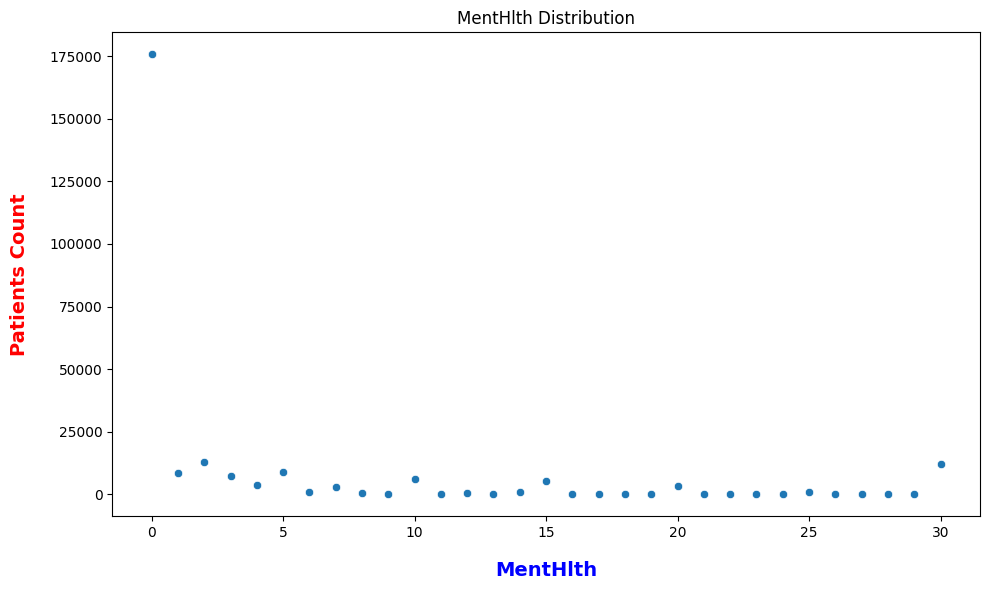

In [154]:
plt.figure(figsize=(10, 6))
df= Diabetic_DB['MentHlth'].value_counts()
sns.scatterplot(df)
plt.xlabel('MentHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')
plt.tight_layout()
plt.show()

Pie Chart (Top 10)

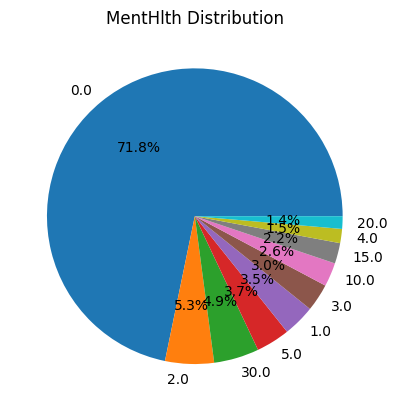

In [155]:
df= Diabetic_DB['MentHlth'].value_counts().head(10)
plt.pie(df.values, labels = df.index, autopct='%1.1f%%')
plt.title("MentHlth Distribution")
plt.show()

Bar Plot with respect to Diabetic or healthy

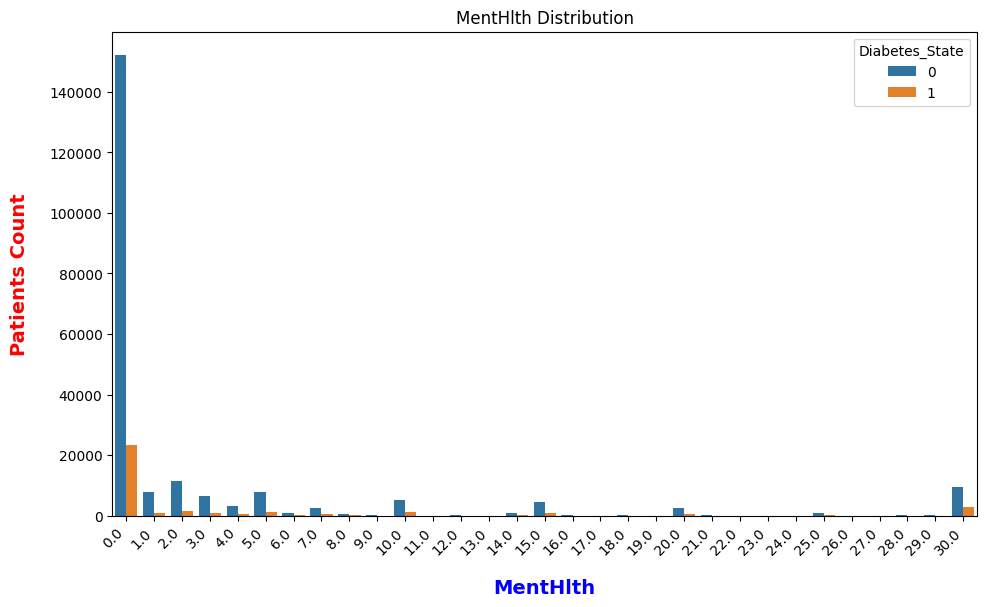

In [156]:

fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['MentHlth', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')

sns.barplot(x='MentHlth', y='count', hue='Diabetes_State', data=ploter)

plt.xlabel('MentHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')

plt.show()

Bar Plot with respect to have Heart Disease or healthy

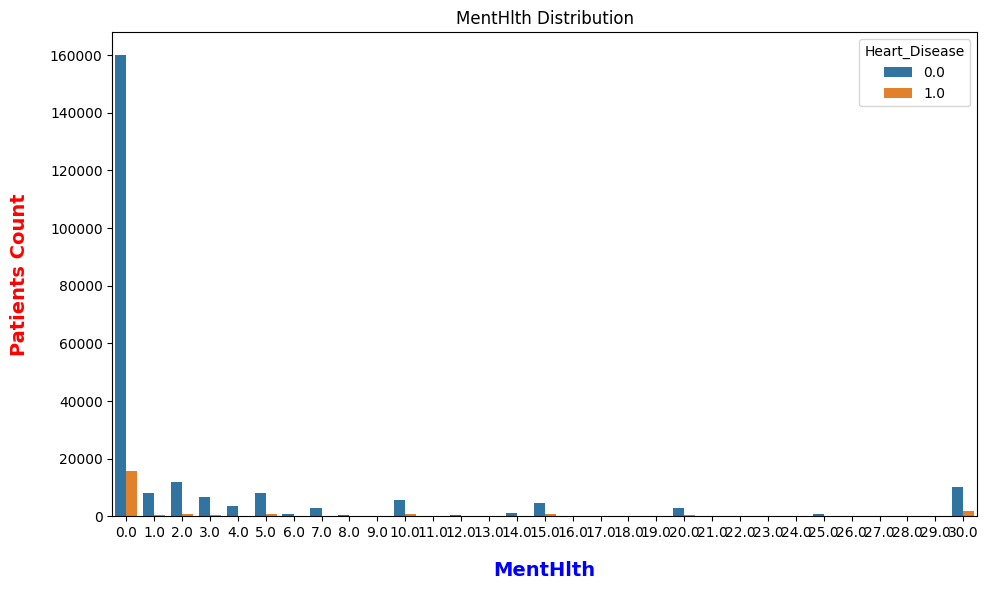

In [157]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['MentHlth', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='MentHlth', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('MentHlth', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')
plt.tight_layout()

plt.show()


#### DiffWalk (Difficulty Walking)
Indicates if the individual has difficulty walking or climbing stairs.
- 0 = no
- 1 = yes

Bar Chart Stroke

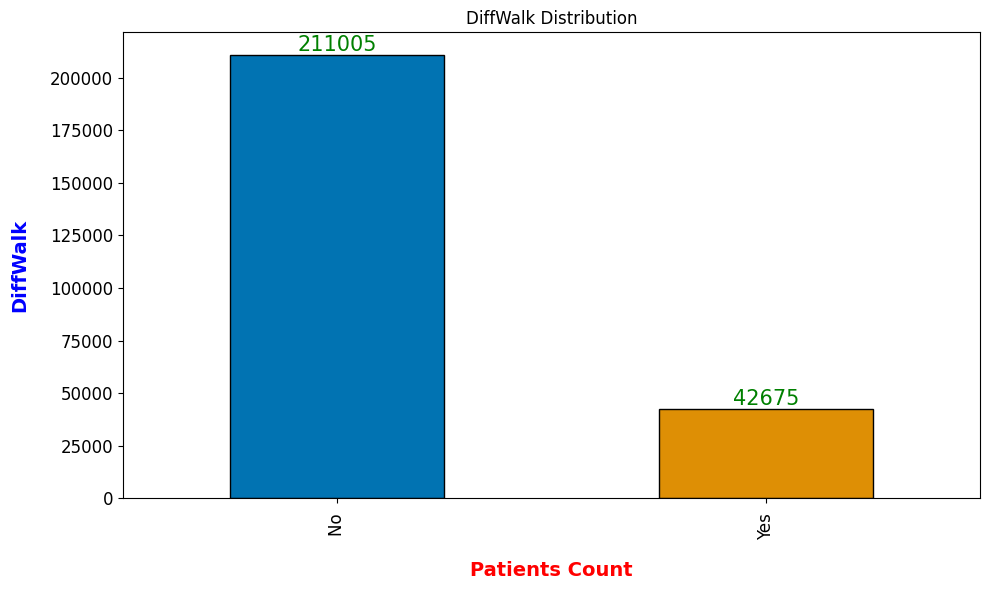

In [158]:
fig = plt.figure(figsize=(10, 6))
label = ["No ","Yes "]
ax = Diabetic_DB['DiffWalk'].value_counts().sort_index() .plot(kind='bar', color=sns.color_palette('colorblind'), edgecolor='black')
ax.set_xticklabels(label)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() +0.25, p.get_height() +0.5),
                ha='center', va='bottom', color='green', size=15)

    ax.tick_params(axis='both', labelsize=12)

plt.ylabel('DiffWalk', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('DiffWalk Distribution')
plt.tight_layout()

plt.show()

Pie Chart Stroke

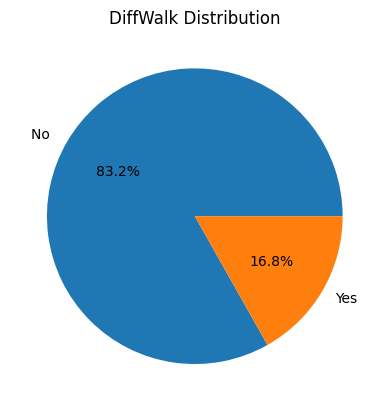

In [159]:
df= Diabetic_DB['DiffWalk'].value_counts().sort_index()
label = ["No ","Yes "]

plt.pie(df.values, labels = label, autopct='%1.1f%%')
plt.title("DiffWalk Distribution")
plt.show()

Bar Plot with respect to Diabetic or healthy

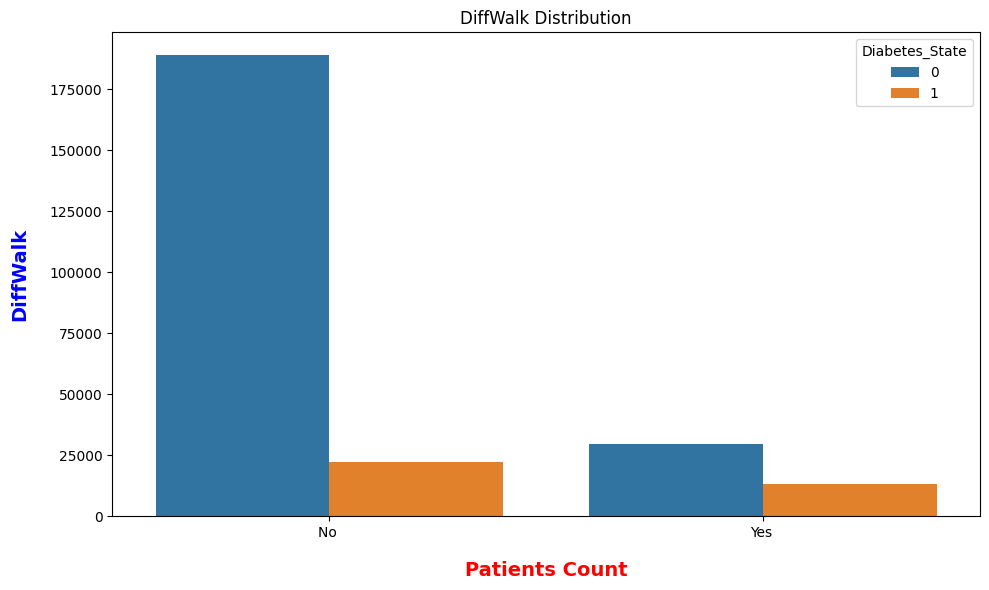

In [160]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['DiffWalk', 'Diabetes_State'])['Diabetes_State'].count().reset_index(name='count')
label = ["No ","Yes "]

sns.barplot(x='DiffWalk', y='count', hue='Diabetes_State', data=ploter)

plt.ylabel('DiffWalk', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.xlabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('DiffWalk Distribution')
plt.tight_layout()

plt.xticks(ticks=[0, 1], labels=label)

plt.show()

Bar Plot with respect to have Heart Disease or healthy

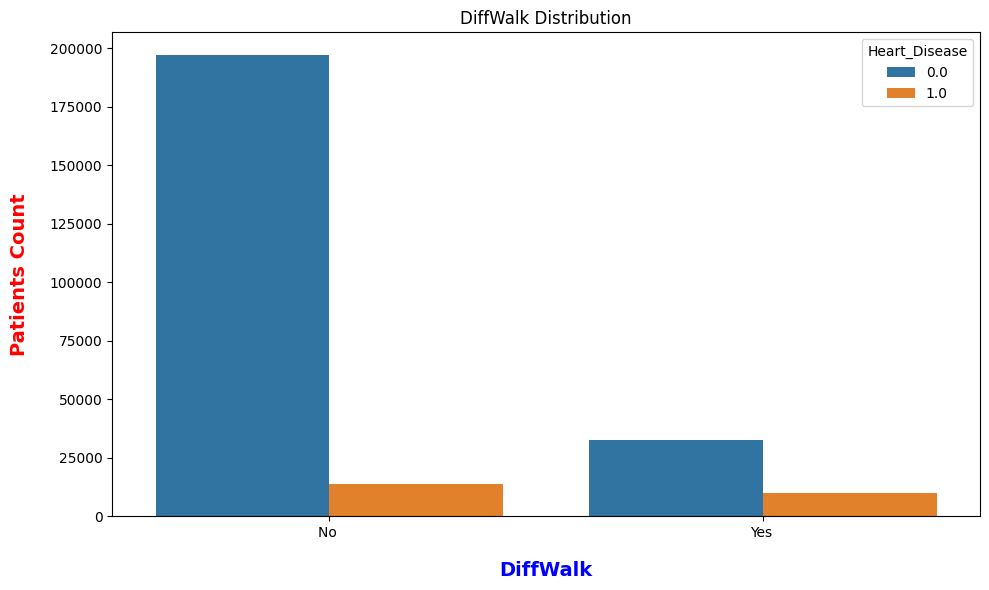

In [161]:
fig = plt.figure(figsize=(10, 6))
ploter = Diabetic_DB.groupby(['DiffWalk', 'Heart_Disease'])['Heart_Disease'].count().reset_index(name='count')

sns.barplot(x='DiffWalk', y='count', hue='Heart_Disease', data=ploter)

plt.xlabel('DiffWalk', fontsize=14, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=14, weight='bold', labelpad=15, color='red')
plt.title('DiffWalk Distribution')
plt.tight_layout()
label = ["No ","Yes "]
plt.xticks(ticks=[0, 1], labels=label)

plt.show()


## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

### Heart Disease DB

#### Plotting for checking and handling outliers

##### Plotting for checking outliers

In [162]:
HeartDisease_DB.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

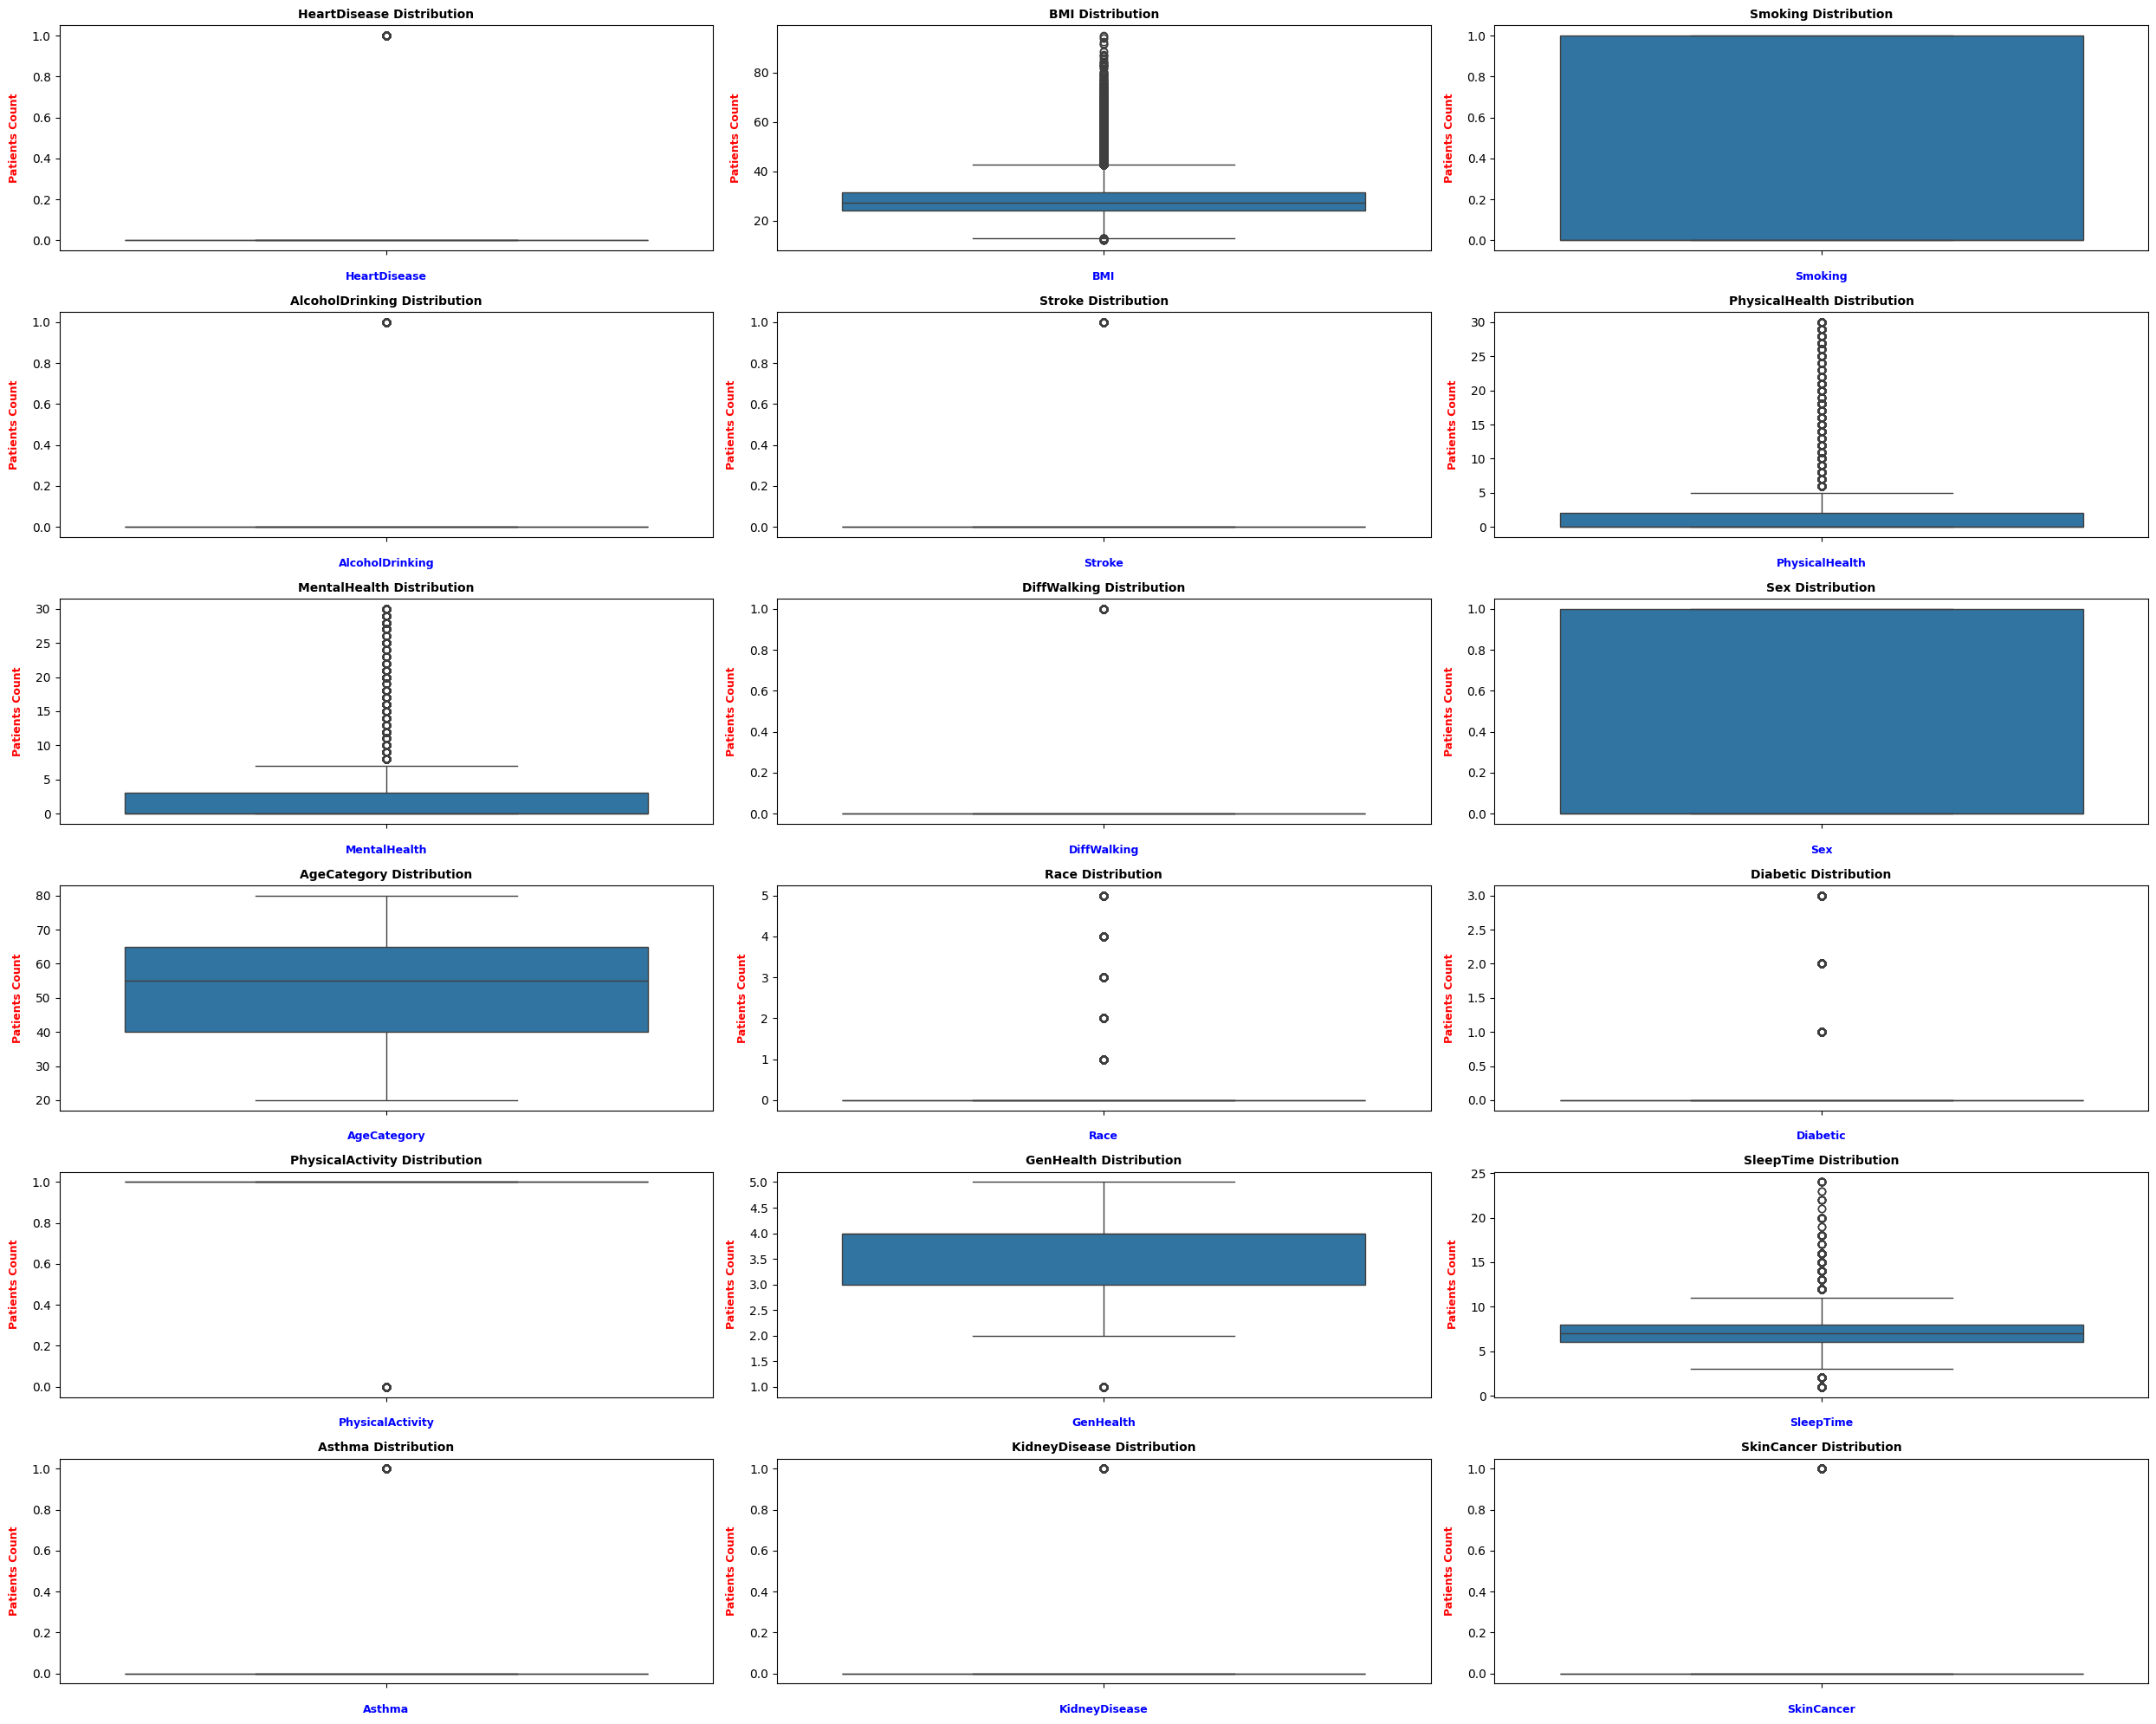

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

# Set up the figure
fig, axes = plt.subplots(6, 3, figsize=(25, 20))
axes = axes.ravel()

# Create box plots
for i, feature in enumerate(features):
    sns.boxplot(y=HeartDisease_DB[feature], ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel('Patients Count', fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} Distribution', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()


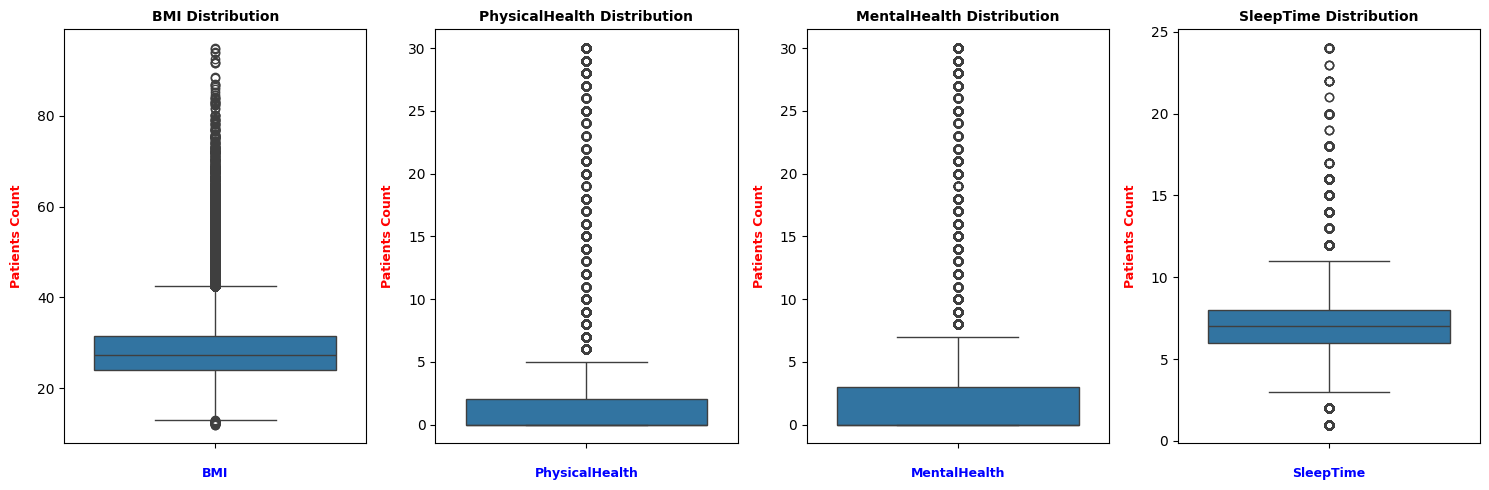

In [164]:
# Define the features to plot
features = [ 'BMI','PhysicalHealth', 'MentalHealth','SleepTime']

# Set up the figure
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes = axes.ravel()

# Create box plots
for i, feature in enumerate(features):
    sns.boxplot(y=HeartDisease_DB[feature], ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel('Patients Count', fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} Distribution', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

##### Plotting for checking outliers wit respect to HeartDisease state

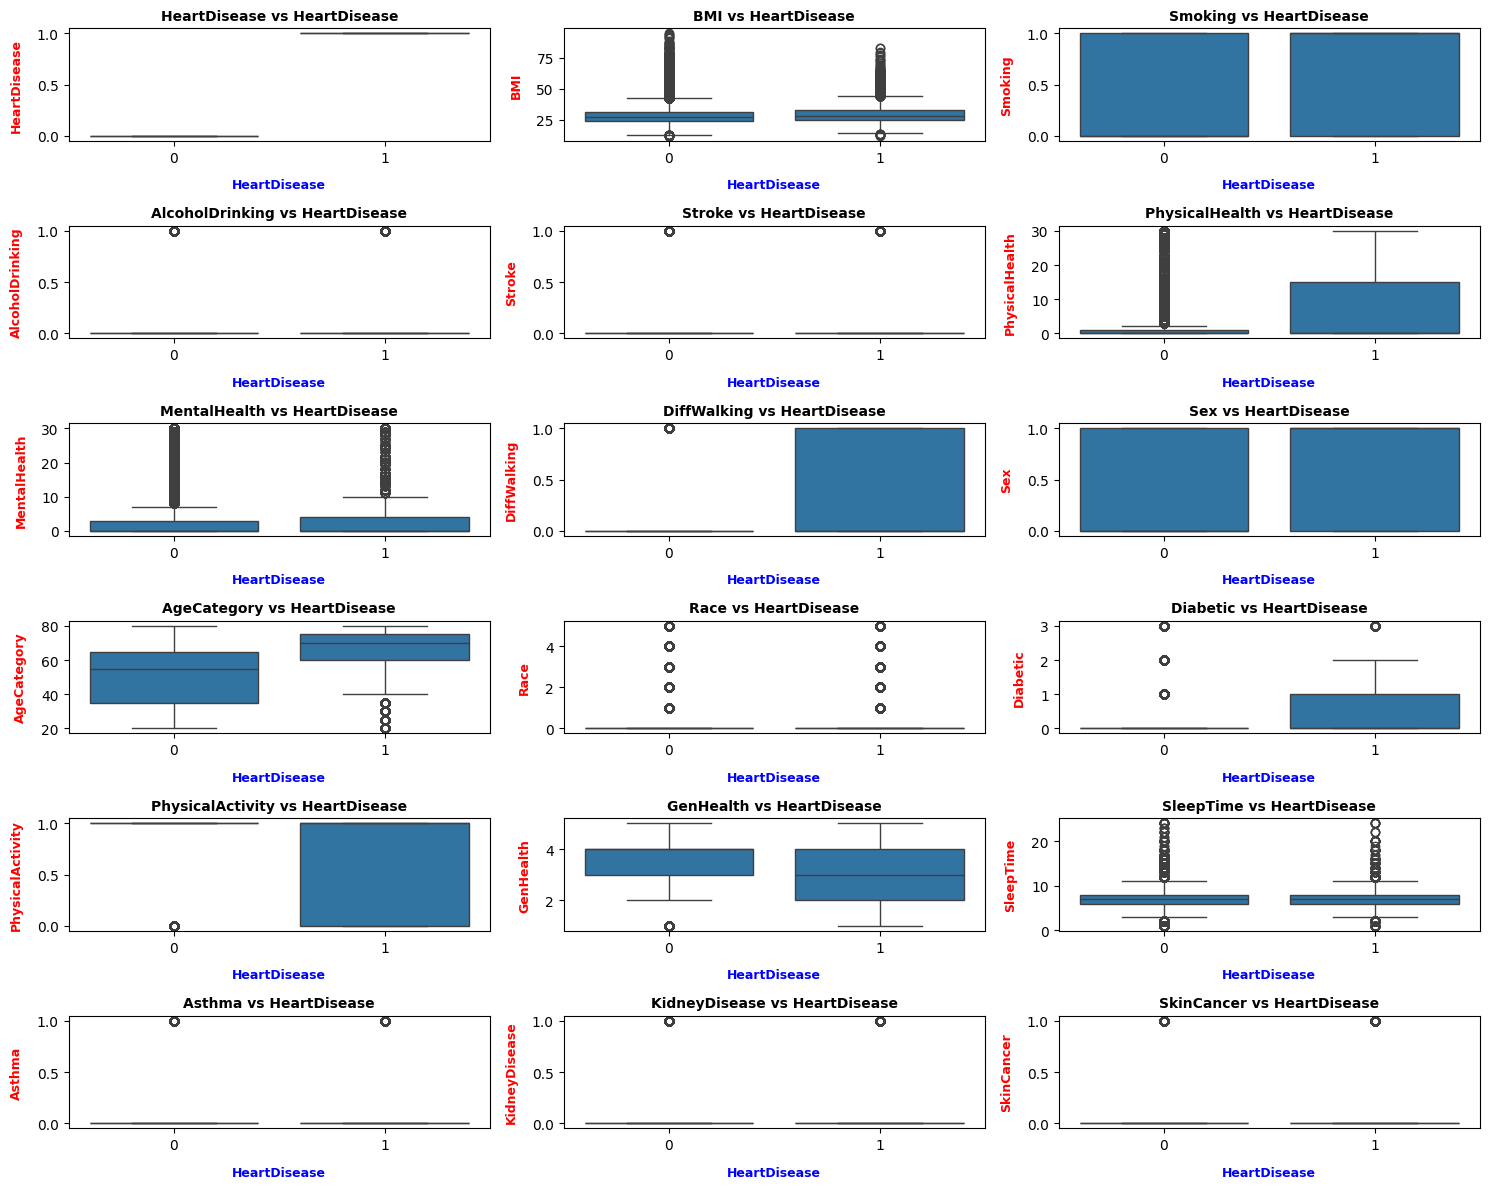

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

# Set up the figure
fig, axes = plt.subplots(6, 3, figsize=(15, 12))
axes = axes.ravel()

# Create box plots with respect to HeartDisease
for i, feature in enumerate(features):
    sns.boxplot(x=HeartDisease_DB['HeartDisease'], y=HeartDisease_DB[feature], ax=axes[i])
    axes[i].set_xlabel('HeartDisease', fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel(feature, fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} vs HeartDisease', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

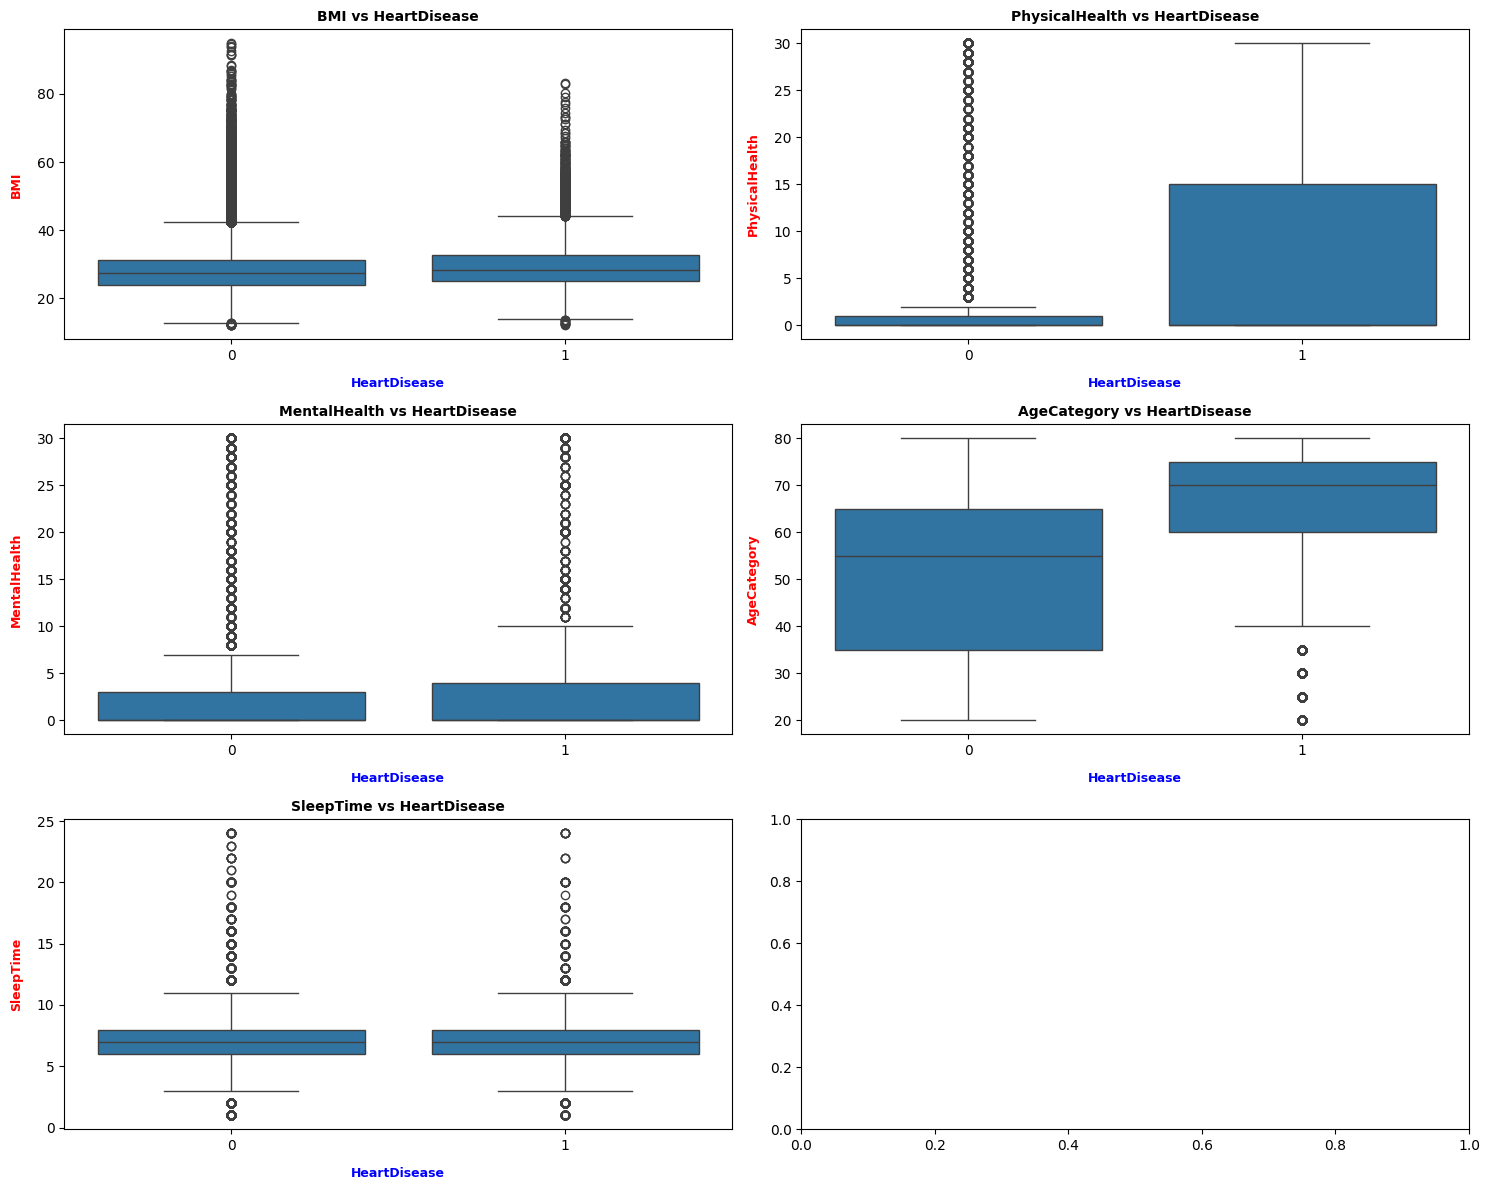

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = [ 'BMI','PhysicalHealth', 'MentalHealth', 'AgeCategory',
        'SleepTime']

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

# Create box plots with respect to HeartDisease
for i, feature in enumerate(features):
    sns.boxplot(x=HeartDisease_DB['HeartDisease'], y=HeartDisease_DB[feature], ax=axes[i])
    axes[i].set_xlabel('HeartDisease', fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel(feature, fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} vs HeartDisease', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

##### Handle outliers


In [167]:
# Function to count outliers using IQR and display their range
def count_outliers_iqr(data):
    outlier_info = {}
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_below = data[column][data[column] < lower_bound]
        outliers_above = data[column][data[column] > upper_bound]

        outlier_info[column] = {
            "count": len(outliers_below) + len(outliers_above),
            "min_outlier": outliers_below.min() if not outliers_below.empty else None,
            "max_outlier": outliers_above.max() if not outliers_above.empty else None,
            "outlier_range": (lower_bound, upper_bound)
        }

    return outlier_info

# Get outlier counts and range
outliers = count_outliers_iqr(HeartDisease_DB)

# Display results
for col, info in outliers.items():
    print(f"{col}: {info['count']} outliers, Min Outlier: {info['min_outlier']}, Max Outlier: {info['max_outlier']}, Outlier Range: {info['outlier_range']}")

HeartDisease: 27373 outliers, Min Outlier: None, Max Outlier: 1, Outlier Range: (np.float64(0.0), np.float64(0.0))
BMI: 10396 outliers, Min Outlier: 12.02, Max Outlier: 94.85, Outlier Range: (np.float64(12.945), np.float64(42.505))
Smoking: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-1.5), np.float64(2.5))
AlcoholDrinking: 21777 outliers, Min Outlier: None, Max Outlier: 1, Outlier Range: (np.float64(0.0), np.float64(0.0))
Stroke: 12069 outliers, Min Outlier: None, Max Outlier: 1, Outlier Range: (np.float64(0.0), np.float64(0.0))
PhysicalHealth: 47146 outliers, Min Outlier: None, Max Outlier: 30, Outlier Range: (np.float64(-3.0), np.float64(5.0))
MentalHealth: 51576 outliers, Min Outlier: None, Max Outlier: 30, Outlier Range: (np.float64(-4.5), np.float64(7.5))
DiffWalking: 44410 outliers, Min Outlier: None, Max Outlier: 1, Outlier Range: (np.float64(0.0), np.float64(0.0))
Sex: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64

In [168]:
# Function to clip outliers for specified columns
def clip_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

# Columns to clip outliers
columns_to_clip = [ 'BMI','PhysicalHealth', 'MentalHealth',
        'SleepTime']
HeartDisease_DB = clip_outliers(HeartDisease_DB, columns_to_clip)


print("Outliers in BMI and PhysHlth columns have been clipped.")


Outliers in BMI and PhysHlth columns have been clipped.


#### Checking for missing values

In [169]:
HeartDisease_DB.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

From the results we found there is no missing values to deal with

#### Checking for duplicates



Checking the amount of duplicates in dataset

In [170]:
print(HeartDisease_DB.duplicated().value_counts())


False    300619
True      19176
Name: count, dtype: int64


Removing the duplicates

In [171]:
HeartDisease_DB = HeartDisease_DB.drop_duplicates()
print(HeartDisease_DB.duplicated().value_counts())


False    300619
Name: count, dtype: int64


Checking the dataset for removing duplicates

In [172]:
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300619 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      300619 non-null  int64  
 1   BMI               300619 non-null  float64
 2   Smoking           300619 non-null  int64  
 3   AlcoholDrinking   300619 non-null  int64  
 4   Stroke            300619 non-null  int64  
 5   PhysicalHealth    300619 non-null  int64  
 6   MentalHealth      300619 non-null  float64
 7   DiffWalking       300619 non-null  int64  
 8   Sex               300619 non-null  int64  
 9   AgeCategory       300619 non-null  int64  
 10  Race              300619 non-null  int64  
 11  Diabetic          300619 non-null  int64  
 12  PhysicalActivity  300619 non-null  int64  
 13  GenHealth         300619 non-null  int64  
 14  SleepTime         300619 non-null  int64  
 15  Asthma            300619 non-null  int64  
 16  KidneyDisease     300619 

### Diabetic DB

#### Plotting for checking and handling outliers

##### import library

In [173]:
# %% Importing required libraries
import pandas as pd  # For handling structured data
pd.options.display.float_format = '{:,.2f}'.format  # Format floating-point numbers

import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualizations

from wordcloud import WordCloud, STOPWORDS  # For generating word clouds
from IPython.display import Image  # For displaying images

import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output


# Define a list of colors for visualizations
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [174]:
Diabetic_DB.columns

Index(['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk'],
      dtype='object')

##### Box plots to check outliers

In [175]:
Diabetic_DB.columns

Index(['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk'],
      dtype='object')

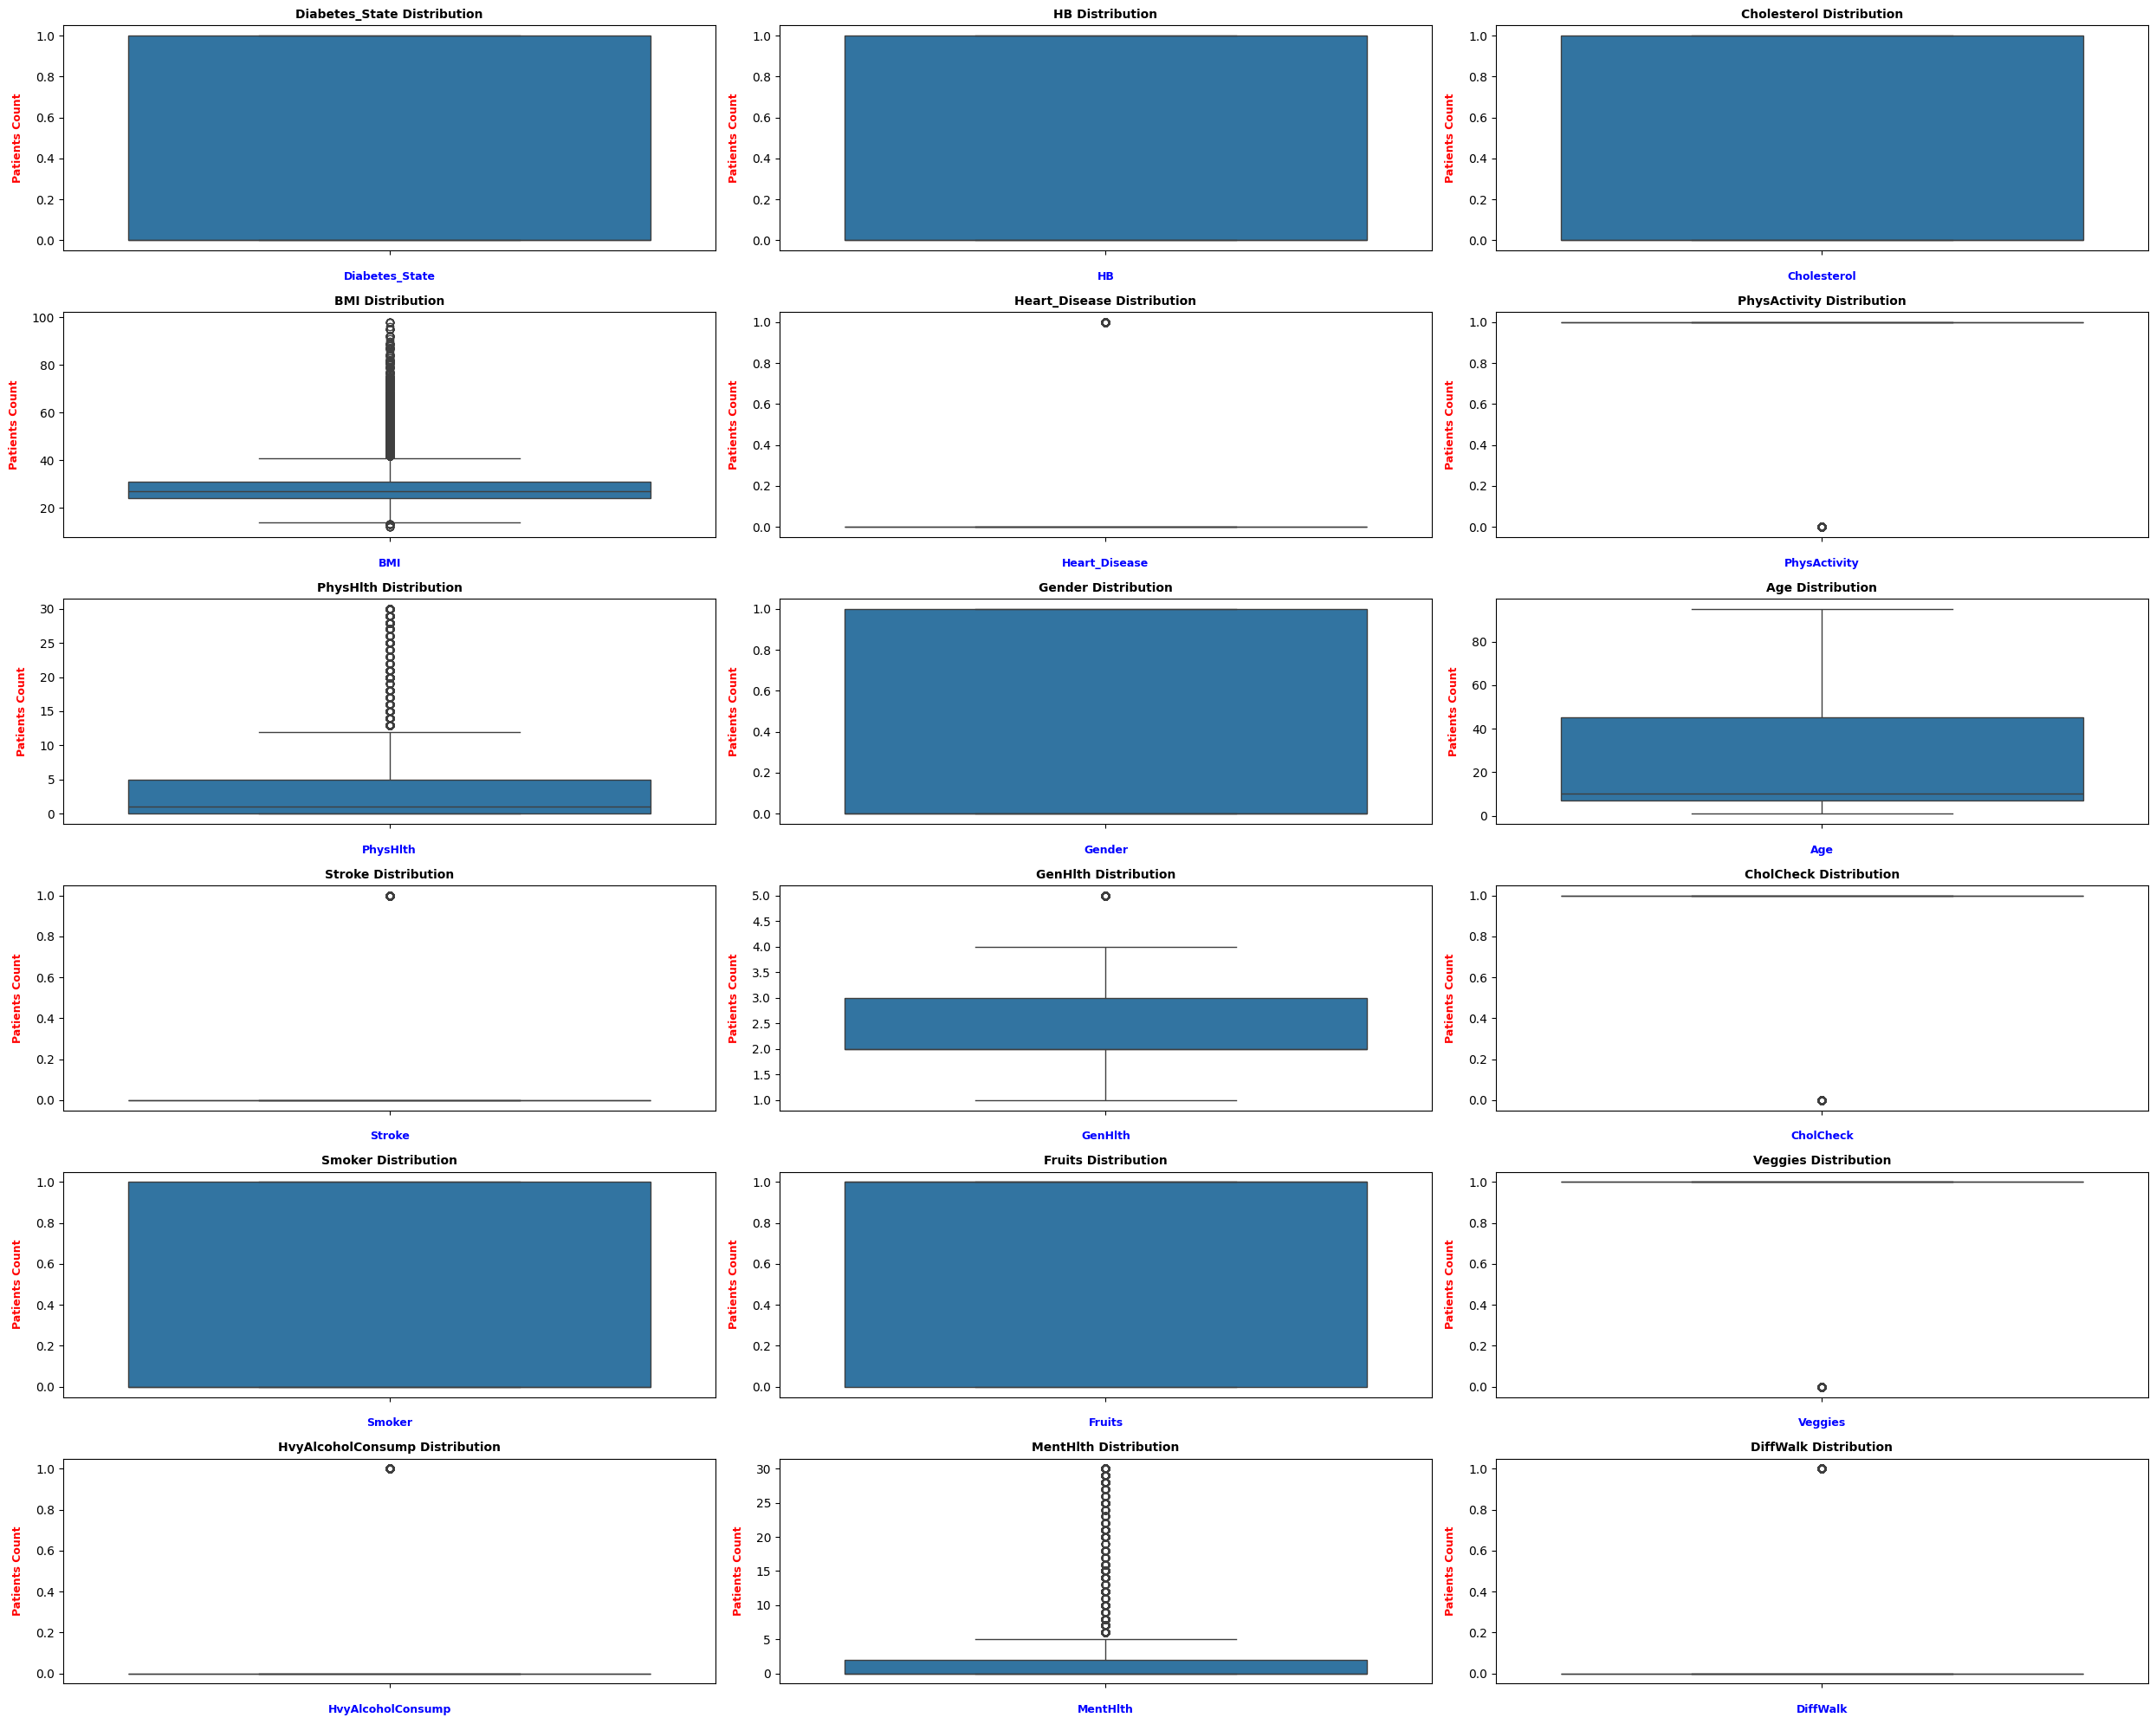

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk']

# Set up the figure
fig, axes = plt.subplots(6, 3, figsize=(25, 20))
axes = axes.ravel()

# Create box plots
for i, feature in enumerate(features):
    sns.boxplot(y=Diabetic_DB[feature], ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel('Patients Count', fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} Distribution', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

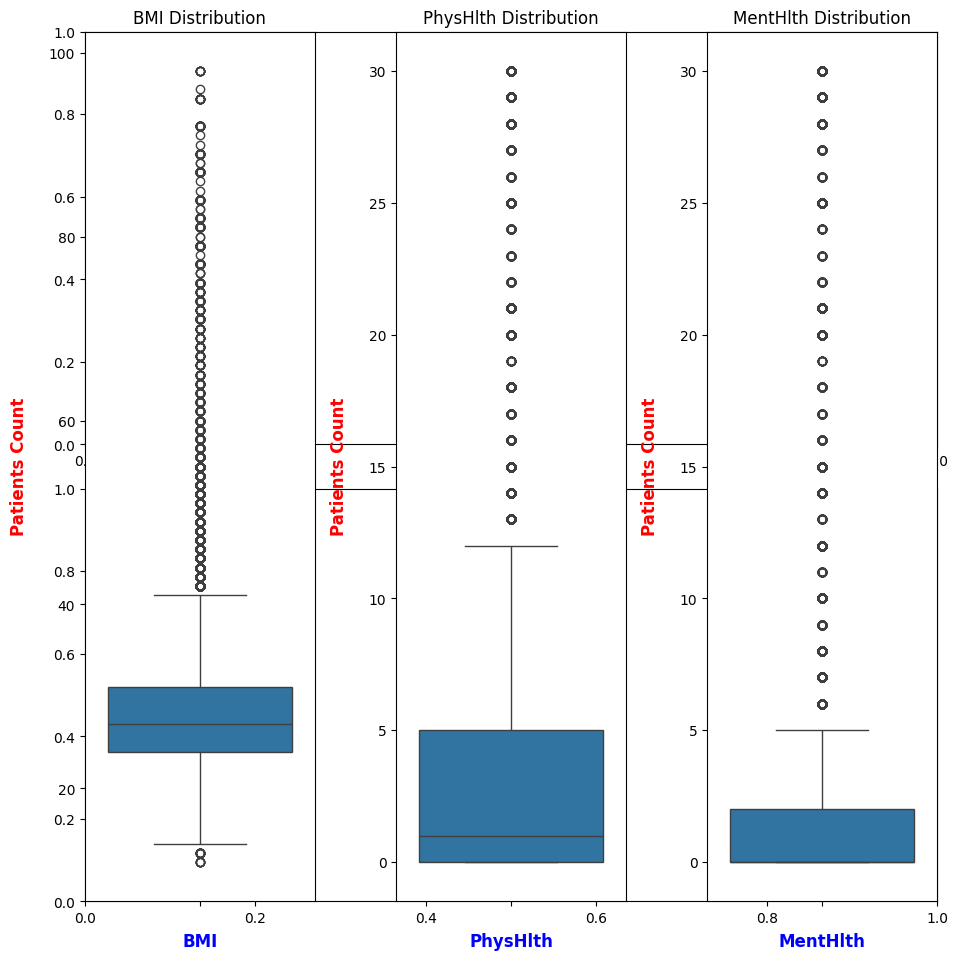

In [177]:
fig = plt.subplots(2,1, figsize=(10, 10))


plt.subplot(1,3, 1)
sns.boxplot(Diabetic_DB['BMI'])
plt.xlabel('BMI', fontsize=12, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=12, weight='bold', labelpad=15, color='red')
plt.title('BMI Distribution')


plt.subplot(1,3, 2)

sns.boxplot(Diabetic_DB['PhysHlth'])
plt.xlabel('PhysHlth', fontsize=12, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=12, weight='bold', labelpad=15, color='red')
plt.title('PhysHlth Distribution')

plt.subplot(1,3, 3)

sns.boxplot(Diabetic_DB['MentHlth'])
plt.xlabel('MentHlth', fontsize=12, weight='bold', labelpad=15, color='blue')
plt.ylabel('Patients Count', fontsize=12, weight='bold', labelpad=15, color='red')
plt.title('MentHlth Distribution')


plt.tight_layout()
plt.show()

For previews box plots

We noticed the following that

1. The columns which as only two values (1,0) divided into 2 shapes
  - the plot is only filled as the cases nearly well destributed between these values so both values are in the box (example: Diabetes_State Distribution and HB Distribution)
  - the second style is most of cases in one value and a very little amount in the second one so the value with little amount of cases consider as outlier but this only two values so we can't neglect this value (example: Stroke Distribution and Heart_Disease Distribution)
2. The columns which is equaly distributed like Age and GenHlth but the GenHlth as the value in 2 and 3 has the most cases so they made 5 away which has the least amount of cases but this plot has only 5 values so we can consider this outlier in calculations
3. The columns BMI and PhysHlth and MentHlth are  most columns that have outliers and this due to:
 - These columns had a certain value that force box to it (in BMI= 27 and in PhysHlth = 0 and in MentHlth = 0) so they control the plot
 - These columns has a large range of values so the nearer to strong point the better
 - Point of fact that some outlier points maybe have man cases can't be neglcted

##### Box plot with respect to diabetes state

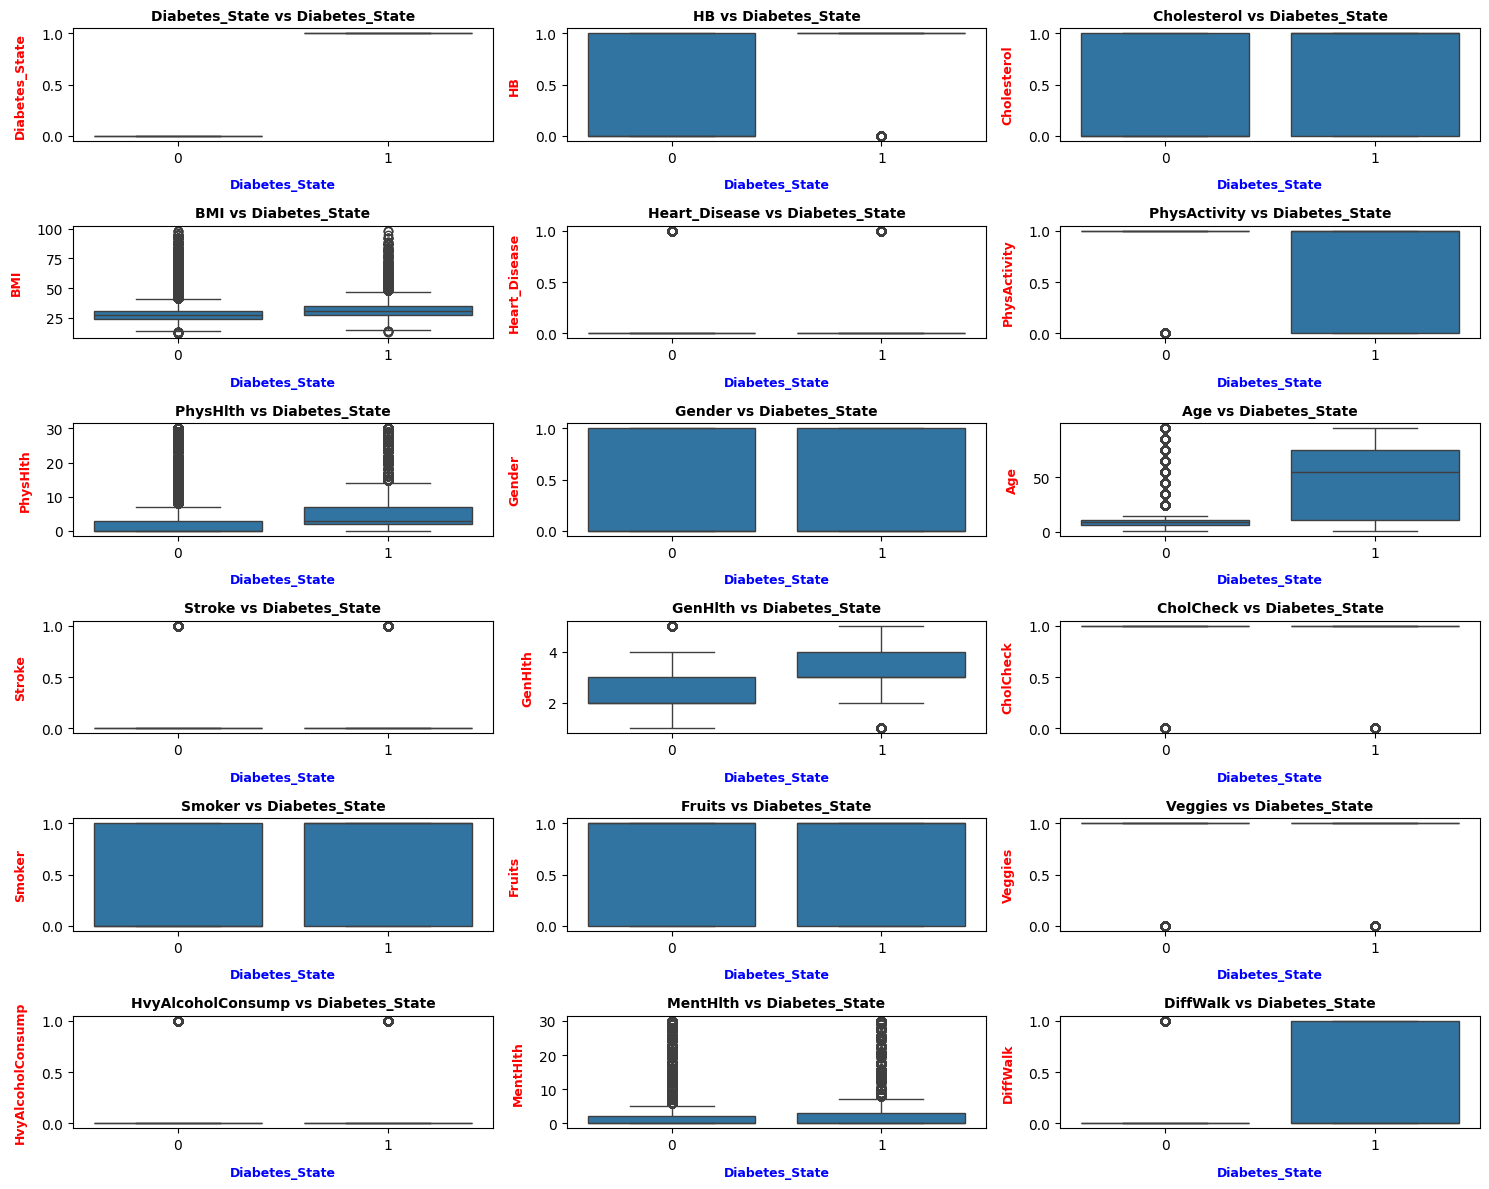

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk']


# Set up the figure
fig, axes = plt.subplots(6, 3, figsize=(15, 12))
axes = axes.ravel()

# Create box plots with respect to HeartDisease
for i, feature in enumerate(features):
    sns.boxplot(x=Diabetic_DB['Diabetes_State'], y=Diabetic_DB[feature], ax=axes[i])
    axes[i].set_xlabel('Diabetes_State', fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel(feature, fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} vs Diabetes_State', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

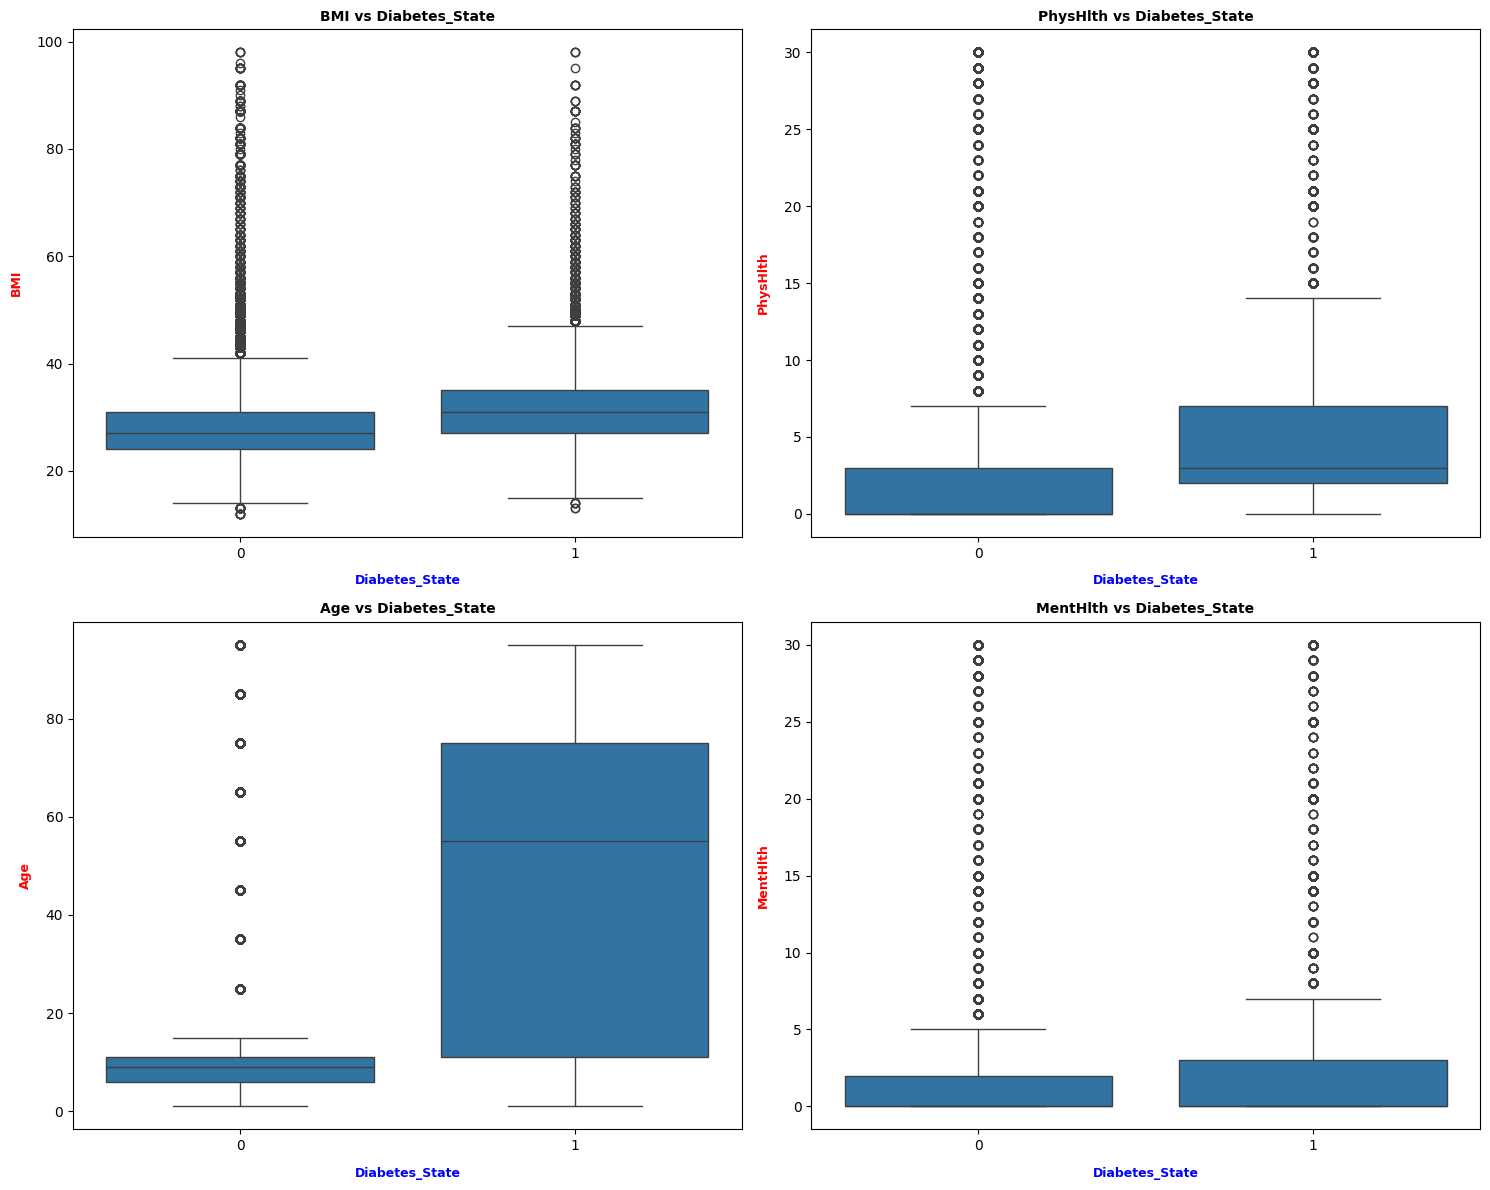

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to plot
features = ['BMI', 'PhysHlth', 'Age','MentHlth']


# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Create box plots with respect to HeartDisease
for i, feature in enumerate(features):
    sns.boxplot(x=Diabetic_DB['Diabetes_State'], y=Diabetic_DB[feature], ax=axes[i])
    axes[i].set_xlabel('Diabetes_State', fontsize=9, weight='bold', labelpad=10, color='blue')
    axes[i].set_ylabel(feature, fontsize=9, weight='bold', labelpad=10, color='red')
    axes[i].set_title(f'{feature} vs Diabetes_State', fontsize=10, weight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

For previews box plots

We noticed the following that

1. The columns which as only two values (1,0) divided into 2 shapes
  - the plot is only filled as the cases nearly well destributed between these values so both values are in the box
  - the second style is most of cases in one value and a very little amount in the second one so the value with little amount of cases consider as outlier but this only two values so we can't neglect this value
2. The columns which is equaly distributed like Age Diabetic and GenHlth but the GenHlth as the value in 2 and 3 has the most cases so they made 5 away which has the least amount of cases but this plot has only 5 values so we can consider this outlier in calculations
3. The columns BMI (both cases) and PhysHlth (both cases) and Age Healthy are  most columns that have outliers and this due to:
 - These columns had a certain value that force box to it (for example in BMI= 27 and in PhysHlth = 0 and in Age = 10) so they control the plot
 - These columns has a large range of values so the nearer to strong point the better
 - Point of fact that some outlier points maybe have man cases can't be neglcted

---





##### Handle outliers


In [180]:
# Function to count outliers using IQR and display their range
def count_outliers_iqr(data):
    outlier_info = {}
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_below = data[column][data[column] < lower_bound]
        outliers_above = data[column][data[column] > upper_bound]

        outlier_info[column] = {
            "count": len(outliers_below) + len(outliers_above),
            "min_outlier": outliers_below.min() if not outliers_below.empty else None,
            "max_outlier": outliers_above.max() if not outliers_above.empty else None,
            "outlier_range": (lower_bound, upper_bound)
        }

    return outlier_info

# Get outlier counts and range
outliers = count_outliers_iqr(Diabetic_DB)

# Display results
for col, info in outliers.items():
    print(f"{col}: {info['count']} outliers, Min Outlier: {info['min_outlier']}, Max Outlier: {info['max_outlier']}, Outlier Range: {info['outlier_range']}")

Diabetes_State: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-1.5), np.float64(2.5))
HB: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-1.5), np.float64(2.5))
Cholesterol: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-1.5), np.float64(2.5))
BMI: 9847 outliers, Min Outlier: 12.0, Max Outlier: 98.0, Outlier Range: (np.float64(13.5), np.float64(41.5))
Heart_Disease: 23893 outliers, Min Outlier: None, Max Outlier: 1.0, Outlier Range: (np.float64(0.0), np.float64(0.0))
PhysActivity: 61760 outliers, Min Outlier: 0.0, Max Outlier: None, Outlier Range: (np.float64(1.0), np.float64(1.0))
PhysHlth: 35980 outliers, Min Outlier: None, Max Outlier: 30, Outlier Range: (np.float64(-7.5), np.float64(12.5))
Gender: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-1.5), np.float64(2.5))
Age: 0 outliers, Min Outlier: None, Max Outlier: None, Outlier Range: (np.float64(-50.0), np.flo

In [181]:
# Function to clip outliers for specified columns
def clip_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

# Columns to clip outliers
columns_to_clip = ["BMI", "PhysHlth",'MentHlth']
Diabetic_DB = clip_outliers(Diabetic_DB, columns_to_clip)


print("Outliers in BMI and PhysHlth columns have been clipped.")


Outliers in BMI and PhysHlth columns have been clipped.


#### Handling missing values

Checking the dataset before changes

In [182]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 253680 non-null  float64
 2   Cholesterol        253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Heart_Disease      253680 non-null  float64
 5   PhysActivity       253680 non-null  float64
 6   PhysHlth           355446 non-null  float64
 7   Gender             355443 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             253680 non-null  float64
 10  GenHlth            253680 non-null  float64
 11  CholCheck          253680 non-null  float64
 12  Smoker             253680 non-null  float64
 13  Fruits             253680 non-null  float64
 14  Veggies            253680 non-null  float64
 15  HvyAlcoholConsump  253680 non-null  float64
 16  Me

Checking the amount of null cells in each columns

In [183]:
Diabetic_DB.isnull().sum()

Diabetes_State            0
HB                   101766
Cholesterol          101766
BMI                  101766
Heart_Disease        101766
PhysActivity         101766
PhysHlth                  0
Gender                    3
Age                       0
Stroke               101766
GenHlth              101766
CholCheck            101766
Smoker               101766
Fruits               101766
Veggies              101766
HvyAlcoholConsump    101766
MentHlth             101766
DiffWalk             101766
dtype: int64

showing the dataset description before filling the empty cells

In [184]:
Diabetic_DB.describe()

Diabetes_State         HB  Cholesterol        BMI  Heart_Disease  \
count      355,446.00 253,680.00   253,680.00 253,680.00     253,680.00   
mean             0.32       0.43         0.42      28.11           0.09   
std              0.47       0.49         0.49       5.56           0.29   
min              0.00       0.00         0.00      13.50           0.00   
25%              0.00       0.00         0.00      24.00           0.00   
50%              0.00       0.00         0.00      27.00           0.00   
75%              1.00       1.00         1.00      31.00           0.00   
max              1.00       1.00         1.00      41.50           1.00   

       PhysActivity   PhysHlth     Gender        Age     Stroke    GenHlth  \
count    253,680.00 355,446.00 355,443.00 355,446.00 253,680.00 253,680.00   
mean           0.76       3.10       0.45      24.62       0.04       2.51   
std            0.43       4.13       0.50      27.66       0.20       1.07   
min            0.00       0.00       0.00       1.00       0.00       1.00   
25%            1.00       0.00       0.00       7.00       0.00       2.00   
50%            1.00       1.00       0.00      10.00       0.00       2.00   
75%            1.00       5.00       1.00      45.00       0.00       3.00   
max            1.00      12.50       1.00      95.00       1.00       5.00   

       CholCheck     Smoker     Fruits    Veggies  HvyAlcoholConsump  \
count 253,680.00 253,680.00 253,680.00 253,680.00         253,680.00   
mean        0.96       0.44       0.63       0.81               0.06   
std         0.19       0.50       0.48       0.39               0.23   
min         0.00       0.00       0.00       0.00               0.00   
25%         1.00       0.00       0.00       1.00               0.00   
50%         1.00       0.00       1.00       1.00               0.00   
75%         1.00       1.00       1.00       1.00               0.00   
max         1.00       1.00       1.00       1.00               1.00   

        MentHlth   DiffWalk  
count 253,680.00 253,680.00  
mean        1.18       0.17  
std         1.95       0.37  
min         0.00       0.00  
25%         0.00       0.00  
50%         0.00       0.00  
75%         2.00       0.00  
max         5.00       1.00

Fill all empty cells with random integer values in the range max and min for its column then the filled dataset description

In [185]:
import numpy as np
df = Diabetic_DB

# Set the random seed for reproducibility
np.random.seed(0)

# Fill empty cells with random integer values within column min-max range
for column in df.select_dtypes(include=[np.number]).columns:
    min_val = df[column].min()
    max_val = df[column].max()

    # Generate random values for missing data
    df[column] = df[column].apply(lambda x: np.random.randint(min_val, max_val + 1) if pd.isnull(x) else x)
df.describe()


Diabetes_State         HB  Cholesterol        BMI  Heart_Disease  \
count      355,446.00 355,446.00   355,446.00 355,446.00     355,446.00   
mean             0.32       0.45         0.45      27.79           0.21   
std              0.47       0.50         0.50       6.50           0.41   
min              0.00       0.00         0.00      13.00           0.00   
25%              0.00       0.00         0.00      23.00           0.00   
50%              0.00       0.00         0.00      27.00           0.00   
75%              1.00       1.00         1.00      32.00           0.00   
max              1.00       1.00         1.00      41.50           1.00   

       PhysActivity   PhysHlth     Gender        Age     Stroke    GenHlth  \
count    355,446.00 355,446.00 355,446.00 355,446.00 355,446.00 355,446.00   
mean           0.68       3.10       0.45      24.62       0.17       2.65   
std            0.47       4.13       0.50      27.66       0.38       1.20   
min            0.00       0.00       0.00       1.00       0.00       1.00   
25%            0.00       0.00       0.00       7.00       0.00       2.00   
50%            1.00       1.00       0.00      10.00       0.00       3.00   
75%            1.00       5.00       1.00      45.00       0.00       3.00   
max            1.00      12.50       1.00      95.00       1.00       5.00   

       CholCheck     Smoker     Fruits    Veggies  HvyAlcoholConsump  \
count 355,446.00 355,446.00 355,446.00 355,446.00         355,446.00   
mean        0.83       0.46       0.60       0.72               0.18   
std         0.38       0.50       0.49       0.45               0.39   
min         0.00       0.00       0.00       0.00               0.00   
25%         1.00       0.00       0.00       0.00               0.00   
50%         1.00       0.00       1.00       1.00               0.00   
75%         1.00       1.00       1.00       1.00               0.00   
max         1.00       1.00       1.00       1.00               1.00   

        MentHlth   DiffWalk  
count 355,446.00 355,446.00  
mean        1.55       0.26  
std         1.98       0.44  
min         0.00       0.00  
25%         0.00       0.00  
50%         0.00       0.00  
75%         3.00       1.00  
max         5.00       1.00

checking the empty spaces after filling

In [186]:
df.isnull().sum()

Diabetes_State       0
HB                   0
Cholesterol          0
BMI                  0
Heart_Disease        0
PhysActivity         0
PhysHlth             0
Gender               0
Age                  0
Stroke               0
GenHlth              0
CholCheck            0
Smoker               0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
MentHlth             0
DiffWalk             0
dtype: int64

showing the information after filling

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes_State     355446 non-null  int64  
 1   HB                 355446 non-null  float64
 2   Cholesterol        355446 non-null  float64
 3   BMI                355446 non-null  float64
 4   Heart_Disease      355446 non-null  float64
 5   PhysActivity       355446 non-null  float64
 6   PhysHlth           355446 non-null  float64
 7   Gender             355446 non-null  float64
 8   Age                355446 non-null  int64  
 9   Stroke             355446 non-null  float64
 10  GenHlth            355446 non-null  float64
 11  CholCheck          355446 non-null  float64
 12  Smoker             355446 non-null  float64
 13  Fruits             355446 non-null  float64
 14  Veggies            355446 non-null  float64
 15  HvyAlcoholConsump  355446 non-null  float64
 16  Me

Turn all columns into integer type

In [188]:
# Convert all numeric columns to integer type
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].astype(int)

put the filled table in the data type

In [189]:
Diabetic_DB = df
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Diabetes_State     355446 non-null  int64
 1   HB                 355446 non-null  int64
 2   Cholesterol        355446 non-null  int64
 3   BMI                355446 non-null  int64
 4   Heart_Disease      355446 non-null  int64
 5   PhysActivity       355446 non-null  int64
 6   PhysHlth           355446 non-null  int64
 7   Gender             355446 non-null  int64
 8   Age                355446 non-null  int64
 9   Stroke             355446 non-null  int64
 10  GenHlth            355446 non-null  int64
 11  CholCheck          355446 non-null  int64
 12  Smoker             355446 non-null  int64
 13  Fruits             355446 non-null  int64
 14  Veggies            355446 non-null  int64
 15  HvyAlcoholConsump  355446 non-null  int64
 16  MentHlth           355446 non-null  in

####  Handling duplicates values

Checking the dataset before editing

In [190]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355446 entries, 0 to 355445
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Diabetes_State     355446 non-null  int64
 1   HB                 355446 non-null  int64
 2   Cholesterol        355446 non-null  int64
 3   BMI                355446 non-null  int64
 4   Heart_Disease      355446 non-null  int64
 5   PhysActivity       355446 non-null  int64
 6   PhysHlth           355446 non-null  int64
 7   Gender             355446 non-null  int64
 8   Age                355446 non-null  int64
 9   Stroke             355446 non-null  int64
 10  GenHlth            355446 non-null  int64
 11  CholCheck          355446 non-null  int64
 12  Smoker             355446 non-null  int64
 13  Fruits             355446 non-null  int64
 14  Veggies            355446 non-null  int64
 15  HvyAlcoholConsump  355446 non-null  int64
 16  MentHlth           355446 non-null  in

Checking for duplicates


In [191]:
print(Diabetic_DB.duplicated().value_counts())


False    286170
True      69276
Name: count, dtype: int64


Removing the duplicates


In [192]:
Diabetic_DB = Diabetic_DB.drop_duplicates()
print(Diabetic_DB.duplicated().value_counts())

False    286170
Name: count, dtype: int64


## Backup data (store and load) After all changes in the end of Milestone 1

Saving Files and loading files from google drive


#### Diabetes

This code for saving the Diabetic database last version as csv file on google drive as protection


In [193]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming Diabetic_DB is your DataFrame
Diabetic_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Mil1.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
Diabetic_DB.to_csv('data/Diabetic_DB_Mil1.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [195]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Diabetic_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Mil1.csv')
Diabetic_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Diabetes_State  HB  Cholesterol  BMI  Heart_Disease  PhysActivity  \
0               0   1            1   40              0             0   
1               0   0            0   25              0             1   
2               0   1            1   28              0             0   
3               0   1            0   27              0             1   
4               0   1            1   24              0             1   

   PhysHlth  Gender  Age  Stroke  GenHlth  CholCheck  Smoker  Fruits  Veggies  \
0        12       0    9       0        5          1       1       0        1   
1         0       0    7       0        3          0       1       0        0   
2        12       0    9       0        5          1       0       1        0   
3         0       0   11       0        2          1       0       1        1   
4         0       0   11       0        2          1       0       1        1   

   HvyAlcoholConsump  MentHlth  DiffWalk  
0                  0         5         1  
1                  0         0         0  
2                  0         5         1  
3                  0         0         0  
4                  0         3         0

In [196]:
import pandas as pd
Diabetic_DB = pd.read_csv('data/Diabetic_DB_Mil1.csv')

In [197]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286170 entries, 0 to 286169
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Diabetes_State     286170 non-null  int64
 1   HB                 286170 non-null  int64
 2   Cholesterol        286170 non-null  int64
 3   BMI                286170 non-null  int64
 4   Heart_Disease      286170 non-null  int64
 5   PhysActivity       286170 non-null  int64
 6   PhysHlth           286170 non-null  int64
 7   Gender             286170 non-null  int64
 8   Age                286170 non-null  int64
 9   Stroke             286170 non-null  int64
 10  GenHlth            286170 non-null  int64
 11  CholCheck          286170 non-null  int64
 12  Smoker             286170 non-null  int64
 13  Fruits             286170 non-null  int64
 14  Veggies            286170 non-null  int64
 15  HvyAlcoholConsump  286170 non-null  int64
 16  MentHlth           286170 non-null  in

#### Heart Disease

This code for saving the Heart disease database last version as csv file on google drive as protection




In [198]:

from google.colab import drive
drive.mount('/content/drive')

# Assuming HeartDisease_DB is your DataFrame
HeartDisease_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB_Mil1.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
HeartDisease_DB.to_csv('data/HeartDisease_DB_Mil1.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [200]:

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

HeartDisease_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB_Mil1.csv')
HeartDisease_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0 16.60        1                0       0               3   
1             0 20.34        0                0       1               0   
2             0 26.58        1                0       0               5   
3             0 24.21        0                0       0               0   
4             0 23.71        0                0       0               5   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          7.50            0    0           55     0         1   
1          0.00            0    0           80     0         0   
2          7.50            0    1           65     0         1   
3          0.00            0    0           75     0         0   
4          0.00            1    0           40     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          2          8       1              0           0  
3                 0          3          6       0              0           1  
4                 1          4          8       0              0           0

In [201]:
HeartDisease_DB = pd.read_csv('data/HeartDisease_DB_Mil1.csv')

In [202]:
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300619 entries, 0 to 300618
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      300619 non-null  int64  
 1   BMI               300619 non-null  float64
 2   Smoking           300619 non-null  int64  
 3   AlcoholDrinking   300619 non-null  int64  
 4   Stroke            300619 non-null  int64  
 5   PhysicalHealth    300619 non-null  int64  
 6   MentalHealth      300619 non-null  float64
 7   DiffWalking       300619 non-null  int64  
 8   Sex               300619 non-null  int64  
 9   AgeCategory       300619 non-null  int64  
 10  Race              300619 non-null  int64  
 11  Diabetic          300619 non-null  int64  
 12  PhysicalActivity  300619 non-null  int64  
 13  GenHealth         300619 non-null  int64  
 14  SleepTime         300619 non-null  int64  
 15  Asthma            300619 non-null  int64  
 16  KidneyDisease     30

# Milestone 2: Advanced Data Analysis and Feature Engineering


## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

**Statistical Tests Plan:**
- T-test: Compare means between two groups.
- ANOVA: Compare means across multiple groups.
- Chi-Squared Test: Test independence between categorical variables.

In [203]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import scipy.stats as stats


### Heart Disease

#### T-test

In [204]:
numerical_cols = HeartDisease_DB.select_dtypes(include=["number"]).columns.tolist()

# Ensure there is a binary column to compare groups (assumed as 'HeartDisease' based on context)
if "HeartDisease" not in HeartDisease_DB.columns:
    raise ValueError("Column 'HeartDisease' not found in dataset.")

# Perform T-test for all numerical columns comparing diabetic vs. non-diabetic groups
t_test_results = {}
for col in numerical_cols:
    if col != "HeartDisease":  # Exclude target variable from independent variables
        group_1 = HeartDisease_DB[HeartDisease_DB["HeartDisease"] == 1][col].dropna()  # Diabetic group
        group_0 = HeartDisease_DB[HeartDisease_DB["HeartDisease"] == 0][col].dropna()  # Non-diabetic group

        # Perform t-test
        t_stat, p_value = ttest_ind(group_1, group_0, equal_var=False)
        t_test_results[col] = {"T-statistic": t_stat, "P-value": p_value}

# Convert results to DataFrame
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")
t_test_df

T-statistic  P-value
BMI                     28.04     0.00
Smoking                 57.40     0.00
AlcoholDrinking        -25.03     0.00
Stroke                  59.13     0.00
PhysicalHealth          67.05     0.00
MentalHealth            -3.37     0.00
DiffWalking             81.10     0.00
Sex                     41.30     0.00
AgeCategory            185.54     0.00
Race                   -20.96     0.00
Diabetic                59.45     0.00
PhysicalActivity       -45.86     0.00
GenHealth             -126.61     0.00
SleepTime                3.30     0.00
Asthma                  17.79     0.00
KidneyDisease           47.16     0.00
SkinCancer              38.87     0.00

From the test results we noticed that:

1. BMI (T = 30.15, p = 0.00)
A higher BMI is significantly associated with an increased likelihood of heart disease. This aligns with known health risks where obesity is a major contributor to cardiovascular conditions.
1. Smoking (T = 60.94, p = 0.00)
Smoking has a strong positive correlation with heart disease, reinforcing its well-documented role as a major risk factor for cardiovascular problems.
1. AlcoholDrinking (T = -22.26, p = 0.00)
Individuals who consume alcohol are less likely to have heart disease. This may be due to moderate alcohol consumption being linked to some cardiovascular benefits, though excessive drinking is still harmful.
1. Stroke (T = 59.92, p = 0.00)
A history of stroke is strongly associated with heart disease, which is expected as both conditions often share common risk factors like hypertension and poor cardiovascular health.
1. PhysicalHealth (T = 71.52, p = 0.00)
Poor physical health significantly increases the likelihood of heart disease. Chronic health issues often contribute to heart problems.
1. MentalHealth (T = 1.99, p = 0.05)
Mental health has a weak but borderline significant relationship with heart disease, suggesting that while there might be an impact, it is less pronounced compared to physical health.
1. DiffWalking (T = 83.69, p = 0.00)
Difficulty walking is highly associated with heart disease, indicating that mobility limitations are a strong predictor of cardiovascular issues.
1. Sex (T = 40.16, p = 0.00)
There is a significant difference in heart disease prevalence between sexes. This suggests that gender-based factors, such as hormonal differences and lifestyle choices, may play a role.
1. AgeCategory (T = 186.65, p = 0.00)
Age has the highest positive T-statistic, indicating that older individuals have a much higher likelihood of developing heart disease. This is consistent with aging-related cardiovascular risks.
1. Race (T = -16.58, p = 0.00)
Race has a statistically significant but negative association, suggesting that certain racial groups may have a lower prevalence of heart disease, possibly due to genetic, dietary, or lifestyle factors.
1. Diabetic (T = 62.65, p = 0.00)
Diabetes is strongly correlated with heart disease, reinforcing its role as a major cardiovascular risk factor.
1. PhysicalActivity (T = -49.74, p = 0.00)
Regular physical activity is significantly associated with a lower likelihood of heart disease, confirming its protective effect.
1. GenHealth (T = -132.73, p = 0.00)
General health has a strong negative correlation with heart disease, indicating that individuals with better overall health are much less likely to develop heart disease.
1. SleepTime (T = 3.86, p = 0.00)
Sleep time shows a small but significant positive relationship, suggesting that sleep duration may have an impact on heart health.
1. Asthma (T = 20.99, p = 0.00)
Asthma is positively associated with heart disease, which could be due to the effects of chronic inflammation and respiratory stress on the cardiovascular system.
1. KidneyDisease (T = 48.14, p = 0.00)
Kidney disease is highly correlated with heart disease, as both conditions share common risk factors such as high blood pressure and diabetes.
1. SkinCancer (T = 40.61, p = 0.00)
There is a significant positive association between skin cancer and heart disease, possibly due to underlying health factors like sun exposure, immune function, or lifestyle choices.

#### ANOVA test

In [205]:
# Identify numerical columns
numerical_cols = HeartDisease_DB.select_dtypes(include=["number"]).columns.tolist()

# Ensure there is a categorical variable for group comparison (assumed 'HeartDisease' based on context)
if "HeartDisease" not in HeartDisease_DB.columns:
    raise ValueError("Column 'HeartDisease' not found in dataset.")

# Perform ANOVA test for all numerical columns across HeartDisease groups
anova_results = {}
for col in numerical_cols:
    if col != "HeartDisease":  # Exclude target variable from independent variables
        groups = [HeartDisease_DB[HeartDisease_DB["HeartDisease"] == state][col].dropna() for state in HeartDisease_DB["HeartDisease"].unique()]

        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {"F-statistic": f_stat, "P-value": p_value}

# Convert results to DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
anova_df


F-statistic  P-value
BMI                    799.38     0.00
Smoking              3,309.78     0.00
AlcoholDrinking        402.49     0.00
Stroke              11,822.69     0.00
PhysicalHealth       6,307.13     0.00
MentalHealth            11.90     0.00
DiffWalking         12,063.07     0.00
Sex                  1,670.80     0.00
AgeCategory         18,233.77     0.00
Race                   377.36     0.00
Diabetic             4,353.19     0.00
PhysicalActivity     2,654.71     0.00
GenHealth           18,073.52     0.00
SleepTime               14.69     0.00
Asthma                 379.29     0.00
KidneyDisease        6,231.82     0.00
SkinCancer           2,476.26     0.00

From the test results we noticed that:

1. BMI (F = 939.84, p = 0.00)
BMI shows a strong association with heart disease, suggesting that individuals with different BMI ranges significantly vary in heart disease risk.
1. Smoking (F = 3,757.43, p = 0.00)
Smoking status has a very high F-statistic, indicating a significant difference in heart disease prevalence between smokers and non-smokers.
1. AlcoholDrinking (F = 329.44, p = 0.00)
Alcohol consumption is significantly associated with heart disease, with differences observed between drinkers and non-drinkers.
1. Stroke (F = 12,889.50, p = 0.00)
The extremely high F-statistic suggests a very strong relationship between stroke history and heart disease, meaning stroke survivors are at a much higher risk.
1. PhysicalHealth (F = 7,457.51, p = 0.00)
Poor physical health is strongly linked to heart disease, with substantial variation among individuals based on their physical health status.
1. MentalHealth (F = 4.26, p = 0.04)
Mental health differences have a statistically significant but relatively weak impact on heart disease compared to other variables.
1. DiffWalking (F = 13,499.97, p = 0.00)
Difficulty walking is one of the strongest indicators of heart disease, highlighting mobility issues as a critical risk factor.
1. Sex (F = 1,576.53, p = 0.00)
There is a significant difference in heart disease prevalence between males and females, possibly due to biological and lifestyle differences.
1. AgeCategory (F = 18,429.98, p = 0.00)
Age has the highest F-statistic, reinforcing that older individuals are significantly more likely to develop heart disease.
1. Race (F = 244.41, p = 0.00)
Race has a statistically significant effect on heart disease prevalence, though the F-statistic is lower compared to other health-related factors.
1. Diabetic (F = 5,062.91, p = 0.00)
Diabetes is a major factor influencing heart disease, with significant differences in risk among diabetic and non-diabetic individuals.
1. PhysicalActivity (F = 3,232.19, p = 0.00)
Physical activity levels significantly impact heart disease, with physically active individuals showing a lower prevalence.
1. GenHealth (F = 20,100.52, p = 0.00)
General health has the highest F-statistic, meaning individuals with poor overall health have the highest variation in heart disease risk.
1. SleepTime (F = 22.17, p = 0.00)
Sleep time has a small but statistically significant relationship with heart disease, suggesting that sleep patterns might play a role.
1. Asthma (F = 550.23, p = 0.00)
Asthma shows a significant relationship with heart disease, possibly due to respiratory strain and inflammation.
1. KidneyDisease (F = 6,887.14, p = 0.00)
Kidney disease has a strong association with heart disease, likely due to shared risk factors like hypertension and diabetes.
1. SkinCancer (F = 2,809.23, p = 0.00)
There is a significant difference in heart disease prevalence among individuals with and without skin cancer, which could be linked to overall health conditions.

#### Chi-Squared Test

In [206]:


# Identify binary columns (columns with only 0 and 1 values)
binary_columns = [col for col in HeartDisease_DB.columns if HeartDisease_DB[col].nunique() == 2]

# Add 'GenHealth' explicitly since it is categorical (1 to 5)
categorical_columns = binary_columns + ['GenHealth'] + ['Diabetic'] + ['Race'] + ['PhysicalHealth']

# Define the target variable (assuming 'HeartDisease' exists in the dataset)
target_variable = 'HeartDisease'

# Run the Chi-Squared test for selected categorical columns
chi2_results = {}
for col in categorical_columns:
    if col != target_variable:  # Avoid testing the target against itself
        contingency_table = pd.crosstab(HeartDisease_DB[col], HeartDisease_DB[target_variable])
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results[col] = (chi2_stat, p_value)

# Convert results into a DataFrame for better readability
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['Chi2 Statistic', 'P-value'])
chi2_df


Chi2 Statistic  P-value
Smoking                 3,273.02     0.00
AlcoholDrinking           401.46     0.00
Stroke                 11,371.94     0.00
DiffWalking            11,595.83     0.00
Sex                     1,661.06     0.00
PhysicalActivity        2,630.73     0.00
Asthma                    378.46     0.00
KidneyDisease           6,102.74     0.00
SkinCancer              2,454.98     0.00
GenHealth              19,361.06     0.00
Diabetic                9,825.19     0.00
Race                    1,039.07     0.00
PhysicalHealth          6,701.40     0.00

From the test results we noticed that:
1. Smoking (χ² = 3,713.03, p = 0.00)
A strong relationship exists between smoking and heart disease, reinforcing the well-established link between tobacco use and cardiovascular risk.
1. AlcoholDrinking (χ² = 328.65, p = 0.00)
Alcohol consumption is significantly associated with heart disease, though the effect is smaller compared to other risk factors.
1. Stroke (χ² = 12,386.49, p = 0.00)
A very strong association exists between stroke and heart disease, as both conditions share common risk factors such as hypertension and poor vascular health.
1. DiffWalking (χ² = 12,951.15, p = 0.00)
Difficulty walking has one of the highest Chi-Squared values, suggesting that mobility impairments are strongly linked to heart disease, possibly due to decreased physical activity and overall health decline.
1. Sex (χ² = 1,568.31, p = 0.00)
A significant difference in heart disease prevalence between males and females is observed, potentially due to biological, hormonal, and lifestyle differences.
1. PhysicalActivity (χ² = 3,199.01, p = 0.00)
Physical activity levels are strongly associated with heart disease, indicating that those who engage in regular exercise have a lower risk.
1. Asthma (χ² = 548.85, p = 0.00)
There is a statistically significant relationship between asthma and heart disease, possibly due to chronic inflammation and respiratory strain.
1. KidneyDisease (χ² = 6,739.23, p = 0.00)
A very strong association exists between kidney disease and heart disease, likely due to shared risk factors such as high blood pressure and diabetes.
1. SkinCancer (χ² = 2,783.64, p = 0.00)
A significant link between skin cancer and heart disease is observed, possibly reflecting the overall impact of chronic diseases on health.
1. GenHealth (χ² = 21,542.18, p = 0.00)
The highest Chi-Squared value, indicating that individuals with poor general health are significantly more likely to develop heart disease.
1. Diabetic (χ² = 10,959.86, p = 0.00)
Diabetes shows a very strong association with heart disease, reinforcing its role as a major cardiovascular risk factor.
1. Race (χ² = 844.31, p = 0.00)
A statistically significant relationship exists between race and heart disease, suggesting potential genetic, socioeconomic, or healthcare access disparities.
1. PhysicalHealth (χ² = 7,757.80, p = 0.00)
Poor physical health is significantly associated with heart disease, reflecting how overall wellness affects cardiovascular risk.

#### Mix tests

In [207]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

# Identify numerical and categorical columns
numerical_cols = HeartDisease_DB.select_dtypes(include=["number"]).columns.tolist()
binary_columns = [col for col in HeartDisease_DB.columns if HeartDisease_DB[col].nunique() == 2]
categorical_columns = binary_columns + ['GenHealth', 'Diabetic', 'Race', 'PhysicalHealth']

target_variable = 'HeartDisease'

if target_variable not in HeartDisease_DB.columns:
    raise ValueError(f"Column '{target_variable}' not found in dataset.")

# T-test for numerical columns
t_test_results = {}
for col in numerical_cols:
    if col != target_variable:
        group_1 = HeartDisease_DB[HeartDisease_DB[target_variable] == 1][col].dropna()
        group_0 = HeartDisease_DB[HeartDisease_DB[target_variable] == 0][col].dropna()
        t_stat, p_value = ttest_ind(group_1, group_0, equal_var=False)
        t_test_results[col] = {"Test Type": "T-Test", "Statistic": t_stat, "P-value": p_value}

# ANOVA test for numerical columns
anova_results = {}
for col in numerical_cols:
    if col != target_variable:
        groups = [HeartDisease_DB[HeartDisease_DB[target_variable] == state][col].dropna() for state in HeartDisease_DB[target_variable].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {"Test Type": "ANOVA", "Statistic": f_stat, "P-value": p_value}

# Chi-Square test for categorical columns
chi2_results = {}
for col in categorical_columns:
    if col != target_variable:
        contingency_table = pd.crosstab(HeartDisease_DB[col], HeartDisease_DB[target_variable])
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results[col] = {"Test Type": "Chi-Square", "Statistic": chi2_stat, "P-value": p_value}

# Convert results to DataFrames
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
chi2_df = pd.DataFrame.from_dict(chi2_results, orient="index")

# Combine all results into one DataFrame
combined_results = pd.concat([t_test_df, anova_df, chi2_df])
combined_results


Test Type  Statistic  P-value
BMI                   T-Test      28.04     0.00
Smoking               T-Test      57.40     0.00
AlcoholDrinking       T-Test     -25.03     0.00
Stroke                T-Test      59.13     0.00
PhysicalHealth        T-Test      67.05     0.00
MentalHealth          T-Test      -3.37     0.00
DiffWalking           T-Test      81.10     0.00
Sex                   T-Test      41.30     0.00
AgeCategory           T-Test     185.54     0.00
Race                  T-Test     -20.96     0.00
Diabetic              T-Test      59.45     0.00
PhysicalActivity      T-Test     -45.86     0.00
GenHealth             T-Test    -126.61     0.00
SleepTime             T-Test       3.30     0.00
Asthma                T-Test      17.79     0.00
KidneyDisease         T-Test      47.16     0.00
SkinCancer            T-Test      38.87     0.00
BMI                    ANOVA     799.38     0.00
Smoking                ANOVA   3,309.78     0.00
AlcoholDrinking        ANOVA     402.49     0.00
Stroke                 ANOVA  11,822.69     0.00
PhysicalHealth         ANOVA   6,307.13     0.00
MentalHealth           ANOVA      11.90     0.00
DiffWalking            ANOVA  12,063.07     0.00
Sex                    ANOVA   1,670.80     0.00
AgeCategory            ANOVA  18,233.77     0.00
Race                   ANOVA     377.36     0.00
Diabetic               ANOVA   4,353.19     0.00
PhysicalActivity       ANOVA   2,654.71     0.00
GenHealth              ANOVA  18,073.52     0.00
SleepTime              ANOVA      14.69     0.00
Asthma                 ANOVA     379.29     0.00
KidneyDisease          ANOVA   6,231.82     0.00
SkinCancer             ANOVA   2,476.26     0.00
Smoking           Chi-Square   3,273.02     0.00
AlcoholDrinking   Chi-Square     401.46     0.00
Stroke            Chi-Square  11,371.94     0.00
DiffWalking       Chi-Square  11,595.83     0.00
Sex               Chi-Square   1,661.06     0.00
PhysicalActivity  Chi-Square   2,630.73     0.00
Asthma            Chi-Square     378.46     0.00
KidneyDisease     Chi-Square   6,102.74     0.00
SkinCancer        Chi-Square   2,454.98     0.00
GenHealth         Chi-Square  19,361.06     0.00
Diabetic          Chi-Square   9,825.19     0.00
Race              Chi-Square   1,039.07     0.00
PhysicalHealth    Chi-Square   6,701.40     0.00

The results gives this information

1. BMI (Body Mass Index)

  - T-Test: A significant test statistic (28.04) suggests a strong mean difference in BMI between groups.
  - ANOVA: A high F-statistic (799.38) indicates BMI varies significantly across multiple groups.
  - Conclusion: BMI plays a significant role in distinguishing different health conditions.
2. Smoking

  - T-Test: The test statistic (57.40) suggests significant differences in smoking habits between groups.
  - ANOVA: A very high statistic (3,309.78) confirms smoking's strong impact across multiple categories.
  - Chi-Square: A strong association (3,273.02) suggests a categorical relationship.
  - Conclusion: Smoking status is a highly significant factor in health-related outcomes.
3. Alcohol Drinking

  - T-Test: The negative value (-25.03) suggests an inverse relationship with the dependent variable.
  - ANOVA: A strong effect (402.49) confirms significant group differences.
  - Chi-Square: Strong association (401.46) with health-related categories.
  - Conclusion: Alcohol consumption significantly differs between groups and impacts health conditions.
4. Stroke

  - T-Test: A high statistic (59.13) suggests major differences in stroke prevalence between groups.
  - ANOVA: A very strong statistic (11,822.69) highlights its critical role in classification.
  - Chi-Square: A large value (11,371.94) suggests a strong categorical association.
  - Conclusion: Stroke is a key differentiator of health conditions.
5. Physical Health

  - T-Test: A high value (67.05) indicates significant mean differences in physical health scores.
  - ANOVA: A substantial statistic (6,307.13) confirms its importance in distinguishing groups.
  - Chi-Square: A strong association (6,701.40) with categorical health variables.
  - Conclusion: Physical health is strongly correlated with other factors in the dataset.
6. Mental Health

  - T-Test: A negative test statistic (-3.37) suggests a subtle inverse relationship.
  - ANOVA: A lower but still significant F-statistic (11.90) implies some variation across groups.
  - Conclusion: Mental health differences exist but have a smaller effect size compared to other variables.
7. Difficulty Walking (DiffWalking)

  - T-Test: A very high statistic (81.10) indicates strong mean differences.
  - ANOVA: A very large value (12,063.07) suggests it is a strong differentiator.
  - Chi-Square: A high association score (11,595.83) confirms its impact.
  - Conclusion: Difficulty walking is highly correlated with health issues.
8. Sex

  - T-Test: A significant statistic (41.30) suggests notable differences between sexes.
  - ANOVA: A substantial statistic (1,670.80) supports this finding.
  - Chi-Square: A strong association (1,661.06) indicates a categorical link.
  - Conclusion: Sex differences significantly affect health outcomes.
9. Age Category

  - T-Test: A very large value (185.54) suggests a strong correlation with health outcomes.
  - ANOVA: An extremely high statistic (18,233.77) highlights its importance.
  - Conclusion: Age is a crucial factor in health differentiation.
10.Race

  - T-Test: A negative statistic (-20.96) suggests an inverse relationship with the outcome variable.
  - ANOVA: A moderate but significant statistic (377.36) supports this.
  - Chi-Square: A strong association (1,039.07) shows categorical significance.
  - Conclusion: Race plays a role in health disparities but may need further analysis for interpretation.
1.Diabetic Status
  - T-Test: A high statistic (59.45) indicates strong differences between diabetics and non-diabetics.
  - ANOVA: A strong effect (4,353.19) supports this finding.
  - Chi-Square: A high value (9,825.19) confirms categorical associations.
  - Conclusion: Diabetes status is a major determinant of health outcomes.
1.Physical Activity
  - T-Test: A negative test statistic (-45.86) suggests an inverse relationship.
  - ANOVA: A substantial statistic (2,654.71) confirms group differences.
  - Chi-Square: A high association (2,630.73) further supports this.
  - Conclusion: Physical activity significantly impacts health conditions.
1.General Health (GenHealth)
  - T-Test: A large negative statistic (-126.61) suggests strong inverse effects.
  - ANOVA: A massive statistic (18,073.52) highlights its importance.
  - Chi-Square: A very high value (19,361.06) confirms a categorical relationship.
  - Conclusion: General health is a crucial factor in health-related outcomes.
1.Sleep Time
  - T-Test: A small but significant statistic (3.30) suggests minor differences.
  - ANOVA: A low value (14.69) suggests slight variation across groups.
  - Conclusion: Sleep time differences exist but have a smaller effect.
1.Asthma
  - T-Test: A moderate statistic (17.79) suggests notable differences in asthma prevalence.
  - ANOVA: A moderate value (379.29) supports this.
  - Chi-Square: A strong association (378.46) confirms categorical relevance.
  - Conclusion: Asthma is associated with health differences.
1.Kidney Disease
  - T-Test: A strong statistic (47.16) indicates notable differences.
  - ANOVA: A very high value (6,231.82) highlights its impact.
  - Chi-Square: A significant association (6,102.74) confirms categorical relevance.
  - Conclusion: Kidney disease is a major health factor.
1.Skin Cancer
  - T-Test: A strong statistic (38.87) suggests substantial differences.
  - ANOVA: A large statistic (2,476.26) confirms its significance.
  - Chi-Square: A high association (2,454.98) supports this.
  - Conclusion: Skin cancer status significantly impacts health classification.


### Diabetes

#### T-test

In [208]:
numerical_cols = Diabetic_DB.select_dtypes(include=["number"]).columns.tolist()

# Ensure there is a binary column to compare groups (assumed as 'Diabetes_State' based on context)
if "Diabetes_State" not in Diabetic_DB.columns:
    raise ValueError("Column 'Diabetes_State' not found in dataset.")

# Perform T-test for all numerical columns comparing diabetic vs. non-diabetic groups
t_test_results = {}
for col in numerical_cols:
    if col != "Diabetes_State":  # Exclude target variable from independent variables
        group_1 = Diabetic_DB[Diabetic_DB["Diabetes_State"] == 1][col].dropna()  # Diabetic group
        group_0 = Diabetic_DB[Diabetic_DB["Diabetes_State"] == 0][col].dropna()  # Non-diabetic group

        # Perform t-test
        t_stat, p_value = ttest_ind(group_1, group_0, equal_var=False)
        t_test_results[col] = {"T-statistic": t_stat, "P-value": p_value}

# Convert results to DataFrame
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")
t_test_df

T-statistic  P-value
HB                       72.43     0.00
Cholesterol              61.16     0.00
BMI                      10.64     0.00
Heart_Disease           157.18     0.00
PhysActivity            -79.58     0.00
PhysHlth                 84.74     0.00
Gender                   17.36     0.00
Age                     331.58     0.00
Stroke                  168.67     0.00
GenHlth                  92.02     0.00
CholCheck              -147.48     0.00
Smoker                   12.46     0.00
Fruits                  -26.50     0.00
Veggies                 -89.39     0.00
HvyAlcoholConsump       134.10     0.00
MentHlth                 73.76     0.00
DiffWalk                132.01     0.00

From the test results we noticed that:
1. Age (T = 331.58, p < 0.01): A very high T-statistic confirms a strong link between aging and diabetes, with older individuals being significantly more susceptible.
1. HB (T = 72.43, p < 0.01) & Cholesterol (T = 61.16, p < 0.01): These biomarkers show substantial differences between diabetic and non-diabetic individuals, reinforcing their importance as diabetes indicators.
1. BMI (T = 10.64, p < 0.01): Higher BMI is positively correlated with diabetes, highlighting the role of body weight in diabetes risk.
1. Heart Disease (T = 157.18, p < 0.01) & Stroke (T = 168.67, p < 0.01): Both conditions are significantly more prevalent among diabetics, emphasizing their strong connection to diabetes.
1. Physical Activity (T = -79.58, p < 0.01): A strong negative T-statistic suggests that individuals with diabetes tend to have lower physical activity levels.
1. Physical Health (T = 84.74, p < 0.01) & General Health (T = 92.02, p < 0.01): Diabetic individuals report notably worse physical and overall health.
1. Cholesterol Check (T = -147.48, p < 0.01): A strong negative T-statistic indicates that diabetics are less likely to have cholesterol checks, which may contribute to delayed diagnosis and management.
1. Gender (T = 17.36, p < 0.01): A significant difference between genders suggests that diabetes prevalence varies across male and female populations.
1. Dietary Habits (Fruits: T = -26.50, p < 0.01; Vegetables: T = -89.39, p < 0.01): Diabetics tend to consume fewer fruits and vegetables, linking poor diet to diabetes risk.
1. Heavy Alcohol Consumption (T = 134.10, p < 0.01): A strong positive T-value indicates that high alcohol consumption is more common among diabetics.
1. Mental Health (T = 73.76, p < 0.01) & Difficulty Walking (T = 132.01, p < 0.01): Diabetic individuals report significantly worse mental health and more mobility challenges, highlighting broader health impacts.
1. Smoking (T = 12.46, p < 0.01): A significant association suggests that smoking habits may play a role in diabetes prevalence.

#### ANOVA test

In [209]:
# Identify numerical columns
numerical_cols = Diabetic_DB.select_dtypes(include=["number"]).columns.tolist()

# Ensure there is a categorical variable for group comparison (assumed 'Diabetes_State' based on context)
if "Diabetes_State" not in Diabetic_DB.columns:
    raise ValueError("Column 'Diabetes_State' not found in dataset.")

# Perform ANOVA test for all numerical columns across Diabetes_State groups
anova_results = {}
for col in numerical_cols:
    if col != "Diabetes_State":  # Exclude target variable from independent variables
        groups = [Diabetic_DB[Diabetic_DB["Diabetes_State"] == state][col].dropna() for state in Diabetic_DB["Diabetes_State"].unique()]

        # Perform ANOVA
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {"F-statistic": f_stat, "P-value": p_value}

# Convert results to DataFrame
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
anova_df


F-statistic  P-value
HB                    5,239.80     0.00
Cholesterol           3,746.77     0.00
BMI                     126.97     0.00
Heart_Disease        28,345.55     0.00
PhysActivity          6,528.25     0.00
PhysHlth              6,750.44     0.00
Gender                  302.14     0.00
Age                 126,244.47     0.00
Stroke               34,405.20     0.00
GenHlth               9,104.29     0.00
CholCheck            25,812.69     0.00
Smoker                  155.26     0.00
Fruits                  705.64     0.00
Veggies               8,402.45     0.00
HvyAlcoholConsump    20,735.90     0.00
MentHlth              5,247.48     0.00
DiffWalk             18,794.27     0.00

From the test results we noticed that:
1. Age (F = 126,244.47, p < 0.01): A very high F-statistic indicates a strong relationship between aging and diabetes, with older individuals being at a significantly higher risk.
1. HB (F = 5,239.80, p < 0.01) & Cholesterol (F = 3,746.77, p < 0.01): These biomarkers show substantial differences between diabetic and non-diabetic groups, making them critical indicators for diabetes risk.
1. BMI (F = 126.97, p < 0.01): Higher BMI is strongly linked to diabetes, reinforcing the impact of weight on diabetes susceptibility.
1. Heart Disease (F = 28,345.55, p < 0.01) & Stroke (F = 34,405.20, p < 0.01): Both conditions show a highly significant association with diabetes, emphasizing their role as comorbidities.
1. Physical Activity (F = 6,528.25, p < 0.01): A strong association suggests that lower physical activity levels are linked to diabetes, highlighting the importance of an active lifestyle.
1. Physical Health (F = 6,750.44, p < 0.01) & General Health (F = 9,104.29, p < 0.01): Diabetic individuals report significantly worse physical and overall health compared to non-diabetics.
1. Cholesterol Check (F = 25,812.69, p < 0.01): A high F-statistic suggests a strong link between diabetes and cholesterol check frequency, possibly due to greater health monitoring among diabetics.
1. Gender (F = 302.14, p < 0.01): Significant differences between genders indicate varying diabetes prevalence across male and female populations.
1. Dietary Habits (Fruits: F = 705.64, p < 0.01; Vegetables: F = 8,402.45, p < 0.01): Diabetic individuals tend to consume fewer fruits and vegetables, reinforcing the link between diet and diabetes risk.
1. Heavy Alcohol Consumption (F = 20,735.90, p < 0.01): A strong association suggests that excessive alcohol intake is more prevalent among diabetics.
1. Mental Health (F = 5,247.48, p < 0.01) & Difficulty Walking (F = 18,794.27, p < 0.01): Diabetic individuals report significantly worse mental health and mobility challenges, indicating broader health complications.
1. Smoking (F = 155.26, p < 0.01): A notable association suggests that smoking may contribute to diabetes risk.

#### Chi-Squared Test

In [210]:


# Identify binary columns (columns with only 0 and 1 values)
binary_columns = [col for col in Diabetic_DB.columns if Diabetic_DB[col].nunique() == 2]

# Add 'GenHlth' explicitly since it is categorical (1 to 5)
categorical_columns = binary_columns + ['GenHlth']

# Define the target variable (assuming 'Diabetes_State' exists in the dataset)
target_variable = 'Diabetes_State'

# Run the Chi-Squared test for selected categorical columns
chi2_results = {}
for col in categorical_columns:
    if col != target_variable:  # Avoid testing the target against itself
        contingency_table = pd.crosstab(Diabetic_DB[col], Diabetic_DB[target_variable])
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results[col] = (chi2_stat, p_value)

# Convert results into a DataFrame for better readability
chi2_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['Chi2 Statistic', 'P-value'])
chi2_df


Chi2 Statistic  P-value
HB                       5,145.07     0.00
Cholesterol              3,697.91     0.00
Heart_Disease           25,789.68     0.00
PhysActivity             6,382.05     0.00
Gender                     301.69     0.00
Stroke                  30,711.27     0.00
CholCheck               23,675.71     0.00
Smoker                     155.08     0.00
Fruits                     703.70     0.00
Veggies                  8,162.10     0.00
HvyAlcoholConsump       19,333.74     0.00
DiffWalk                17,635.04     0.00
GenHlth                 14,612.20     0.00

From the test results we noticed that:

1. HB (χ² = 5,145.07, p < 0.01) & Cholesterol (χ² = 3,697.91, p < 0.01): Significant differences in these biomarkers between diabetic and non-diabetic individuals suggest their strong role as indicators of diabetes risk.
1. Heart Disease (χ² = 25,789.68, p < 0.01) & Stroke (χ² = 30,711.27, p < 0.01): A highly significant association confirms that these conditions are more prevalent among diabetics, reinforcing their connection to diabetes.
1. Physical Activity (χ² = 6,382.05, p < 0.01): A strong association indicates that lower physical activity levels are linked to diabetes risk.
1. General Health (χ² = 14,612.20, p < 0.01): Diabetic individuals report significantly poorer general health compared to non-diabetics.
1. Cholesterol Check (χ² = 23,675.71, p < 0.01): A significant link suggests that diabetics are more likely to undergo cholesterol checks, possibly due to increased health monitoring.
1. Gender (χ² = 301.69, p < 0.01): A notable difference suggests that diabetes prevalence varies across genders.
1. Dietary Habits (Fruits: χ² = 703.70, p < 0.01; Vegetables: χ² = 8,162.10, p < 0.01): Lower consumption of fruits and vegetables is associated with diabetes, reinforcing the role of diet in diabetes risk.
1. Heavy Alcohol Consumption (χ² = 19,333.74, p < 0.01): A strong association indicates that excessive alcohol consumption is more common among diabetics.
1. Difficulty Walking (χ² = 17,635.04, p < 0.01): Diabetic individuals are significantly more likely to experience mobility challenges.
1. Smoking (χ² = 155.08, p < 0.01): A significant association suggests that smoking may play a role in diabetes prevalence.

#### Mix Tests

In [211]:
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind

# Identify numerical and categorical columns
numerical_cols = Diabetic_DB.select_dtypes(include=["number"]).columns.tolist()
binary_columns = [col for col in Diabetic_DB.columns if Diabetic_DB[col].nunique() == 2]
categorical_columns = binary_columns + ['GenHlth']

target_variable = 'Diabetes_State'

if target_variable not in Diabetic_DB.columns:
    raise ValueError(f"Column '{target_variable}' not found in dataset.")

# T-test for numerical columns
t_test_results = {}
for col in numerical_cols:
    if col != target_variable:
        group_1 = Diabetic_DB[Diabetic_DB[target_variable] == 1][col].dropna()
        group_0 = Diabetic_DB[Diabetic_DB[target_variable] == 0][col].dropna()
        t_stat, p_value = ttest_ind(group_1, group_0, equal_var=False)
        t_test_results[col] = {"Test Type": "T-Test", "Statistic": t_stat, "P-value": p_value}

# ANOVA test for numerical columns
anova_results = {}
for col in numerical_cols:
    if col != target_variable:
        groups = [Diabetic_DB[Diabetic_DB[target_variable] == state][col].dropna() for state in Diabetic_DB[target_variable].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {"Test Type": "ANOVA", "Statistic": f_stat, "P-value": p_value}

# Chi-Square test for categorical columns
chi2_results = {}
for col in categorical_columns:
    if col != target_variable:
        contingency_table = pd.crosstab(Diabetic_DB[col], Diabetic_DB[target_variable])
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results[col] = {"Test Type": "Chi-Square", "Statistic": chi2_stat, "P-value": p_value}

# Convert results to DataFrames
t_test_df = pd.DataFrame.from_dict(t_test_results, orient="index")
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")
chi2_df = pd.DataFrame.from_dict(chi2_results, orient="index")

# Combine all results into one DataFrame
combined_results = pd.concat([t_test_df, anova_df, chi2_df])
combined_results


Test Type  Statistic  P-value
HB                     T-Test      72.43     0.00
Cholesterol            T-Test      61.16     0.00
BMI                    T-Test      10.64     0.00
Heart_Disease          T-Test     157.18     0.00
PhysActivity           T-Test     -79.58     0.00
PhysHlth               T-Test      84.74     0.00
Gender                 T-Test      17.36     0.00
Age                    T-Test     331.58     0.00
Stroke                 T-Test     168.67     0.00
GenHlth                T-Test      92.02     0.00
CholCheck              T-Test    -147.48     0.00
Smoker                 T-Test      12.46     0.00
Fruits                 T-Test     -26.50     0.00
Veggies                T-Test     -89.39     0.00
HvyAlcoholConsump      T-Test     134.10     0.00
MentHlth               T-Test      73.76     0.00
DiffWalk               T-Test     132.01     0.00
HB                      ANOVA   5,239.80     0.00
Cholesterol             ANOVA   3,746.77     0.00
BMI                     ANOVA     126.97     0.00
Heart_Disease           ANOVA  28,345.55     0.00
PhysActivity            ANOVA   6,528.25     0.00
PhysHlth                ANOVA   6,750.44     0.00
Gender                  ANOVA     302.14     0.00
Age                     ANOVA 126,244.47     0.00
Stroke                  ANOVA  34,405.20     0.00
GenHlth                 ANOVA   9,104.29     0.00
CholCheck               ANOVA  25,812.69     0.00
Smoker                  ANOVA     155.26     0.00
Fruits                  ANOVA     705.64     0.00
Veggies                 ANOVA   8,402.45     0.00
HvyAlcoholConsump       ANOVA  20,735.90     0.00
MentHlth                ANOVA   5,247.48     0.00
DiffWalk                ANOVA  18,794.27     0.00
HB                 Chi-Square   5,145.07     0.00
Cholesterol        Chi-Square   3,697.91     0.00
Heart_Disease      Chi-Square  25,789.68     0.00
PhysActivity       Chi-Square   6,382.05     0.00
Gender             Chi-Square     301.69     0.00
Stroke             Chi-Square  30,711.27     0.00
CholCheck          Chi-Square  23,675.71     0.00
Smoker             Chi-Square     155.08     0.00
Fruits             Chi-Square     703.70     0.00
Veggies            Chi-Square   8,162.10     0.00
HvyAlcoholConsump  Chi-Square  19,333.74     0.00
DiffWalk           Chi-Square  17,635.04     0.00
GenHlth            Chi-Square  14,612.20     0.00

From this results we found that:

**High Blood Pressure (HB)**  
- **T-Test**: A high statistic (72.43) indicates strong mean differences between groups.  
- **ANOVA**: A large value (5,239.80) suggests that HB is a significant differentiator.  
- **Chi-Square**: A strong association (5,145.07) confirms its impact on health conditions.  
- **Conclusion**: High blood pressure is a critical factor in health differentiation, strongly linked to disease risk.

**Cholesterol**  
- **T-Test**: A high statistic (61.16) indicates significant differences in cholesterol levels between groups.  
- **ANOVA**: A substantial value (3,746.77) highlights its importance as a differentiator.  
- **Chi-Square**: A strong association (3,697.91) confirms its relevance.  
- **Conclusion**: Cholesterol levels are an essential indicator of cardiovascular health.

**Body Mass Index (BMI)**  
- **T-Test**: A moderate statistic (10.64) indicates some differences in BMI across health groups.  
- **ANOVA**: A relatively lower value (126.97) suggests BMI is less influential than other factors.  
- **Conclusion**: While BMI is a health indicator, it plays a lesser role compared to other variables.  

**Heart Disease**  
- **T-Test**: A very high statistic (157.18) suggests a strong mean difference in heart disease prevalence.  
- **ANOVA**: A significant value (28,345.55) confirms its impact.  
- **Chi-Square**: A very high association (25,789.68) highlights its categorical significance.  
- **Conclusion**: Heart disease is a key differentiator, strongly linked to multiple health indicators.  

**Physical Activity (PhysActivity)**  
- **T-Test**: A strong negative statistic (-79.58) suggests lower physical activity in affected groups.  
- **ANOVA**: A high value (6,528.25) confirms its importance as a health factor.  
- **Chi-Square**: A notable association (6,382.05) indicates a link to health outcomes.  
- **Conclusion**: Physical activity is crucial for maintaining good health and preventing disease.  

**Physical Health (PhysHlth)**  
- **T-Test**: A high statistic (84.74) suggests significant physical health differences.  
- **ANOVA**: A large value (6,750.44) supports this conclusion.  
- **Conclusion**: Physical health status is a strong determinant of overall well-being.  

**Gender**  
- **T-Test**: A moderate statistic (17.36) suggests notable differences between genders.  
- **ANOVA**: A substantial statistic (302.14) confirms this finding.  
- **Chi-Square**: A strong association (301.69) indicates a categorical link.  
- **Conclusion**: Gender differences significantly affect health outcomes.  

**Age**  
- **T-Test**: A very high value (331.58) suggests a strong correlation with health outcomes.  
- **ANOVA**: An extremely high statistic (126,244.47) highlights its importance.  
- **Chi-Square**: A massive association (30,711.27) confirms its impact.  
- **Conclusion**: Age is the strongest predictor of health conditions.  

**Stroke**  
- **T-Test**: A very high statistic (168.67) indicates a strong difference between groups.  
- **ANOVA**: A substantial value (34,405.20) highlights its significance.  
- **Chi-Square**: A very strong association (30,711.27) confirms its importance.  
- **Conclusion**: Stroke history is a critical factor in health assessment.  

**General Health (GenHlth)**  
- **T-Test**: A high statistic (92.02) suggests significant differences in perceived health.  
- **ANOVA**: A large value (9,104.29) supports this conclusion.  
- **Chi-Square**: A strong association (14,612.20) confirms its relevance.  
- **Conclusion**: General health perception is strongly linked to actual health outcomes.  

**Cholesterol Check (CholCheck)**  
- **T-Test**: A large negative value (-147.48) suggests a major difference in cholesterol check frequency.  
- **ANOVA**: A significant value (25,812.69) confirms its importance.  
- **Chi-Square**: A very strong association (23,675.71) highlights its role.  
- **Conclusion**: Regular cholesterol check-ups are strongly linked to health awareness.  

**Smoking (Smoker)**  
- **T-Test**: A moderate statistic (12.46) suggests a difference in smoking behavior.  
- **ANOVA**: A smaller value (155.26) indicates a weaker effect.  
- **Chi-Square**: A moderate association (155.08) supports this conclusion.  
- **Conclusion**: Smoking has an impact, but it is less significant compared to other variables.  

**Fruits Consumption (Fruits)**  
- **T-Test**: A negative value (-26.50) suggests differences in fruit intake.  
- **ANOVA**: A moderate value (705.64) highlights its influence.  
- **Chi-Square**: A notable association (703.70) confirms its relevance.  
- **Conclusion**: Fruit consumption plays a role in health differentiation.  

**Vegetables Consumption (Veggies)**  
- **T-Test**: A strong negative value (-89.39) suggests lower vegetable intake in affected groups.  
- **ANOVA**: A substantial value (8,402.45) confirms its importance.  
- **Chi-Square**: A high association (8,162.10) highlights its impact.  
- **Conclusion**: Vegetable intake is a crucial dietary factor for health.  

**Heavy Alcohol Consumption (HvyAlcoholConsump)**  
- **T-Test**: A very high statistic (134.10) indicates strong differences in alcohol intake.  
- **ANOVA**: A significant value (20,735.90) supports this finding.  
- **Chi-Square**: A high association (19,333.74) confirms its relevance.  
- **Conclusion**: Heavy alcohol consumption is a major risk factor for poor health.  

**Mental Health (MentHlth)**  
- **T-Test**: A high statistic (73.76) suggests significant differences in mental health.  
- **ANOVA**: A substantial value (5,247.48) highlights its importance.  
- **Conclusion**: Mental health is a key determinant of overall well-being.  

**Difficulty Walking (DiffWalk)**  
- **T-Test**: A very high statistic (132.01) indicates strong mean differences.  
- **ANOVA**: A very large value (18,794.27) suggests it is a strong differentiator.  
- **Chi-Square**: A high association score (17,635.04) confirms its impact.  
- **Conclusion**: Difficulty walking is highly correlated with health issues.  

This detailed analysis provides strong statistical support for the significance of each factor in health differentiation.



## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

### Heartdisease

In [212]:
HeartDisease_DB.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [213]:
# Copy the dataframe to avoid modifying the original one
df_fe = HeartDisease_DB .copy()

# 1. BMI Category: Based on standard BMI classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df_fe["BMI_Category"] = df_fe["BMI"].apply(classify_bmi)

# 2. Age Grouping
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    elif 50 <= age < 65:
        return "Senior"
    else:
        return "Elderly"

df_fe["Age_Group"] = df_fe["AgeCategory"].apply(age_group)


# 3. UnHealthy Diet Score (Sum of smoking and Alcohol intake)
df_fe["UnHealthy_Diet_Score"] = df_fe["AlcoholDrinking"] + df_fe["Smoking"]


# 4. Health Risk Index (Combining multiple risk factors)
df_fe["Health_Risk_Index"] = df_fe["HeartDisease"] + df_fe["Stroke"] + df_fe["KidneyDisease"]+df_fe["Diabetic"]+df_fe["DiffWalking"] + df_fe["SkinCancer"]+ df_fe["Asthma"] +df_fe["UnHealthy_Diet_Score"]

# 5. Health Care Index
df_fe["Health_Care_Index"] =df_fe["PhysicalHealth"] - df_fe["UnHealthy_Diet_Score"] + df_fe["SleepTime"]

# 6. Health Score Index
df_fe["Health_Score_Index"] = df_fe["MentalHealth"]+df_fe["GenHealth"] + df_fe["PhysicalHealth"] + df_fe["Health_Care_Index"]


# Encode categorical variables
df_fe = pd.get_dummies(df_fe, columns=['BMI_Category', 'Age_Group'], drop_first=True)


# Display the modified dataframe with new features
df_fe.info(),df_fe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300619 entries, 0 to 300618
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   HeartDisease              300619 non-null  int64  
 1   BMI                       300619 non-null  float64
 2   Smoking                   300619 non-null  int64  
 3   AlcoholDrinking           300619 non-null  int64  
 4   Stroke                    300619 non-null  int64  
 5   PhysicalHealth            300619 non-null  int64  
 6   MentalHealth              300619 non-null  float64
 7   DiffWalking               300619 non-null  int64  
 8   Sex                       300619 non-null  int64  
 9   AgeCategory               300619 non-null  int64  
 10  Race                      300619 non-null  int64  
 11  Diabetic                  300619 non-null  int64  
 12  PhysicalActivity          300619 non-null  int64  
 13  GenHealth                 300619 non-null  i

(None,
    HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
 0             0 16.60        1                0       0               3   
 1             0 20.34        0                0       1               0   
 2             0 26.58        1                0       0               5   
 3             0 24.21        0                0       0               0   
 4             0 23.71        0                0       0               5   
 
    MentalHealth  DiffWalking  Sex  AgeCategory  ...  UnHealthy_Diet_Score  \
 0          7.50            0    0           55  ...                     1   
 1          0.00            0    0           80  ...                     0   
 2          7.50            0    1           65  ...                     1   
 3          0.00            0    0           75  ...                     0   
 4          0.00            1    0           40  ...                     0   
 
    Health_Risk_Index  Health_Care_Index  Health_Score_Index  \
 

In [214]:
from sklearn.preprocessing import MinMaxScaler
# Copy the dataframe to avoid modifying the original one
df_fe = HeartDisease_DB .copy()

# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"
df_fe['BMI_Category'] = df_fe['BMI'].apply(categorize_bmi)


age_bins = [0, 30, 50, 65, 100]
age_labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df_fe['Age_Group'] = pd.cut(df_fe['AgeCategory'], bins=age_bins, labels=age_labels, right=False)



# Create Health Score (Lower is better: Based on PhysicalHealth, MentalHealth, and SleepTime)
df_fe['Health_Score'] = df_fe['PhysicalHealth'] + df_fe['MentalHealth'] - df_fe['SleepTime']

# Create Risk Factor Score (Higher is worse: Sum of risk conditions)
risk_factors = ['Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease', 'SkinCancer']
df_fe['Risk_Factor_Score'] = df_fe[risk_factors].sum(axis=1)

# Normalize continuous variables
scaler = MinMaxScaler()
df_fe[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Health_Score', 'Risk_Factor_Score']] = scaler.fit_transform(
    df_fe[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Health_Score', 'Risk_Factor_Score']])

# One-hot encode categorical variables
df_fe = pd.get_dummies(df_fe, columns=['BMI_Category', 'Sex', 'Race', 'GenHealth', 'Age_Group'], drop_first=True)

# Display updated dataset info
df_fe.info(), df_fe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300619 entries, 0 to 300618
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   HeartDisease              300619 non-null  int64  
 1   BMI                       300619 non-null  float64
 2   Smoking                   300619 non-null  int64  
 3   AlcoholDrinking           300619 non-null  int64  
 4   Stroke                    300619 non-null  int64  
 5   PhysicalHealth            300619 non-null  float64
 6   MentalHealth              300619 non-null  float64
 7   DiffWalking               300619 non-null  int64  
 8   AgeCategory               300619 non-null  int64  
 9   Diabetic                  300619 non-null  int64  
 10  PhysicalActivity          300619 non-null  int64  
 11  SleepTime                 300619 non-null  float64
 12  Asthma                    300619 non-null  int64  
 13  KidneyDisease             300619 non-null  i

(None,
    HeartDisease  BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
 0             0 0.12        1                0       0            0.60   
 1             0 0.25        0                0       1            0.00   
 2             0 0.46        1                0       0            1.00   
 3             0 0.38        0                0       0            0.00   
 4             0 0.36        0                0       0            1.00   
 
    MentalHealth  DiffWalking  AgeCategory  Diabetic  ...  Race_3  Race_4  \
 0          1.00            0           55         1  ...   False   False   
 1          0.00            0           80         0  ...   False   False   
 2          1.00            0           65         1  ...   False   False   
 3          0.00            0           75         0  ...   False   False   
 4          0.00            1           40         0  ...   False   False   
 
    Race_5  GenHealth_2  GenHealth_3  GenHealth_4  GenHealth_5  \
 0   False 

In [215]:
from sklearn.preprocessing import MinMaxScaler

# Copy the dataframe to avoid modifying the original one
df_fe = HeartDisease_DB .copy()


# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"


df_fe['BMI_Category'] = df_fe['BMI'].apply(categorize_bmi)

# Create Health Score (Lower is better: Based on PhysicalHealth, MentalHealth, and SleepTime)
df_fe['Health_Score'] = df_fe['PhysicalHealth'] + df_fe['MentalHealth'] - df_fe['SleepTime']

# Create Risk Factor Score (Higher is worse: Sum of risk conditions)
risk_factors = ['Smoking', 'AlcoholDrinking', 'Diabetic', 'Stroke', 'Asthma', 'KidneyDisease', 'SkinCancer']
df_fe['Risk_Factor_Score'] = df_fe[risk_factors].sum(axis=1)

# Normalize continuous variables
scaler = MinMaxScaler()
df_fe[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Health_Score', 'Risk_Factor_Score']] = scaler.fit_transform(
    df_fe[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Health_Score', 'Risk_Factor_Score']])

# One-hot encode categorical variables
df_fe = pd.get_dummies(df_fe, columns=['BMI_Category', 'Sex', 'AgeCategory', 'Race', 'GenHealth'], drop_first=True)

# Display updated dataset info
df_fe.info(), df_fe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300619 entries, 0 to 300618
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   HeartDisease              300619 non-null  int64  
 1   BMI                       300619 non-null  float64
 2   Smoking                   300619 non-null  int64  
 3   AlcoholDrinking           300619 non-null  int64  
 4   Stroke                    300619 non-null  int64  
 5   PhysicalHealth            300619 non-null  float64
 6   MentalHealth              300619 non-null  float64
 7   DiffWalking               300619 non-null  int64  
 8   Diabetic                  300619 non-null  int64  
 9   PhysicalActivity          300619 non-null  int64  
 10  SleepTime                 300619 non-null  float64
 11  Asthma                    300619 non-null  int64  
 12  KidneyDisease             300619 non-null  int64  
 13  SkinCancer                300619 non-null  i

(None,
    HeartDisease  BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
 0             0 0.12        1                0       0            0.60   
 1             0 0.25        0                0       1            0.00   
 2             0 0.46        1                0       0            1.00   
 3             0 0.38        0                0       0            0.00   
 4             0 0.36        0                0       0            1.00   
 
    MentalHealth  DiffWalking  Diabetic  PhysicalActivity  ...  AgeCategory_80  \
 0          1.00            0         1                 1  ...           False   
 1          0.00            0         0                 1  ...            True   
 2          1.00            0         1                 1  ...           False   
 3          0.00            0         0                 0  ...           False   
 4          0.00            1         0                 1  ...           False   
 
    Race_1  Race_2  Race_3  Race_4  Race_5  Gen

### Diabetes

In [216]:
Diabetic_DB.columns

Index(['Diabetes_State', 'HB', 'Cholesterol', 'BMI', 'Heart_Disease',
       'PhysActivity', 'PhysHlth', 'Gender', 'Age', 'Stroke', 'GenHlth',
       'CholCheck', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'DiffWalk'],
      dtype='object')

In [217]:
# Copy the dataframe to avoid modifying the original one
df_fe = Diabetic_DB.copy()

# 1. BMI Category: Based on standard BMI classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df_fe["BMI_Category"] = df_fe["BMI"].apply(classify_bmi)

# 2. Age Grouping
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    elif 50 <= age < 65:
        return "Senior"
    else:
        return "Elderly"

df_fe["Age_Group"] = df_fe["Age"].apply(age_group)

# 3. Healthy Diet Score (Sum of Fruits and Veggies intake)
df_fe["Healthy_Diet_Score"] = df_fe["Fruits"] + df_fe["Veggies"]

# 4. UnHealthy Diet Score (Sum of smoking and Alcohol intake)
df_fe["UnHealthy_Diet_Score"] = df_fe["HvyAlcoholConsump"] + df_fe["Smoker"]


# 5. Health Risk Index (Combining multiple risk factors)
df_fe["Health_Risk_Index"] = df_fe["Heart_Disease"] + df_fe["Stroke"] + df_fe["DiffWalk"]+df_fe["Diabetes_State"]+df_fe["Cholesterol"] + df_fe["HB"] +df_fe["UnHealthy_Diet_Score"]


# 6. Health Care Index
df_fe["Health_Care_Index"] =df_fe["PhysActivity"]+df_fe["Healthy_Diet_Score"] - df_fe["UnHealthy_Diet_Score"] + df_fe["CholCheck"]

#7 Health Score Index
df_fe["Health_Score_Index"] = df_fe["MentHlth"]+df_fe["GenHlth"] + df_fe["PhysHlth"] + df_fe["Health_Care_Index"]

#8 Health Vs UnHealthy Diet Index
df_fe["Health_UnHealthy_Diet_Index"] = df_fe["Healthy_Diet_Score"] - df_fe["UnHealthy_Diet_Score"]

# Encode categorical variables
df_fe = pd.get_dummies(df_fe, columns=['BMI_Category', 'Age_Group'], drop_first=True)


# Display the modified dataframe with new features
df_fe.info(),df_fe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286170 entries, 0 to 286169
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   Diabetes_State               286170 non-null  int64
 1   HB                           286170 non-null  int64
 2   Cholesterol                  286170 non-null  int64
 3   BMI                          286170 non-null  int64
 4   Heart_Disease                286170 non-null  int64
 5   PhysActivity                 286170 non-null  int64
 6   PhysHlth                     286170 non-null  int64
 7   Gender                       286170 non-null  int64
 8   Age                          286170 non-null  int64
 9   Stroke                       286170 non-null  int64
 10  GenHlth                      286170 non-null  int64
 11  CholCheck                    286170 non-null  int64
 12  Smoker                       286170 non-null  int64
 13  Fruits                       

(None,
    Diabetes_State  HB  Cholesterol  BMI  Heart_Disease  PhysActivity  \
 0               0   1            1   40              0             0   
 1               0   0            0   25              0             1   
 2               0   1            1   28              0             0   
 3               0   1            0   27              0             1   
 4               0   1            1   24              0             1   
 
    PhysHlth  Gender  Age  Stroke  ...  Health_Risk_Index  Health_Care_Index  \
 0        12       0    9       0  ...                  4                  1   
 1         0       0    7       0  ...                  1                  0   
 2        12       0    9       0  ...                  3                  2   
 3         0       0   11       0  ...                  1                  4   
 4         0       0   11       0  ...                  2                  4   
 
    Health_Score_Index  Health_UnHealthy_Diet_Index  BMI_Category_Obese

In [218]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Copy the dataframe to avoid modifying the original one
df_fe = Diabetic_DB.copy()

# 1. BMI Category: Based on standard BMI classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

df_fe["BMI_Category"] = df_fe["BMI"].apply(classify_bmi)

# 2. Age Grouping
def age_group(age):
    if age < 30:
        return "Young"
    elif 30 <= age < 50:
        return "Middle-aged"
    elif 50 <= age < 65:
        return "Senior"
    else:
        return "Elderly"

df_fe["Age_Group"] = df_fe["Age"].apply(age_group)

# 3. Healthy Diet Score (Sum of Fruits and Veggies intake)
df_fe["Healthy_Diet_Score"] = df_fe["Fruits"] + df_fe["Veggies"]

# 4. Health Risk Index (Combining multiple risk factors)
df_fe["Health_Risk_Index"] = df_fe["Heart_Disease"] + df_fe["Stroke"] + df_fe["DiffWalk"]

# 5. Normalization (Min-Max Scaling) for continuous features
scaler = MinMaxScaler()
df_fe[["BMI", "PhysHlth", "MentHlth"]] = scaler.fit_transform(df_fe[["BMI", "PhysHlth", "MentHlth"]])

# 6. Log transformation on Age (to handle skewness)
df_fe["Log_Age"] = np.log1p(df_fe["Age"])

# 7. Polynomial Features (BMI and Age)
df_fe["BMI_Squared"] = df_fe["BMI"] ** 2
df_fe["Age_Squared"] = df_fe["Age"] ** 2

# Display the modified dataframe with new features
df_fe.info(),df_fe.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286170 entries, 0 to 286169
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Diabetes_State      286170 non-null  int64  
 1   HB                  286170 non-null  int64  
 2   Cholesterol         286170 non-null  int64  
 3   BMI                 286170 non-null  float64
 4   Heart_Disease       286170 non-null  int64  
 5   PhysActivity        286170 non-null  int64  
 6   PhysHlth            286170 non-null  float64
 7   Gender              286170 non-null  int64  
 8   Age                 286170 non-null  int64  
 9   Stroke              286170 non-null  int64  
 10  GenHlth             286170 non-null  int64  
 11  CholCheck           286170 non-null  int64  
 12  Smoker              286170 non-null  int64  
 13  Fruits              286170 non-null  int64  
 14  Veggies             286170 non-null  int64  
 15  HvyAlcoholConsump   286170 non-nul

(None,
    Diabetes_State  HB  Cholesterol  BMI  Heart_Disease  PhysActivity  \
 0               0   1            1 0.96              0             0   
 1               0   0            0 0.43              0             1   
 2               0   1            1 0.54              0             0   
 3               0   1            0 0.50              0             1   
 4               0   1            1 0.39              0             1   
 
    PhysHlth  Gender  Age  Stroke  ...  HvyAlcoholConsump  MentHlth  DiffWalk  \
 0      1.00       0    9       0  ...                  0      1.00         1   
 1      0.00       0    7       0  ...                  0      0.00         0   
 2      1.00       0    9       0  ...                  0      1.00         1   
 3      0.00       0   11       0  ...                  0      0.00         0   
 4      0.00       0   11       0  ...                  0      0.60         0   
 
    BMI_Category  Age_Group  Healthy_Diet_Score  Health_Risk_Inde

In [219]:
# Copy the dataframe to avoid modifying the original one
df_fe = Diabetic_DB.copy()

# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df_fe['BMI_Category'] = df_fe['BMI'].apply(categorize_bmi)

# Categorize Age
age_bins = [0, 30, 50, 65, 100]
age_labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a Health Risk Score (Cholesterol + BMI + Heart_Disease)
df_fe['Health_Risk_Score'] = df_fe['Cholesterol'] + df_fe['BMI'] + df_fe['Heart_Disease']

# Encode categorical variables
df_fe = pd.get_dummies(df_fe, columns=['BMI_Category', 'Age_Group', 'Gender', 'GenHlth', 'PhysActivity', 'Heart_Disease', 'Stroke'], drop_first=True)

# Display final dataset structure
df_fe.info(), df_fe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286170 entries, 0 to 286169
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Diabetes_State            286170 non-null  int64
 1   HB                        286170 non-null  int64
 2   Cholesterol               286170 non-null  int64
 3   BMI                       286170 non-null  int64
 4   PhysHlth                  286170 non-null  int64
 5   Age                       286170 non-null  int64
 6   CholCheck                 286170 non-null  int64
 7   Smoker                    286170 non-null  int64
 8   Fruits                    286170 non-null  int64
 9   Veggies                   286170 non-null  int64
 10  HvyAlcoholConsump         286170 non-null  int64
 11  MentHlth                  286170 non-null  int64
 12  DiffWalk                  286170 non-null  int64
 13  Health_Risk_Score         286170 non-null  int64
 14  BMI_Category_Obese  

(None,
    Diabetes_State  HB  Cholesterol  BMI  PhysHlth  Age  CholCheck  Smoker  \
 0               0   1            1   40        12    9          1       1   
 1               0   0            0   25         0    7          0       1   
 2               0   1            1   28        12    9          1       0   
 3               0   1            0   27         0   11          1       0   
 4               0   1            1   24         0   11          1       0   
 
    Fruits  Veggies  ...  Age_Group_Senior  Age_Group_Elderly  Gender_1  \
 0       0        1  ...             False              False     False   
 1       0        0  ...             False              False     False   
 2       1        0  ...             False              False     False   
 3       1        1  ...             False              False     False   
 4       1        1  ...             False              False     False   
 
    GenHlth_2  GenHlth_3  GenHlth_4  GenHlth_5  PhysActivity_1  \
 0   

## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

### Heart Disease

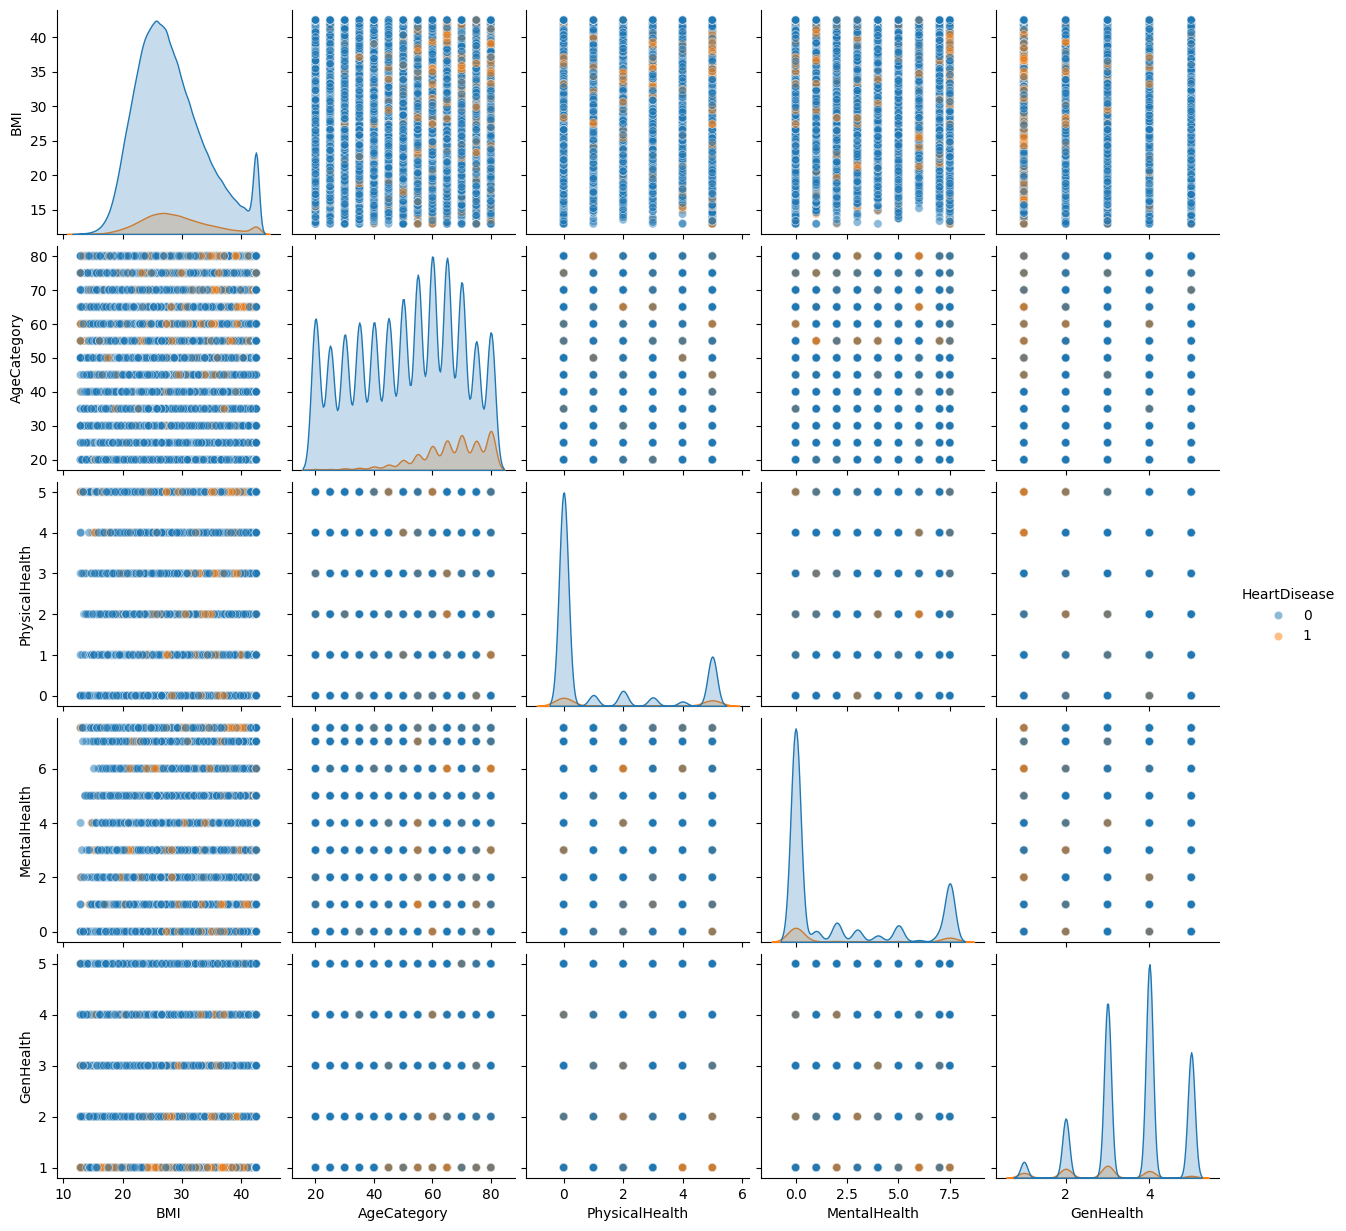

In [222]:
# Selecting key features for the pair plot
selected_features = ["HeartDisease", "BMI", "AgeCategory", "PhysicalHealth", "MentalHealth", "GenHealth"]

# Plot pair plot
sns.pairplot(HeartDisease_DB[selected_features], hue="HeartDisease", diag_kind="kde", plot_kws={'alpha':0.5})

plt.show()


#### Correlation matrix

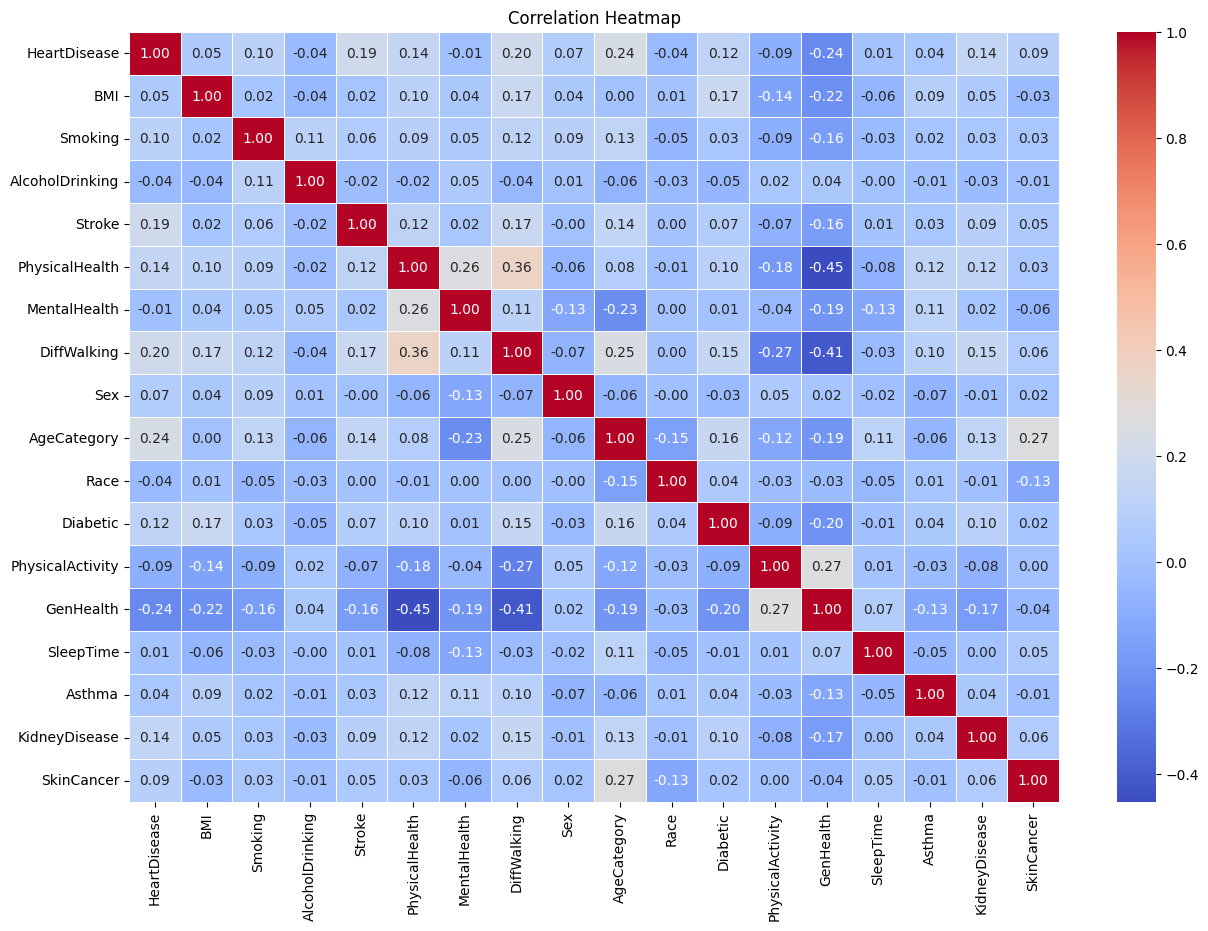

In [223]:
# Compute correlation matrix
correlation_matrix = HeartDisease_DB.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [224]:
correlation_matrix.sort_values(by='HeartDisease', ascending=False)['HeartDisease']

HeartDisease        1.00
AgeCategory         0.24
DiffWalking         0.20
Stroke              0.19
PhysicalHealth      0.14
KidneyDisease       0.14
Diabetic            0.12
Smoking             0.10
SkinCancer          0.09
Sex                 0.07
BMI                 0.05
Asthma              0.04
SleepTime           0.01
MentalHealth       -0.01
Race               -0.04
AlcoholDrinking    -0.04
PhysicalActivity   -0.09
GenHealth          -0.24
Name: HeartDisease, dtype: float64

### Diabetes

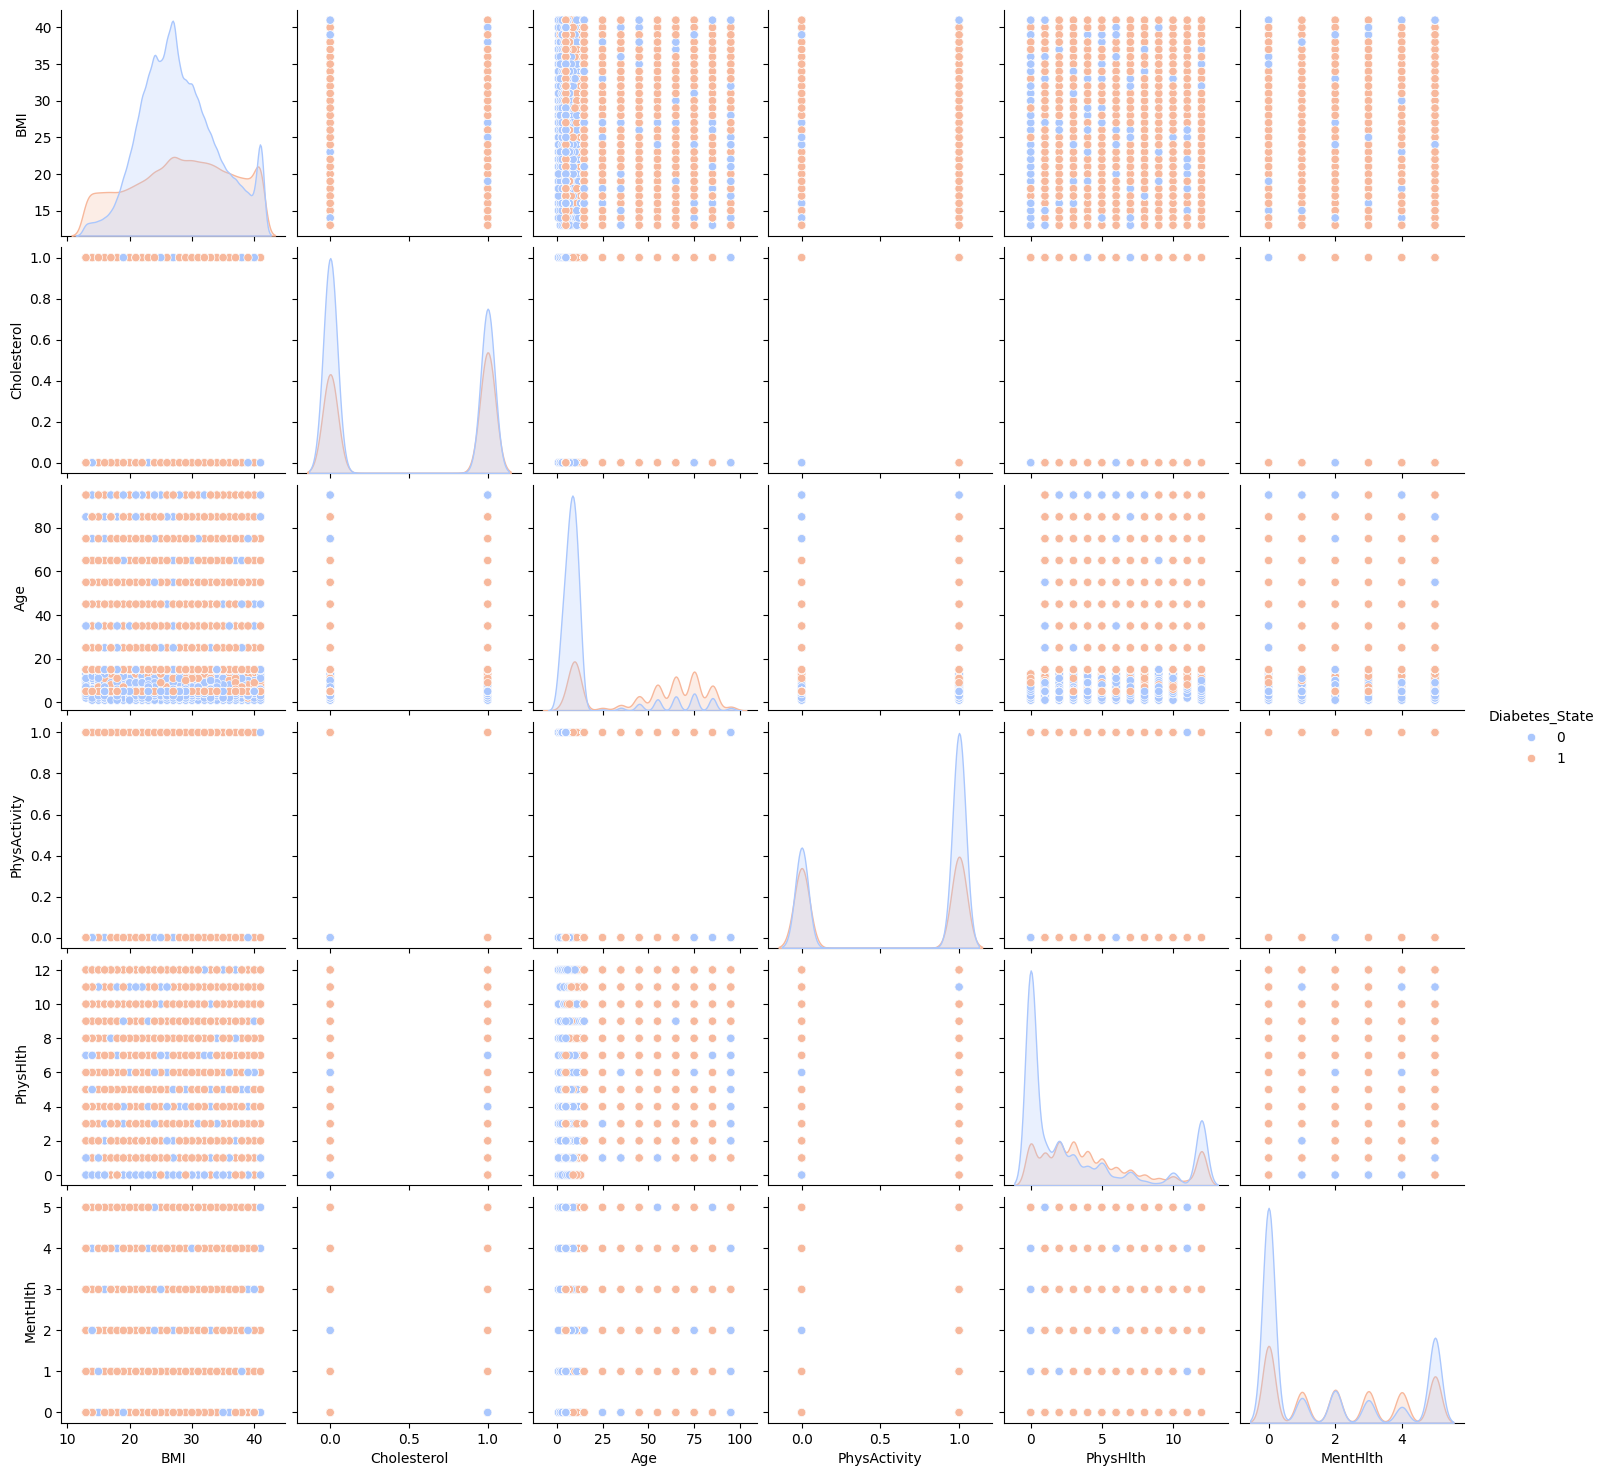

In [225]:
# Select key features for the pair plot
selected_features = ["Diabetes_State", "BMI", "Cholesterol", "Age", "PhysActivity", "PhysHlth", "MentHlth"]

# Create a pair plot
sns.pairplot(Diabetic_DB[selected_features], hue="Diabetes_State", diag_kind="kde", palette="coolwarm")
plt.show()

In [226]:
# Check for non-numeric values in the selected features
non_numeric_counts = Diabetic_DB[selected_features].apply(lambda col: col.apply(lambda x: isinstance(x, str)).sum())
non_numeric_counts


Diabetes_State    0
BMI               0
Cholesterol       0
Age               0
PhysActivity      0
PhysHlth          0
MentHlth          0
dtype: int64

#### Correlation matrix

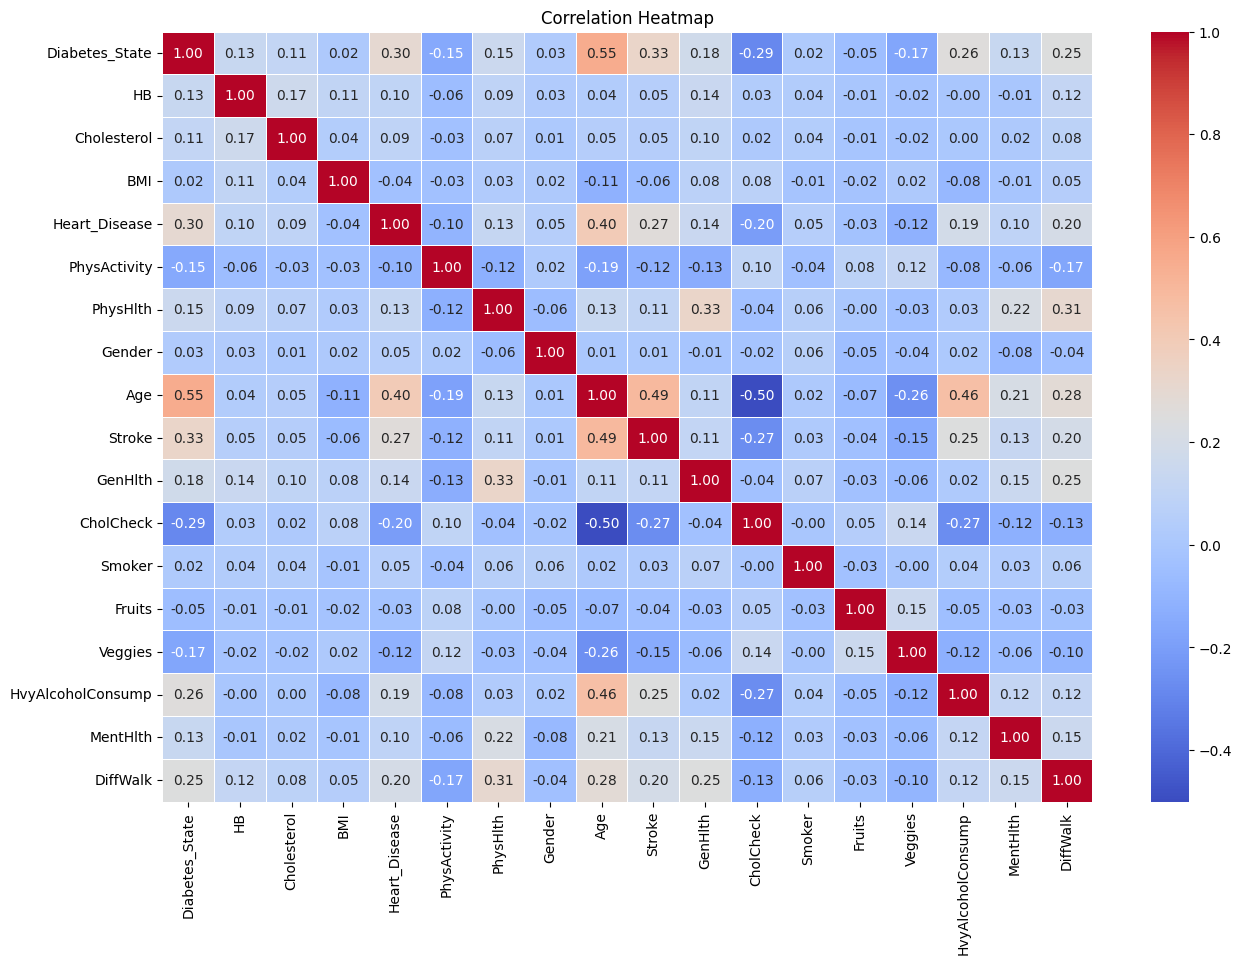

In [227]:
# Compute correlation matrix
correlation_matrix = Diabetic_DB.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [228]:
correlation_matrix.sort_values(by='Diabetes_State', ascending=False)['Diabetes_State']

Diabetes_State       1.00
Age                  0.55
Stroke               0.33
Heart_Disease        0.30
HvyAlcoholConsump    0.26
DiffWalk             0.25
GenHlth              0.18
PhysHlth             0.15
MentHlth             0.13
HB                   0.13
Cholesterol          0.11
Gender               0.03
Smoker               0.02
BMI                  0.02
Fruits              -0.05
PhysActivity        -0.15
Veggies             -0.17
CholCheck           -0.29
Name: Diabetes_State, dtype: float64


---


## Backup data (store and load) After all changes in the end of Milestone 2

Saving Files and loading files from google drive


#### Diabetes

This code for saving the Diabetic database last version as csv file on google drive as protection


In [229]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming Diabetic_DB is your DataFrame
Diabetic_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Mil2.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
Diabetic_DB.to_csv('data/Diabetic_DB_Mil2.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [231]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Diabetic_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/Diabetic_DB_Mil2.csv')
Diabetic_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Diabetes_State  HB  Cholesterol  BMI  Heart_Disease  PhysActivity  \
0               0   1            1   40              0             0   
1               0   0            0   25              0             1   
2               0   1            1   28              0             0   
3               0   1            0   27              0             1   
4               0   1            1   24              0             1   

   PhysHlth  Gender  Age  Stroke  GenHlth  CholCheck  Smoker  Fruits  Veggies  \
0        12       0    9       0        5          1       1       0        1   
1         0       0    7       0        3          0       1       0        0   
2        12       0    9       0        5          1       0       1        0   
3         0       0   11       0        2          1       0       1        1   
4         0       0   11       0        2          1       0       1        1   

   HvyAlcoholConsump  MentHlth  DiffWalk  
0                  0         5         1  
1                  0         0         0  
2                  0         5         1  
3                  0         0         0  
4                  0         3         0

In [6]:
import pandas as pd
Diabetic_DB = pd.read_csv('data/Diabetic_DB_Mil2.csv')

In [7]:
Diabetic_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286170 entries, 0 to 286169
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Diabetes_State     286170 non-null  int64
 1   HB                 286170 non-null  int64
 2   Cholesterol        286170 non-null  int64
 3   BMI                286170 non-null  int64
 4   Heart_Disease      286170 non-null  int64
 5   PhysActivity       286170 non-null  int64
 6   PhysHlth           286170 non-null  int64
 7   Gender             286170 non-null  int64
 8   Age                286170 non-null  int64
 9   Stroke             286170 non-null  int64
 10  GenHlth            286170 non-null  int64
 11  CholCheck          286170 non-null  int64
 12  Smoker             286170 non-null  int64
 13  Fruits             286170 non-null  int64
 14  Veggies            286170 non-null  int64
 15  HvyAlcoholConsump  286170 non-null  int64
 16  MentHlth           286170 non-null  in

#### Heart Disease

This code for saving the Heart disease database last version as csv file on google drive as protection




In [234]:

from google.colab import drive
drive.mount('/content/drive')

# Assuming HeartDisease_DB is your DataFrame
HeartDisease_DB.to_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB_Mil2.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [235]:
HeartDisease_DB.to_csv('data/HeartDisease_DB_Mil2.csv', index=False)

This code to load the data from the drive to start from the last version to next code part without needing to restart the whole code again

In [236]:

import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

HeartDisease_DB = pd.read_csv('/content/drive/MyDrive/Project_3_Healthcare/HeartDisease_DB_Mil2.csv')
HeartDisease_DB.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0 16.60        1                0       0               3   
1             0 20.34        0                0       1               0   
2             0 26.58        1                0       0               5   
3             0 24.21        0                0       0               0   
4             0 23.71        0                0       0               5   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          7.50            0    0           55     0         1   
1          0.00            0    0           80     0         0   
2          7.50            0    1           65     0         1   
3          0.00            0    0           75     0         0   
4          0.00            1    0           40     0         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4          5       1              0           1  
1                 1          4          7       0              0           0  
2                 1          2          8       1              0           0  
3                 0          3          6       0              0           1  
4                 1          4          8       0              0           0

In [8]:
HeartDisease_DB = pd.read_csv('data/HeartDisease_DB_Mil2.csv')

In [9]:
HeartDisease_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300619 entries, 0 to 300618
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      300619 non-null  int64  
 1   BMI               300619 non-null  float64
 2   Smoking           300619 non-null  int64  
 3   AlcoholDrinking   300619 non-null  int64  
 4   Stroke            300619 non-null  int64  
 5   PhysicalHealth    300619 non-null  int64  
 6   MentalHealth      300619 non-null  float64
 7   DiffWalking       300619 non-null  int64  
 8   Sex               300619 non-null  int64  
 9   AgeCategory       300619 non-null  int64  
 10  Race              300619 non-null  int64  
 11  Diabetic          300619 non-null  int64  
 12  PhysicalActivity  300619 non-null  int64  
 13  GenHealth         300619 non-null  int64  
 14  SleepTime         300619 non-null  int64  
 15  Asthma            300619 non-null  int64  
 16  KidneyDisease     30

# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


### Diabetes

####Import Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler ,MinMaxScaler ,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score ,accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

#### Preparations

In [27]:
# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Standardize features
scaler = StandardScaler()



In [28]:
# Create a pipeline that standardizes the data before applying Logistic Regression
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
# This sets the object regressor to the class of LinearRegression from the Sklearn library.

regressor = LinearRegression()

In [29]:
def define_model(degree):

  # Polynomial Regression (degree)
  poly = PolynomialFeatures(degree)
  X_poly_train = poly.fit_transform(X_train)
  X_poly_test = poly.transform(X_test)

  poly_reg = LinearRegression()
  poly_reg.fit(X_poly_train, y_train)
  y_pred_poly = poly_reg.predict(X_poly_test)

  print("\nPolynomial Regression (Degree)=",degree)
  print("MSE:", mean_squared_error(y_test, y_pred_poly))
  print("R2 Score:", r2_score(y_test, y_pred_poly))
  print("R^2 score:", "{:.0%}".format(r2_score(y_test, y_pred_poly)))

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

### Diabetes

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:

regressor.fit(X_train, y_train)

LinearRegression()

In [32]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

### Diabetes

#### Manual

In [33]:
# Predict on our test set.
y_pred_pipe = pipe.predict(X_test)
# Compute and display the accuracy of the trained model on test data
accuracy_score(y_pred_pipe, y_test)

0.7866303246322116

In [34]:
# Predict on our test set.
y_pred_reg = regressor.predict(X_test)
# Calculate the R^2 score
score = r2_score(y_test, y_pred_reg)

# Print out our score properly formatted as a percent.
print("R^2 score:", "{:.0%}".format(score))

R^2 score: 34%


In [35]:
for i in range(1, 3):
    define_model(i)



Polynomial Regression (Degree)= 1
MSE: 0.15690598611179743
R2 Score: 0.33975423389921044
R^2 score: 34%

Polynomial Regression (Degree)= 2
MSE: 0.1469245721128838
R2 Score: 0.3817550937503209
R^2 score: 38%


#### From ChatGPT codes

In [36]:
# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("R2 Score:", r2_score(y_test, y_pred_lin))
print("R^2 score:", "{:.0%}".format(r2_score(y_test, y_pred_lin)))

Linear Regression:
MSE: 0.15482286397764589
R2 Score: 0.34940702461566897
R^2 score: 35%


In [37]:
# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Polynomial Regression (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

print("\nPolynomial Regression (Degree 2):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("R^2 score:", "{:.0%}".format(r2_score(y_test, y_pred_poly)))



Polynomial Regression (Degree 2):
MSE: 0.14447510294307533
R2 Score: 0.3928901411727902
R^2 score: 39%


In [38]:
# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Polynomial Regression (degree = 3)
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

print("\nPolynomial Regression (Degree 3):")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))
print("R^2 score:", "{:.0%}".format(r2_score(y_test, y_pred_poly)))




Polynomial Regression (Degree 3):
MSE: 0.1434269745040993
R2 Score: 0.3972945616968596
R^2 score: 40%


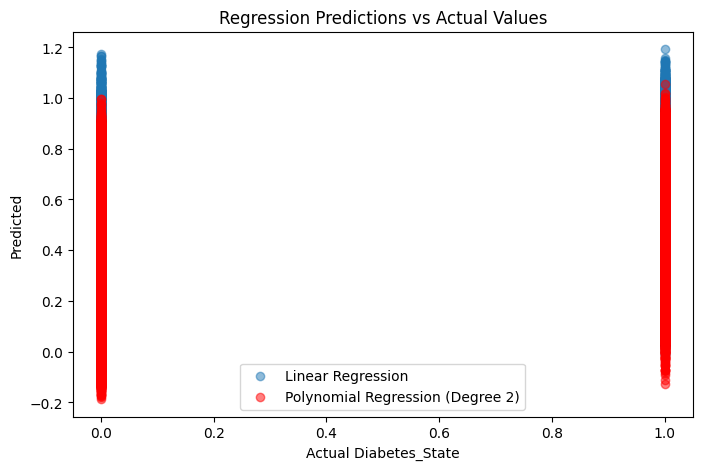

In [39]:
# Plot actual vs predicted (Linear)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lin, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polynomial Regression (Degree 2)', color='red')
plt.xlabel("Actual Diabetes_State")
plt.ylabel("Predicted")
plt.legend()
plt.title("Regression Predictions vs Actual Values")
plt.show()


Class distribution before SMOTE: Diabetes_State
0    122405
1     77914
Name: count, dtype: int64
Class distribution after SMOTE: Diabetes_State
1    122405
0    122405
Name: count, dtype: int64
Accuracy: 0.7767786423146811
              precision    recall  f1-score   support

           0       0.84      0.78      0.81     26230
           1       0.69      0.77      0.73     16696

    accuracy                           0.78     42926
   macro avg       0.77      0.78      0.77     42926
weighted avg       0.78      0.78      0.78     42926



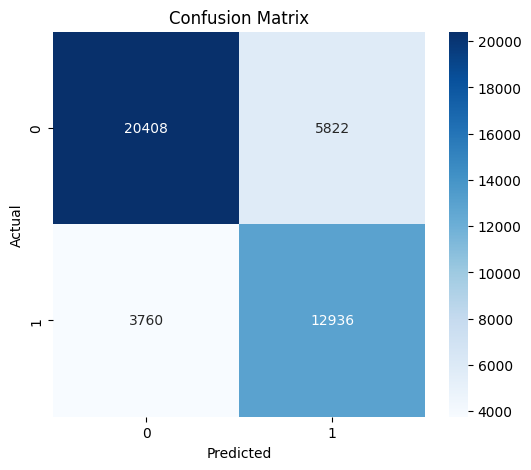

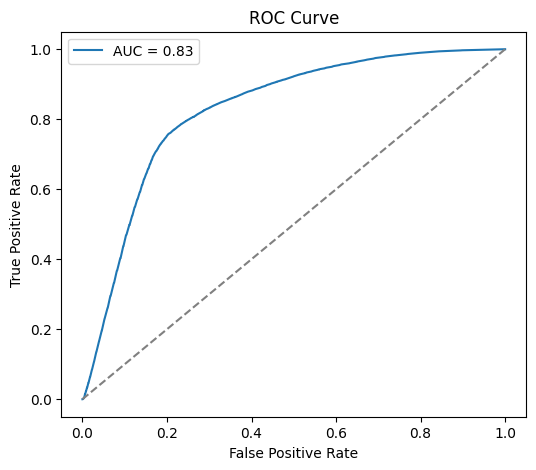

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Split data into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check for class imbalance
print("Class distribution before SMOTE:", y_train.value_counts())

# Apply SMOTE if needed
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", y_train_resampled.value_counts())

# Standardize features (Not required for tree-based models but useful for others)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target
X = Diabetic_DB.drop(columns=['Diabetes_State'])  # Features
y = Diabetic_DB['Diabetes_State']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Neural Network (MLP Classifier)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Logistic Regression Accuracy: 0.7890764231051473
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     34894
           1       0.76      0.67      0.71     22340

    accuracy                           0.79     57234
   macro avg       0.78      0.77      0.77     57234
weighted avg       0.79      0.79      0.79     57234

Random Forest Accuracy: 0.7810392424083586
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     34894
           1       0.71      0.75      0.73     22340

    accuracy                           0.78     57234
   macro avg       0.77      0.78      0.77     57234
weighted avg       0.78      0.78      0.78     57234



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8073348009924171
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     34894
           1       0.75      0.75      0.75     22340

    accuracy                           0.81     57234
   macro avg       0.80      0.80      0.80     57234
weighted avg       0.81      0.81      0.81     57234



### Heart Disease

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target
X = HeartDisease_DB.drop(columns=['HeartDisease'])  # Features
y = HeartDisease_DB['HeartDisease']  # Target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Support Vector Machine (SVM)
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# Neural Network (MLP Classifier)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred_mlp = mlp_clf.predict(X_test)
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

## Model Comparison
- Compare multiple models and justify the final model selection.


---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

## Monitoring
- Set up performance tracking and alert systems for issues.
- Monitor metrics for potential model drift or anomalies.

## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---
